In [ ]:
# performance bending for score
# nuc to meet min and max range
# Explanation of distance matrix: https://chat.openai.com/share/35f27f11-58d3-4007-8550-2e74fa0181f9

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd
import numpy as np
df_country = pd.read_csv('Country-data.csv')
df_country = df_country.sample(frac=1, axis=0, random_state=5454) #BP76
df_country.columns

In [ ]:
# Outlier removal
coun_data = df_country["country"].copy()

df_country  = df_country.drop('country', axis=1)
df_country0 = df_country.copy(deep=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_count_scaled = scaler.fit_transform(df_country0)

# Convert the scaled data back to a DataFrame
# This step is optional but often useful for readability and further processing
df_country= pd.DataFrame(df_count_scaled, columns=df_country.columns)


In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# import pandas as pd
# import numpy as np
# df_wine = pd.read_csv('wine-clustering.csv')

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the data and transform it
# df_wine_scaled = scaler.fit_transform(df_wine)

# # Convert the scaled data back to a DataFrame
# # This step is optional but often useful for readability and further processing
# df_wine = pd.DataFrame(df_wine_scaled, columns=df_wine.columns)

In [ ]:
# Writing to HDF5
# df_emb_free.to_hdf('df_resturant_emb.h5', key='df_emb_free', mode='w')
# df_r= pd.read_hdf("df_resturant_emb.h5", key='df_emb_free')

In [ ]:
# # Adjust the generation of clusters to ensure all values are positive
# import pandas as pd
# import numpy as np
# from sklearn.datasets import make_blobs
# # Generate the main clusters with positive centers
# cluster_1_pos, _ = make_blobs(n_samples=100, centers=[(10, 10)], cluster_std=1.5)
# cluster_2_pos, _ = make_blobs(n_samples=100, centers=[(20, 25), (30, 20)], cluster_std=[1.2, 0.8])
# cluster_3_pos, _ = make_blobs(n_samples=100, centers=[(25, 5)], cluster_std=0.5)

# # Generate smaller clusters within the larger clusters to create nested complexity
# nested_cluster_1_pos, _ = make_blobs(n_samples=50, centers=[(12, 12)], cluster_std=0.3)
# nested_cluster_2_pos, _ = make_blobs(n_samples=50, centers=[(28, 18)], cluster_std=0.2)

# # Combine all clusters
# complex_data_pos = np.vstack([cluster_1_pos, cluster_2_pos, cluster_3_pos, nested_cluster_1_pos, nested_cluster_2_pos])

# # Introduce some noise, ensuring it's also positive
# noise_pos = np.random.uniform(low=0, high=35, size=(50, 2))
# complex_data_with_noise_pos = np.vstack([complex_data_pos, noise_pos])

# # Create the complex DataFrame with only positive values
# complex_df_pos = pd.DataFrame(complex_data_with_noise_pos, columns=['Feature_1', 'Feature_2'])
# complex_df_pos = complex_df_pos.sample(frac=1).reset_index(drop=True)
# complex_df_pos.head(), complex_df_pos.shape
# df_iris = complex_df_pos.copy(deep=True)


In [ ]:
# to use this script or use it elsewhere
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

# %run '/content/drive/My Drive/dsc_dir/IRIS.csv'


In [ ]:
import pandas as pd

# try diagnosing from say 6 to 4 or something my indexing seems to work as it should
# so i think the issue is when the centroid brings back a group not every row may truly belong to that group
# Could there be some kind of test to see if ever row agrees to the new cluster ? or they will switch teams.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


df_ir = pd.read_csv('/content/drive/My Drive/dsc_dir/IRIS.csv')
df_ir1 = df_ir.drop('species', axis=1)
# # Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_ir1)

# Convert the scaled data back into a pandas DataFrame
df_iris = pd.DataFrame(scaled_data, columns=df_ir1.columns)
# df_iris = df_iris.sample(frac=1).reset_index(drop=True)
# df_iris_sample = df_iris.sample(n=40).reset_index(drop=True)


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_nested_clusters(n_outer_clusters=3, n_inner_clusters=4, n_samples_per_inner_cluster=50,
                                     outer_cluster_std=10.0, inner_cluster_std=1.0, center_box=(0, 100), random_state=None):
    # Generate outer cluster centers
    outer_centers, _ = make_blobs(n_samples=n_outer_clusters, cluster_std=outer_cluster_std,
                                  center_box=center_box, random_state=random_state)

    X, y = [], []
    label = 0
    for outer_center in outer_centers:
        # Generate inner cluster centers around each outer center
        inner_centers, _ = make_blobs(n_samples=n_inner_clusters, centers=[outer_center], cluster_std=outer_cluster_std/2,
                                      center_box=center_box, random_state=random_state)

        for inner_center in inner_centers:
            # Generate samples for each inner cluster
            X_inner, y_inner = make_blobs(n_samples=n_samples_per_inner_cluster, centers=[inner_center], cluster_std=inner_cluster_std,
                                          center_box=center_box, random_state=random_state)
            X.append(X_inner)
            y.append(np.full(n_samples_per_inner_cluster, label))
            label += 1

    X = np.vstack(X)
    y = np.concatenate(y)

    return X, y

# Generate a more complex nested clusters dataset
X_complex, y_complex = generate_complex_nested_clusters(n_outer_clusters=3, n_inner_clusters=5, n_samples_per_inner_cluster=100,
                                                        outer_cluster_std=15.0, inner_cluster_std=2.5, random_state=42)

# Visualize the complex nested dataset
plt.figure(figsize=(10, 8))
plt.scatter(X_complex[:, 0], X_complex[:, 1], c=y_complex, cmap='viridis', marker='.')
plt.title('Complex Nested Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Convert the complex nested dataset into a DataFrame
df_complex_nested = pd.DataFrame(X_complex, columns=['Feature_1', 'Feature_2'])
df_complex_nested['Cluster'] = y_complex

df_complex_nested.head()
df_complex_nested_sample = df_complex_nested.sample(n=1500).reset_index(drop=True)

In [ ]:
df_complex_nested_sample1 = df_complex_nested.drop(['Cluster'], axis=1)
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_complex_nested_sample1)

# Convert the scaled data back into a pandas DataFrame
df_complex_nested_sample1 = pd.DataFrame(scaled_data, columns=df_complex_nested_sample1.columns)
df_complex_nested_sample1 = df_complex_nested_sample1.sample(frac=1).reset_index(drop=True)


In [ ]:
# # UMAP
# import pandas as pd
# import numpy as np
# from umap import UMAP
# import matplotlib.pyplot as plt

# # Assuming df_iris is your DataFrame and it's already loaded
# # Let's say the last column is the target variable and the rest are features

# # Initialize UMAP. The n_neighbors and min_dist parameters can be adjusted based on your dataset.
# umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# # Fit the model and transform your data
# X_reduced = umap_model.fit_transform(df_iris)



# # Convert UMAP results into a DataFrame
# X_reduced_df = pd.DataFrame(X_reduced, columns=['UMAP_1', 'UMAP_2'])

# # Display the first few rows of the DataFrame
# print(X_reduced_df.head())
#df_iris = X_reduced_df.copy(deep=True)

In [ ]:
# understand what is happening
# Outlier handling

In [ ]:
# For outlier removal remove only those farthest away not those which are close. So only upper bound

In [ ]:
# DSC is important for outlier removal because
# two or more pure similarity points could be close together, but those two points themselves
# yeeaahh..
# assuming there are other points that are also outliers but close to the other two outliers they would be close together and hence
# the outlier removal step wouldnt hep much.. perhaps scrape it and use traditional outlier removals


In [ ]:
# Initialize new columns in the DataFrame for future assignment
# df_complex_nested_sample2 = df_complex_nested.copy(deep=True)
# df_complex_nested_sample2['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_complex_nested_sample2))]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd
df_credit_card = pd.read_csv('creditcard.csv')
df_credit_card = df_credit_card.sample(frac=1).reset_index(drop=True)

In [ ]:
df_credit_card_1 = df_credit_card.drop(["Time","Amount","Class"], axis=1)

In [ ]:
df_credit_card_2 = df_credit_card_1.sample(n=10000, random_state=22).reset_index(drop=True)

In [ ]:
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_credit_card_2)

# Convert the scaled data back into a pandas DataFrame
df_credit_card_3 = pd.DataFrame(scaled_data, columns=df_credit_card_2.columns)
df_credit_card_3 = df_credit_card_3.sample(frac=1).reset_index(drop=True)

In [ ]:
# # Graph but Union find is faster
# import pandas as pd
# import networkx as nx


# # Create an undirected graph
# G = nx.Graph()

# # Add edges based on the 'closest_index' relationship. The DataFrame index is used as the row index.
# for row_index, closest_index in df['Closest_Row'].items():
#     # Adding 1 to both row_index and closest_index to match the usual 1-based indexing of examples
#     G.add_edge(row_index + 1, closest_index + 1)

# # Find connected components
# connected_components = list(nx.connected_components(G))

# # Assign family identifiers
# family_assignments = {}
# for i, component in enumerate(connected_components):
#     for node in component:
#         family_assignments[node] = i

# # Convert family_assignments to a DataFrame for easy visualization
# family_df = pd.DataFrame(list(family_assignments.items()), columns=['Row Index', 'family_id'])

# family_df.family_id.nunique()

In [ ]:
# # OUtlier removal this way was not quite helpful with performance
# df_original=df_country0.copy(deep=True)

# df=df_original.copy()
# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df['Closest_Row'] = closest_indices
# df['Distance'] = closest_distances

# # 1. Remove outliers after
# # We will modify the function to also return the outliers

# def remove_upper_outliers_and_save(df, column_name):
#     quartile_1, quartile_3 = np.percentile(df[column_name], [25, 75])
#     iqr = quartile_3 - quartile_1
#     upper_bound = quartile_3 + (iqr * 1.5)

#     # Filter the DataFrame to remove data points above the upper bound
#     filtered_df = df[df[column_name] <= upper_bound]
#     # Save the outliers in a separate DataFrame
#     outliers_df = df[df[column_name] > upper_bound]

#     return filtered_df, outliers_df

# # Apply the modified function to remove upper outliers from 'Distance' column and save the removed outliers
# filtered_df, outliers_df = remove_upper_outliers_and_save(df, 'Distance')

# # Now we have two DataFrames: `filtered_df` without outliers and `outliers_df` with only the removed outliers
# # (filtered_df, outliers_df)

# # 1B..recalcualted distances again since i removed some indexes that were outliers
# import pandas as pd
# from sklearn.metrics import pairwise_distances

# # Assuming 'df' is your DataFrame
# # For example:
# # data = {
# #     'Feature1': [1, 2, 3, 4],
# #     'Feature2': [4, 3, 2, 1],
# #     'Feature3': [2, 3, 4, 5]
# # }
# # df = pd.DataFrame(data)

# filtered_df.reset_index(inplace=True, drop=True)
# df=filtered_df.copy(deep=True)

In [ ]:
#df_original = df.copy(deep=True)
#df_original.drop(['Closest_Row','Distance'], axis = 1, inplace=True)

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the data and transform it
# df_count_scaled = scaler.fit_transform(df_original)

# # Convert the scaled data back to a DataFrame
# # This step is optional but often useful for readability and further processing
# df_original= pd.DataFrame(df_count_scaled, columns=df_original.columns)


# MAIN MODEL

## Requirements

1. USE ROBUST SCALING LIKE MIN MAX AND ROBOST SCALER FOR DATA

If the scaling method you used is sensitive to outliers (like Z-score normalization), you might benefit from rescaling after outlier removal. However, if you used a more robust scaling method (like Min-Max scaling or Robust Scaler in sklearn that scales data according to percentiles and is thus less sensitive to outliers), rescaling might not be as necessary.


## Outlier removal

In [ ]:
%%time
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
# df_original = df_iris1.copy(deep=True)
#df_original = df_credit_card_3.copy(deep=True)
all_outliers = pd.DataFrame()
df = df_iris.copy(deep=True)


# Compute the pairwise distances
dist_matrix = pairwise_distances(df, metric='euclidean')

# Replace diagonal with np.inf to ignore self-distance
np.fill_diagonal(dist_matrix, np.inf)

# Find the index of the closest row and the distance for each row
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results to the original DataFrame
df['Closest_Row'] = closest_indices
df['Distance'] = closest_distances

# 1. Remove outliers after
# We will modify the function to also return the outliers

def remove_upper_outliers_and_save(df, column_name):
    quartile_1, quartile_3 = np.percentile(df[column_name], [25, 75])
    iqr = quartile_3 - quartile_1
    upper_bound = quartile_3 + (iqr * 1.5) # 1.5

    # Filter the DataFrame to remove data points above the upper bound
    filtered_df = df[df[column_name] <= upper_bound]
    # Save the outliers in a separate DataFrame
    outliers_df = df[df[column_name] > upper_bound]

    return filtered_df, outliers_df

# Apply the modified function to remove upper outliers from 'Distance' column and save the removed outliers
filtered_df, outliers_df = remove_upper_outliers_and_save(df, 'Distance')

# Now we have two DataFrames: `filtered_df` without outliers and `outliers_df` with only the removed outliers
# (filtered_df, outliers_df)

outliers_df0 = outliers_df.copy(deep=True)
del(outliers_df)
#filtered_df.reset_index(inplace=True, drop=True)

df_original = filtered_df.copy(deep=True)
df_original.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
outliers_df0.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
outliers_df0['fam_id'] = -1
all_outliers = pd.concat([all_outliers, outliers_df0], ignore_index=True)
del(outliers_df0)
df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]
df_original.reset_index(drop=True, inplace=True)
#
#
#
# Using factorize to encode 'fam_id'
# df_original['fam_id'] = pd.factorize(df_original['fam_id'])[0]

# # Convert the encoded numbers to strings
# df_original['fam_id'] = df_original['fam_id'].astype(str)


# Manual test

In [ ]:
# import pandas as pd
# import numpy as np
# df11 = pd.read_hdf('/content/drive/My Drive/dsc_dir/Godiva_df_emb.h5', key='df11')
# embeddings_array = np.stack(df11["gpt_3_large_emb"].values)

In [1]:
import pandas as pd
import numpy as np
import umap

# Load your DataFrame
df11 = pd.read_hdf('Godiva_df_emb_500.h5', key='df11')

# Assuming df11['gpt_3_large_emb'] contains lists or arrays of embeddings
embeddings_array = np.stack(df11["gpt_3_large_emb"].values)

# Initialize UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='cosine',random_state=76)

# Fit and transform the data using UMAP
umap_result = umap_reducer.fit_transform(embeddings_array)

# Convert UMAP results to a DataFrame
umap_df = pd.DataFrame(umap_result, columns=[f'UMAP_{i+1}' for i in range(umap_result.shape[1])])

# Concatenate the original DataFrame and the UMAP DataFrame
df11 = pd.concat([df11.reset_index(drop=True), umap_df], axis=1)


c:\Users\derri\anaconda3\envs\compu76\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Remove columns with totally missing values

# Import pandas if not already imported
import pandas as pd

# Load your DataFrame here if it's not already loaded
# df11 = pd.read_csv('your_file.csv') or any other source

# Remove columns where all values are missing
df12 = df11.loc[:, df11.isna().mean() < 0.5]


In [ ]:
df12.isna().mean()

In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Drop rows where 'Net Price' is missing
df_cleaned = df12.dropna(subset=['Net Price'])
df_cleaned.reset_index(drop=True,inplace=True)
# If you want to modify the original DataFrame in place:
# df.dropna(subset=['Net Price'], inplace=True)


In [ ]:
df_cleaned.isna().mean()

In [5]:
import pandas as pd
df13 = df_cleaned[['UMAP_1','UMAP_2','UMAP_3','Weight','Net Price']]

# try diagnosing from say 6 to 4 or something my indexing seems to work as it should
# so i think the issue is when the centroid brings back a group not every row may truly belong to that group
# Could there be some kind of test to see if ever row agrees to the new cluster ? or they will switch teams.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df13)

# Convert the scaled data back into a pandas DataFrame
df_14 = pd.DataFrame(scaled_data, columns=df13.columns)

# df_iris = df_iris.sample(frac=1).reset_index(drop=True)
# df_iris_sample = df_iris.sample(n=40).reset_index(drop=True)


# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the embeddings
# scaled_embeddings = scaler.fit_transform(embeddings_array)

In [6]:
df_14

,UMAP_1,UMAP_2,UMAP_3,Weight,Net Price
0,0.673740,0.168381,0.864829,-0.047938,0.037631
1,0.825603,-0.579050,-0.003787,-0.263099,-0.262995
2,-0.517034,-1.040929,0.436727,0.690078,0.668734
3,-0.205307,-0.496217,-0.910022,-0.282051,-0.298944
4,-0.495664,-0.985897,0.360992,-0.235229,0.004625
...,...,...,...,...,...
495,0.816534,-0.596586,-0.100315,-0.285396,-0.299995
496,0.054816,1.130081,0.098293,0.901895,0.228517
497,0.685447,0.223073,0.876690,-0.284281,-0.213381
498,0.669445,0.193699,0.879465,-0.082497,0.006307


# ARRAY WITH LOOP

## Outlier removal

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming embeddings is a numpy array already defined
df_original = df_14.values.copy()

# Compute the pairwise distances
dist_matrix = pairwise_distances(df_original, metric='cosine')

# Replace diagonal with np.inf to ignore self-distance
np.fill_diagonal(dist_matrix, np.inf)

# Find the index of the closest row and the distance for each row
closest_indices = np.argmin(dist_matrix, axis=1)
closest_distances = np.min(dist_matrix, axis=1)

def remove_upper_outliers_and_save(data, distances):
    quartile_1, quartile_3 = np.percentile(distances, [25, 75])
    iqr = quartile_3 - quartile_1
    upper_bound = quartile_3 + (iqr * 1.5)

    not_outliers_mask = distances <= upper_bound
    outliers_mask = distances > upper_bound

    filtered_data = data[not_outliers_mask]
    outliers_data = data[outliers_mask]

    return filtered_data, outliers_data

filtered_data, outliers_data = remove_upper_outliers_and_save(df_original, closest_distances)

# If you simply want to track the indices, you could just keep them as separate arrays:
filtered_ids = np.array(['unq_id_' + str(i) for i in range(filtered_data.shape[0])])
outlier_ids = np.array(['unq_id_' + str(i) for i in range(filtered_data.shape[0], filtered_data.shape[0] + outliers_data.shape[0])])

def remove_upper_outliers_and_save(distances):
    quartile_1, quartile_3 = np.percentile(distances, [25, 75])
    iqr = quartile_3 - quartile_1
    upper_bound = quartile_3 + 1.5 * iqr
    not_outliers_mask = distances <= upper_bound
    return not_outliers_mask

not_outliers_mask = remove_upper_outliers_and_save(closest_distances)
filtered_df11 = df11.iloc[not_outliers_mask].copy(deep=True)


In [ ]:
%%time

import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Assuming df_original is already defined

df_original = filtered_data.copy()
# df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

fam_ids = np.array(['unq_id_' + str(i) for i in range(len(df_original))])
fam_ids_array = np.array(fam_ids).reshape(-1, 1)
new_array = np.concatenate((df_original, fam_ids_array), axis=1)

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
dist_matrix0 = pairwise_distances(df_original, metric='cosine')



In [ ]:
breaker = 32

In [ ]:
%%time
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# ee
iteration_list = []
sil_perf_list = []
calinski_perf_list = []
unique_fam_list = []


# NUCER

for ir in range(50):
    dist_matrix = np.copy(dist_matrix0)
    fam_ids = new_array[:, -1]
    same_fam_id = new_array[:, -1][:, None] == new_array[:, -1]
    dist_matrix[same_fam_id] = np.inf

    closest_indices = np.argmin(dist_matrix, axis=1)
    closest_distances = np.min(dist_matrix, axis=1)

    # Handling migrations
    closest_families = fam_ids[closest_indices]
    dtype = [('fam_id', 'U10'), ('closest_distance', 'f8'), ('closest_family', 'U10')]
    structured_array = np.array(list(zip(fam_ids, closest_distances, closest_families)), dtype=dtype)
    sorted_structured_array = np.sort(structured_array, order=['fam_id', 'closest_distance'])
    _, unique_indices = np.unique(sorted_structured_array['fam_id'], return_index=True)
    result_structured_array = sorted_structured_array[unique_indices]
    migration_map = {fam_id: closest_family for fam_id, closest_family in result_structured_array[['fam_id', 'closest_family']]}
    migrate_to_family = np.array([migration_map[fam] for fam in fam_ids])


    # Assuming fam_ids, migrate_to_families, and closest_distances are defined as NumPy arrays

    # Create a structured array for sorting and unique operation
    dtype = [('migrate_to_family', 'U10'), ('closest_distance', float), ('fam_id', 'U10')]
    structured_array = np.array(list(zip(migrate_to_family , closest_distances, fam_ids)), dtype=dtype)

    # Sort by 'migrate_to_family' and 'closest_distance'
    sorted_array = np.sort(structured_array, order=['migrate_to_family', 'closest_distance'])

    # Remove duplicates
    _, unique_indices = np.unique(sorted_array['migrate_to_family'], return_index=True)
    unique_families = sorted_array[unique_indices]

    # Mapping for migration decisions
    migration_decision_map = {entry['migrate_to_family']: entry['fam_id'] for entry in unique_families}

    # Calculate the minimum distance per migration family
    unique_families_distances = {entry['migrate_to_family']: entry['closest_distance'] for entry in unique_families}

    # Assign migration permissions
    can_migrate = np.array([closest_distances[i] == unique_families_distances[migrate_to_family[i]] for i in range(len(fam_ids))])

    import networkx as nx

    uf = nx.utils.UnionFind()
    for i, entry in enumerate(structured_array):
        uf.union(entry['fam_id'], entry['migrate_to_family'])

    # Map the results back
    fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}
    mapped_fam_ids = np.array([fam_id_mapping[fam_id] for fam_id in fam_ids])

    from sklearn.metrics import pairwise_distances

    # Calculate centroids
    unique_fam_ids = np.unique(mapped_fam_ids)
    centroids = np.array([df_original[mapped_fam_ids == fam_id].mean(axis=0) for fam_id in unique_fam_ids])

    # Calculate distances from each point to each centroid and find the closest
    distances = pairwise_distances(df_original, centroids, metric='cosine')
    closest_centroids = np.argmin(distances, axis=1)

    # Assign new fam_ids based on the closest centroid
    new_fam_ids = np.array([unique_fam_ids[idx] for idx in closest_centroids])
    fam_ids_array1 = np.array(new_fam_ids).reshape(-1, 1)
    new_array = np.concatenate((df_original, fam_ids_array1), axis=1)


    features = new_array[:, :-1].astype(float)
    # features = new_array[:, :-1]  # All rows, all columns except the last

    # Extract 'fam_id' for labels
    labels = new_array[:, -1]  # Last column for labels




    sil_perf = silhouette_score(features, labels)
    calinski_harabasz = calinski_harabasz_score(features, labels)
    sil_perf_list.append(sil_perf)
    calinski_perf_list.append(calinski_harabasz)
    unique_fam_list.append(len(set(new_fam_ids)))
    iteration_list.append(ir)


    if len(set(new_fam_ids)) == breaker:
        break

data = {
    'iteration_list': iteration_list,
    'sil_perf_list': sil_perf_list,
    'calinski_perf_list': calinski_perf_list,
    'unique_fam_list': unique_fam_list
}

# Create DataFrame
df_eval = pd.DataFrame(data)

df_eval


In [ ]:
len(set(new_fam_ids))

In [ ]:

filtered_df11['label'] = new_fam_ids
outliers_mask = ~not_outliers_mask  # Get the outliers mask
outliers_df11 = df11.iloc[outliers_mask].copy(deep=True)  # Extract outliers
outliers_df11['label'] = -1
df_comb = pd.concat([filtered_df11, outliers_df11], axis=0)


In [ ]:
df21 = df_comb.drop(['gpt_3_large_emb'],axis=1)
df21.to_excel('Godiva_done_32_pca.xlsx')


# ARRAY

In [ ]:
%%time

import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Assuming df_original is already defined

df_original = df_iris.values.copy()
# df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

fam_ids = np.array(['unq_id_' + str(i) for i in range(len(df_original))])
fam_ids_array = np.array(fam_ids).reshape(-1, 1)
new_array = np.concatenate((df_original, fam_ids_array), axis=1)

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
dist_matrix0 = pairwise_distances(df_original, metric='euclidean')



In [ ]:
# Finding the closest valid entries

dist_matrix = np.copy(dist_matrix0)
fam_ids = new_array[:, -1]
same_fam_id = new_array[:, -1][:, None] == new_array[:, -1]
dist_matrix[same_fam_id] = np.inf

closest_indices = np.argmin(dist_matrix, axis=1)
closest_distances = np.min(dist_matrix, axis=1)

# Handling migrations
closest_families = fam_ids[closest_indices]
dtype = [('fam_id', 'U10'), ('closest_distance', 'f8'), ('closest_family', 'U10')]
structured_array = np.array(list(zip(fam_ids, closest_distances, closest_families)), dtype=dtype)
sorted_structured_array = np.sort(structured_array, order=['fam_id', 'closest_distance'])
_, unique_indices = np.unique(sorted_structured_array['fam_id'], return_index=True)
result_structured_array = sorted_structured_array[unique_indices]
migration_map = {fam_id: closest_family for fam_id, closest_family in result_structured_array[['fam_id', 'closest_family']]}
migrate_to_family = np.array([migration_map[fam] for fam in fam_ids])


# Assuming fam_ids, migrate_to_families, and closest_distances are defined as NumPy arrays

# Create a structured array for sorting and unique operation
dtype = [('migrate_to_family', 'U10'), ('closest_distance', float), ('fam_id', 'U10')]
structured_array = np.array(list(zip(migrate_to_family , closest_distances, fam_ids)), dtype=dtype)

# Sort by 'migrate_to_family' and 'closest_distance'
sorted_array = np.sort(structured_array, order=['migrate_to_family', 'closest_distance'])

# Remove duplicates
_, unique_indices = np.unique(sorted_array['migrate_to_family'], return_index=True)
unique_families = sorted_array[unique_indices]

# Mapping for migration decisions
migration_decision_map = {entry['migrate_to_family']: entry['fam_id'] for entry in unique_families}

# Calculate the minimum distance per migration family
unique_families_distances = {entry['migrate_to_family']: entry['closest_distance'] for entry in unique_families}

# Assign migration permissions
can_migrate = np.array([closest_distances[i] == unique_families_distances[migrate_to_family[i]] for i in range(len(fam_ids))])

import networkx as nx

uf = nx.utils.UnionFind()
for i, entry in enumerate(structured_array):
    uf.union(entry['fam_id'], entry['migrate_to_family'])

# Map the results back
fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}
mapped_fam_ids = np.array([fam_id_mapping[fam_id] for fam_id in fam_ids])

from sklearn.metrics import pairwise_distances

# Calculate centroids
unique_fam_ids = np.unique(mapped_fam_ids)
centroids = np.array([df_original[mapped_fam_ids == fam_id].mean(axis=0) for fam_id in unique_fam_ids])

# Calculate distances from each point to each centroid and find the closest
distances = pairwise_distances(df_original, centroids, metric='euclidean')
closest_centroids = np.argmin(distances, axis=1)

# Assign new fam_ids based on the closest centroid
new_fam_ids = np.array([unique_fam_ids[idx] for idx in closest_centroids])
fam_ids_array1 = np.array(new_fam_ids).reshape(-1, 1)
new_array = np.concatenate((df_original, fam_ids_array1), axis=1)



In [ ]:
len(set(new_fam_ids))

In [ ]:
%%time

    # NUCER
    # 2. MAIN NETWORK CLUSTERING

    ## 2A Find closet distance and index of rows with closes distance in a different fam_id
    # dist_matrix = dist_matrix0.copy()
    dist_matrix = np.copy(dist_matrix0)
    # Reset the index of the DataFrame to keep track of original indices

    # OPTIMIZATION 1
    #############
    # WAS
    # # Get a boolean matrix where True represents rows with the same 'fam_id'.
    # same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # # Set the distances for rows with the same 'fam_id' to infinity.
    # # np.inf is used here to ensure these distances are never considered as the minimum.
    # dist_matrix[same_fam_id] = np.inf

    # NOW..SIGNIFICANTLY FASTER
    # df_with_index = df_original.reset_index()

    # Perform the merge to find all pairs with the same 'fam_id'
    # same_fam_id = df_with_index.merge(
    #     df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

    # # Minimal column merge to reduce memory footprint
    # same_fam_id = df_with_index[['index', 'fam_id']].merge(
    #     df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))
    # Get a boolean matrix where True represents rows with the same 'fam_id'.
    same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # Set the distances for rows with the same 'fam_id' to infinity.
    # np.inf is used here to ensure these distances are never considered as the minimum.
    dist_matrix[same_fam_id] = np.inf


    ##########

    # num_rows = len(df_original)
    # # Initialize a boolean matrix of size (num_rows, num_rows)
    # same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

    # # Fill the boolean matrix with True where indices have the same 'fam_id'
    # same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

    # dist_matrix[same_fam_id_matrix]= np.inf
    ##########

    # Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
    closest_indices = dist_matrix.argmin(axis=1)
    closest_distances = dist_matrix.min(axis=1)

    # Add the results back to the original DataFrame.
    df_original['closest_row'] = closest_indices
    df_original['closest_distance'] = closest_distances


    # OPTIMIZATION 2
    #############
    # WAS

    # Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

    # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
    # Add a column for the family that the closest row belongs to for easier reference
    # df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

    # # Determine the closest family for each original family based on the smallest distance
    # closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

    # # Map the target family for migration back to the original DataFrame
    # df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    # NOW

    df_original['closest_family'] = df_original.loc[df_original['closest_row'], 'fam_id'].values

    # Sort the DataFrame first by 'fam_id', then by 'closest_distance'
    sorted_df = df_original.sort_values(by=['fam_id', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'fam_id'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    result_df = sorted_df.drop_duplicates(subset='fam_id', keep='first')

    # Select only the 'fam_id' and 'closest_family' columns if necessary
    closest_family_for_group = result_df.set_index('fam_id')['closest_family']

    # Map the target family for migration back to the original DataFrame
    df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)
    ##################

    # OPTIMIZATION 3
    #############

    # WAS
    # Choosing only the closest family on the migrate_to_family side
    # Step 1: Determine the eligible family for each target family

    # Group by 'migrate_to_family' and find the family with the closest distance for each target
    # eligible_families = df_original.groupby('migrate_to_family').apply(
    #     lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
    # ).reset_index().rename(columns={0: 'eligible_fam_id'})

    # NOW
    # Sort the DataFrame by 'migrate_to_family' and 'closest_distance'
    sorted_df = df_original.sort_values(by=['migrate_to_family', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'migrate_to_family'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    unique_families = sorted_df.drop_duplicates(subset='migrate_to_family', keep='first')

    # Rename and clean up the result if necessary
    eligible_families = unique_families.rename(columns={'fam_id': 'eligible_fam_id'})[['migrate_to_family', 'eligible_fam_id']]

    ##############

    # Step 2: Assign migration permission based on eligibility
    # Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
    df_original = df_original.merge(
        eligible_families,
        how='left',
        left_on=['migrate_to_family', 'fam_id'],
        right_on=['migrate_to_family', 'eligible_fam_id']
    )


    # Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
    # This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
    min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

    # Step 3: Assign migration permission based on matching the minimum distance
    # Families that match the minimum distance to their target are allowed to migrate
    df_original['can_migrate'] = df_original['closest_distance'] == min_distances

    # Step 1: Find all fam_id values where at least one row has can_migrate = True
    fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

    # Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
    df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

    # Logic to update 'migrate_to_family' where 'can_migrate' is False
    df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

    # Drop the 'eligible_fam_id' column as it's no longer needed
    df_original.drop('eligible_fam_id', axis=1, inplace=True)

    # Initialize NetworkX UnionFind



    ## OPTIMIZATION 4
    ##################################

    # WAS
    # # Using DataFrame.apply() to perform Union operations on all rows at once
    # uf = nx.utils.UnionFind()
    # df_original.apply(lambda row: uf.union(row['fam_id'], row['migrate_to_family']), axis=1)

    # # Mapping the results back to the DataFrame can be optimized by
    # # creating a mapping dictionary from the UnionFind structure and then using map()
    # fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping)

    # Drop unnecessary columns in a more concise way
    # columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    # df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # NOW
    # Iterate over DataFrame rows using itertuples() for better performance
    uf = nx.utils.UnionFind()
    for row in df_original.itertuples():
        uf.union(row.fam_id, row.migrate_to_family)

    # Creating a mapping dictionary from the UnionFind structure
    fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # Ensure that all original IDs are covered in the mapping
    df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping).fillna(df_original['fam_id'])

    # Drop unnecessary columns in a more concise way
    columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

        # # Solution to all my issues.. recenter
    def calculate_centroids(df):
            """Calculate centroids of families in the dataframe."""
            centroids = df.groupby('fam_id').mean()
            return centroids

    def reassign_families(df, centroids):
        """Reassign rows to the closest family based on Euclidean distance to centroids."""
        # Calculate distances between each row and each centroid
        distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

        # Find the closest centroid for each row
        closest_centroids = np.argmin(distances, axis=1)

        # Map centroid indices back to family labels
        index_to_family = {i: family for i, family in enumerate(centroids.index)}
        df['fam_id'] = [index_to_family[index] for index in closest_centroids]

        return df

    # # Calculate initial centroids
    centroids = calculate_centroids(df_original)

    # Reassign families based on closest centroid
    df_original = reassign_families(df_original, centroids)

    ####################################

In [ ]:
# Manual

In [ ]:
%%time

df_original = df_iris.copy(deep=True)
df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
features = df_original.drop('fam_id', axis=1)
dist_matrix0 = pairwise_distances(features, metric='euclidean')


# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df


In [ ]:
%%time



    # NUCER
    # 2. MAIN NETWORK CLUSTERING

    ## 2A Find closet distance and index of rows with closes distance in a different fam_id
    # dist_matrix = dist_matrix0.copy()
    dist_matrix = np.copy(dist_matrix0)
    # Reset the index of the DataFrame to keep track of original indices

    # OPTIMIZATION 1
    #############
    # WAS
    # # Get a boolean matrix where True represents rows with the same 'fam_id'.
    # same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # # Set the distances for rows with the same 'fam_id' to infinity.
    # # np.inf is used here to ensure these distances are never considered as the minimum.
    # dist_matrix[same_fam_id] = np.inf

    # NOW..SIGNIFICANTLY FASTER
    # df_with_index = df_original.reset_index()

    # Perform the merge to find all pairs with the same 'fam_id'
    # same_fam_id = df_with_index.merge(
    #     df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

    # # Minimal column merge to reduce memory footprint
    # same_fam_id = df_with_index[['index', 'fam_id']].merge(
    #     df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))
# Get a boolean matrix where True represents rows with the same 'fam_id'.
    same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # Set the distances for rows with the same 'fam_id' to infinity.
    # np.inf is used here to ensure these distances are never considered as the minimum.
    dist_matrix[same_fam_id] = np.inf


    ##########

    # num_rows = len(df_original)
    # # Initialize a boolean matrix of size (num_rows, num_rows)
    # same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

    # # Fill the boolean matrix with True where indices have the same 'fam_id'
    # same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

    # dist_matrix[same_fam_id_matrix]= np.inf
    ##########

    # Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
    closest_indices = dist_matrix.argmin(axis=1)
    closest_distances = dist_matrix.min(axis=1)

    # Add the results back to the original DataFrame.
    df_original['closest_row'] = closest_indices
    df_original['closest_distance'] = closest_distances


    # OPTIMIZATION 2
    #############
    # WAS

    # Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

    # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
    # Add a column for the family that the closest row belongs to for easier reference
    # df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

    # # Determine the closest family for each original family based on the smallest distance
    # closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

    # # Map the target family for migration back to the original DataFrame
    # df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    # NOW

    df_original['closest_family'] = df_original.loc[df_original['closest_row'], 'fam_id'].values

    # Sort the DataFrame first by 'fam_id', then by 'closest_distance'
    sorted_df = df_original.sort_values(by=['fam_id', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'fam_id'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    result_df = sorted_df.drop_duplicates(subset='fam_id', keep='first')

    # Select only the 'fam_id' and 'closest_family' columns if necessary
    closest_family_for_group = result_df.set_index('fam_id')['closest_family']

    # Map the target family for migration back to the original DataFrame
    df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)
    ##################

    # OPTIMIZATION 3
    #############

    # WAS
    # Choosing only the closest family on the migrate_to_family side
    # Step 1: Determine the eligible family for each target family

    # Group by 'migrate_to_family' and find the family with the closest distance for each target
    # eligible_families = df_original.groupby('migrate_to_family').apply(
    #     lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
    # ).reset_index().rename(columns={0: 'eligible_fam_id'})

    # NOW
    # Sort the DataFrame by 'migrate_to_family' and 'closest_distance'
    sorted_df = df_original.sort_values(by=['migrate_to_family', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'migrate_to_family'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    unique_families = sorted_df.drop_duplicates(subset='migrate_to_family', keep='first')

    # Rename and clean up the result if necessary
    eligible_families = unique_families.rename(columns={'fam_id': 'eligible_fam_id'})[['migrate_to_family', 'eligible_fam_id']]

    ##############

    # Step 2: Assign migration permission based on eligibility
    # Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
    df_original = df_original.merge(
        eligible_families,
        how='left',
        left_on=['migrate_to_family', 'fam_id'],
        right_on=['migrate_to_family', 'eligible_fam_id']
    )


    # Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
    # This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
    min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

    # Step 3: Assign migration permission based on matching the minimum distance
    # Families that match the minimum distance to their target are allowed to migrate
    df_original['can_migrate'] = df_original['closest_distance'] == min_distances

    # Step 1: Find all fam_id values where at least one row has can_migrate = True
    fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

    # Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
    df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

    # Logic to update 'migrate_to_family' where 'can_migrate' is False
    df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

    # Drop the 'eligible_fam_id' column as it's no longer needed
    df_original.drop('eligible_fam_id', axis=1, inplace=True)

    # Initialize NetworkX UnionFind



    ## OPTIMIZATION 4
    ##################################

    # WAS
    # # Using DataFrame.apply() to perform Union operations on all rows at once
    # uf = nx.utils.UnionFind()
    # df_original.apply(lambda row: uf.union(row['fam_id'], row['migrate_to_family']), axis=1)

    # # Mapping the results back to the DataFrame can be optimized by
    # # creating a mapping dictionary from the UnionFind structure and then using map()
    # fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping)

    # Drop unnecessary columns in a more concise way
    # columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    # df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # NOW
    # Iterate over DataFrame rows using itertuples() for better performance
    uf = nx.utils.UnionFind()
    for row in df_original.itertuples():
        uf.union(row.fam_id, row.migrate_to_family)

    # Creating a mapping dictionary from the UnionFind structure
    fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # Ensure that all original IDs are covered in the mapping
    df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping).fillna(df_original['fam_id'])

    # Drop unnecessary columns in a more concise way
    columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # # Calculate initial centroids
    centroids = calculate_centroids(df_original)

    # Reassign families based on closest centroid
    df_original = reassign_families(df_original, centroids)

    ####################################

In [ ]:
df_original.fam_id.nunique()

In [ ]:
%%time

    # NUCER
    # 2. MAIN NETWORK CLUSTERING

    ## 2A Find closet distance and index of rows with closes distance in a different fam_id
    # dist_matrix = dist_matrix0.copy()
    dist_matrix = np.copy(dist_matrix0)
    # Reset the index of the DataFrame to keep track of original indices

    # OPTIMIZATION 1
    #############
    # WAS
    # # Get a boolean matrix where True represents rows with the same 'fam_id'.
    # same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # # Set the distances for rows with the same 'fam_id' to infinity.
    # # np.inf is used here to ensure these distances are never considered as the minimum.
    # dist_matrix[same_fam_id] = np.inf

    # NOW..SIGNIFICANTLY FASTER
    df_with_index = df_original.reset_index()

    # Perform the merge to find all pairs with the same 'fam_id'
    same_fam_id = df_with_index.merge(
        df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

    num_rows = len(df_original)
    # Initialize a boolean matrix of size (num_rows, num_rows)
    same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

    # Fill the boolean matrix with True where indices have the same 'fam_id'
    same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

    dist_matrix[same_fam_id_matrix]= np.inf
    ##########

    # Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
    closest_indices = dist_matrix.argmin(axis=1)
    closest_distances = dist_matrix.min(axis=1)

    # Add the results back to the original DataFrame.
    df_original['closest_row'] = closest_indices
    df_original['closest_distance'] = closest_distances



In [ ]:
df_original.fam_id.nunique()

In [ ]:
# # Medoid

# # Reset the index to ensure alignment
# df_with_index = df_original.reset_index()
# # Perform the merge on 'fam_id' to identify the same family pairings
# same_fam_id = df_with_index.merge(df_with_index[['index', 'fam_id']],
#                     on='fam_id', suffixes=('_left', '_right'))

# # Initialize a  full infinity matrix
# intra_fam_dist_matrix = np.full((len(df_original), len(df_original)), np.inf)

# # Fill only the distances for the same family members
# intra_fam_dist_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = dist_matrix0[same_fam_id['index_left'].values, same_fam_id['index_right'].values]

# # Sum distances in the intra-family distance matrix
# sum_distances = np.sum(intra_fam_dist_matrix, axis=1)

# # Add a column to df_original to identify the medoid's index within each family
# df_with_index['sum_distances'] = sum_distances

# # Identify the index with the minimum sum of distances within each family group
# medoids = df_with_index.loc[df_with_index.groupby('fam_id')['sum_distances'].idxmin()]

# medoid_family_mapping = df_original.loc[medoids.index, ['fam_id']]
# medoid_family_mapping['medoid_index'] = medoids.index
# # Select only the columns of the distance matrix corresponding to the medoids
# medoid_distances = dist_matrix0[:, medoid_family_mapping['medoid_index']]
# closest_medoid_indices = np.argmin(medoid_distances, axis=1)
# # Create a mapping from index in the medoid_distances array to family ID
# index_to_family_id = medoid_family_mapping['fam_id'].iloc[closest_medoid_indices].values
# df_original['fam_id'] = index_to_family_id

# Import test

In [ ]:
# With outlier removal

In [ ]:
# idea.. when change is 1, which ever has the highest calinski wins
breaker = 3

In [12]:
%%time

breaker = 2
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
# df_original = df_iris1.copy(deep=True)
#df_original = df_credit_card_3.copy(deep=True)
all_outliers = pd.DataFrame()

all_df_original = pd.DataFrame()
df_original = df_14.copy(deep=True)

# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df['Closest_Row'] = closest_indices
# df['Distance'] = closest_distances

# # 1. Remove outliers after
# # We will modify the function to also return the outliers

# def remove_upper_outliers_and_save(df, column_name):
#     quartile_1, quartile_3 = np.percentile(df[column_name], [25, 75])
#     iqr = quartile_3 - quartile_1
#     upper_bound = quartile_3 + (iqr * 1.5) # 1.5

#     # Filter the DataFrame to remove data points above the upper bound
#     filtered_df = df[df[column_name] <= upper_bound]
#     # Save the outliers in a separate DataFrame
#     outliers_df = df[df[column_name] > upper_bound]

#     return filtered_df, outliers_df

# # Apply the modified function to remove upper outliers from 'Distance' column and save the removed outliers
# filtered_df, outliers_df = remove_upper_outliers_and_save(df, 'Distance')

# # Now we have two DataFrames: `filtered_df` without outliers and `outliers_df` with only the removed outliers
# # (filtered_df, outliers_df)

# outliers_df0 = outliers_df.copy(deep=True)
# del(outliers_df)
# #filtered_df.reset_index(inplace=True, drop=True)

# df_original = filtered_df.copy(deep=True)
# df_original.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
# outliers_df0.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
# outliers_df0['fam_id'] = -1
# all_outliers = pd.concat([all_outliers, outliers_df0], ignore_index=True)
# # del(outliers_df0)

# df_clean1 = df_cleaned.loc[df_original.index].copy(deep=True)
# df_clean1.reset_index(inplace=True, drop=True)

# # df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]
# df_original.reset_index(drop=True, inplace=True)
#
#
#
# Using factorize to encode 'fam_id'
# df_original['fam_id'] = pd.factorize(df_original['fam_id'])[0]

# # Convert the encoded numbers to strings
# df_original['fam_id'] = df_original['fam_id'].astype(str)




#
#
#
#
#44
# df_original = df_iris.copy(deep=True)
df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
features = df_original.drop('fam_id', axis=1)
dist_matrix0 = pairwise_distances(features, metric='euclidean')


# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

iteration_list = []
sil_perf_list = []
calinski_perf_list = []
unique_fam_list = []


# NUCER

for ir in range(50):

    # 2. MAIN NETWORK CLUSTERING

    ## 2A Find closet distance and index of rows with closes distance in a different fam_id
    # dist_matrix = dist_matrix0.copy()
    features = df_original.drop('fam_id', axis=1)
    dist_matrix0 = pairwise_distances(features, metric='euclidean')

    dist_matrix = np.copy(dist_matrix0)
    # Reset the index of the DataFrame to keep track of original indices

    # OPTIMIZATION 1
    #############
    # WAS
    # # Get a boolean matrix where True represents rows with the same 'fam_id'.
    # same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # # Set the distances for rows with the same 'fam_id' to infinity.
    # # np.inf is used here to ensure these distances are never considered as the minimum.
    # dist_matrix[same_fam_id] = np.inf

    # NOW..SIGNIFICANTLY FASTER
    # df_with_index = df_original.reset_index()

    # # Perform the merge to find all pairs with the same 'fam_id'
    # same_fam_id = df_with_index.merge(
    #     df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

    # num_rows = len(df_original)
    # # Initialize a boolean matrix of size (num_rows, num_rows)
    # same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

    # # Fill the boolean matrix with True where indices have the same 'fam_id'
    # same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

    # dist_matrix[same_fam_id_matrix]= np.inf
    ##########

    # Get a boolean matrix where True represents rows with the same 'fam_id'.
    same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # Set the distances for rows with the same 'fam_id' to infinity.
    # np.inf is used here to ensure these distances are never considered as the minimum.
    dist_matrix[same_fam_id] = np.inf

    # Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
    closest_indices = dist_matrix.argmin(axis=1)
    closest_distances = dist_matrix.min(axis=1)

    # Add the results back to the original DataFrame.
    df_original['closest_row'] = closest_indices
    df_original['closest_distance'] = closest_distances

    # OPTIMIZATION 2
    #############
    # WAS

    # Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

    # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
    # Add a column for the family that the closest row belongs to for easier reference
    # df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

    # # Determine the closest family for each original family based on the smallest distance
    # closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

    # # Map the target family for migration back to the original DataFrame
    # df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    # NOW

    df_original['closest_family'] = df_original.loc[df_original['closest_row'], 'fam_id'].values


    # Sort the DataFrame first by 'fam_id', then by 'closest_distance'
    sorted_df = df_original.sort_values(by=['fam_id', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'fam_id'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    result_df = sorted_df.drop_duplicates(subset='fam_id', keep='first')

    # Select only the 'fam_id' and 'closest_family' columns if necessary
    closest_family_for_group = result_df.set_index('fam_id')['closest_family']

    # Map the target family for migration back to the original DataFrame
    df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    ##################

    # OPTIMIZATION 3
    #############

    # WAS
    # Choosing only the closest family on the migrate_to_family side
    # Step 1: Determine the eligible family for each target family

    # Group by 'migrate_to_family' and find the family with the closest distance for each target
    # eligible_families = df_original.groupby('migrate_to_family').apply(
    #     lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
    # ).reset_index().rename(columns={0: 'eligible_fam_id'})

    # NOW
    # Sort the DataFrame by 'migrate_to_family' and 'closest_distance'
    sorted_df = df_original.sort_values(by=['migrate_to_family', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'migrate_to_family'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    unique_families = sorted_df.drop_duplicates(subset='migrate_to_family', keep='first')

    # Rename and clean up the result if necessary
    eligible_families = unique_families.rename(columns={'fam_id': 'eligible_fam_id'})[['migrate_to_family', 'eligible_fam_id']]

    ##############

    # Step 2: Assign migration permission based on eligibility
    # Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
    df_original = df_original.merge(
        eligible_families,
        how='left',
        left_on=['migrate_to_family', 'fam_id'],
        right_on=['migrate_to_family', 'eligible_fam_id']
    )


    # Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
    # This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
    min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

    # Step 3: Assign migration permission based on matching the minimum distance
    # Families that match the minimum distance to their target are allowed to migrate
    df_original['can_migrate'] = df_original['closest_distance'] == min_distances

    # Step 1: Find all fam_id values where at least one row has can_migrate = True
    fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

    # Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
    df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

    # Logic to update 'migrate_to_family' where 'can_migrate' is False
    df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

    # Drop the 'eligible_fam_id' column as it's no longer needed
    df_original.drop('eligible_fam_id', axis=1, inplace=True)

    # Initialize NetworkX UnionFind



    ## OPTIMIZATION 4
    ##################################

    # WAS
    # # Using DataFrame.apply() to perform Union operations on all rows at once
    # uf = nx.utils.UnionFind()
    # df_original.apply(lambda row: uf.union(row['fam_id'], row['migrate_to_family']), axis=1)

    # # Mapping the results back to the DataFrame can be optimized by
    # # creating a mapping dictionary from the UnionFind structure and then using map()
    # fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping)

    # Drop unnecessary columns in a more concise way
    # columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    # df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # NOW
    # Iterate over DataFrame rows using itertuples() for better performance
    uf = nx.utils.UnionFind()
    for row in df_original.itertuples():
        uf.union(row.fam_id, row.migrate_to_family)

    # Creating a mapping dictionary from the UnionFind structure
    fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # Ensure that all original IDs are covered in the mapping
    df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping).fillna(df_original['fam_id'])

    # Drop unnecessary columns in a more concise way
    columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    ####################################

    # # Calculate initial centroids
    centroids = calculate_centroids(df_original)

    # Reassign families based on closest centroid
    df_original = reassign_families(df_original, centroids)
    # df_original.reset_index(drop=True,inplace=True)

    # # Outlier removal


    # #Assuming df_original is your DataFrame and it already contains 'fam_id'
    # #Select numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
    # features = [col for col in df_original.select_dtypes(include=np.number).columns if col != 'fam_id']

    # # Calculate the centroid for each family using a groupby operation, this remains efficient
    # centroids = df_original.groupby('fam_id')[features].transform('mean')

    # # Calculate pairwise distances to centroid for each member without using apply()
    # # Using scipy's cdist function for efficient distance calculation
    # distances_to_centroid = cdist(df_original[features], centroids, metric='euclidean').diagonal()
    # df_original['distance_to_centroid'] = distances_to_centroid

    # # Identify outliers using the IQR method for each family (only above upper bound), vectorized for efficiency
    # Q1 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.25))
    # Q3 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.75))
    # IQR = Q3 - Q1
    # upper_bound = Q3 + 1.5 * IQR

    # # Assigning -1 to fam_id for outliers, more directly
    # df_original.loc[df_original['distance_to_centroid'] > upper_bound, 'fam_id'] = -1

    # # Splitting outliers and non-outliers into separate DataFrames as needed
    # outliers_df = df_original[df_original['fam_id'] == -1].copy(deep=True)
    # df_original = df_original[df_original['fam_id'] != -1].copy(deep=True)

    # del(all_df_original)
    # all_df_original = pd.DataFrame()
    # df_original.drop('distance_to_centroid', axis=1, inplace=True)
    # outliers_df.drop('distance_to_centroid', axis=1, inplace=True)

    # # filtered_df1 = df_clean1.loc[df_original.index].copy()
    # # filtered_df1 = filtered_df1.join(df_original['fam_id'], how='left')
    # if ir == 0:
    #   filtered_df1 = df_clean1.join(df_original['fam_id'], how='right')
    #   filtered_outlier_df = df_clean1.loc[outliers_df.index]
    #   filtered_df1.reset_index(inplace=True, drop=True)
    # else:
    #   filtered_df2 = filtered_df1.join(df_original['fam_id'], how='right')
    #   filtered_outlier_df = filtered_df1.loc[outliers_df.index]
    #   filtered_outlier_df['fam_id'] = -1
    #   filtered_df2.reset_index(inplace=True, drop=True)
    #   filtered_df1 = filtered_df2.copy(deep=True)


    # all_df_original = pd.concat([all_df_original, filtered_df1], ignore_index=True)
    # all_outliers = pd.concat([all_outliers, filtered_outlier_df], ignore_index=True)
    # filtered_df1.drop('fam_id', inplace=True, axis=1)
    # # Optionally, drop the 'distance_to_centroid' column if no longer needed

    df_original.reset_index(inplace=True, drop=True)

    labels = df_original.fam_id
    selected_columns = df_original.drop(['fam_id'], axis = 1)
    sil_perf = silhouette_score(selected_columns, labels)
    calinski_harabasz = calinski_harabasz_score(selected_columns, labels)
    sil_perf_list.append(sil_perf)
    calinski_perf_list.append(calinski_harabasz)
    unique_fam_list.append(df_original.fam_id.nunique())
    iteration_list.append(ir)

    if df_original.fam_id.nunique() == breaker:
        break

data = {
    'iteration_list': iteration_list,
    'sil_perf_list': sil_perf_list,
    'calinski_perf_list': calinski_perf_list,
    'unique_fam_list': unique_fam_list
}

# Create DataFrame
df_eval = pd.DataFrame(data)

df_eval
#555

CPU times: total: 188 ms
Wall time: 382 ms


,iteration_list,sil_perf_list,calinski_perf_list,unique_fam_list
0,0,0.307999,394.834372,303
1,1,0.361714,287.235809,175
2,2,0.405565,256.649844,103
3,3,0.428583,297.048743,62
4,4,0.422243,281.018386,35
5,5,0.435867,323.781674,22
6,6,0.387908,460.719629,13
7,7,0.281347,326.963439,8
8,8,0.355716,275.212680,5
9,9,0.277275,336.132545,4


In [17]:
%%time

breaker = 148
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
# df_original = df_iris1.copy(deep=True)
#df_original = df_credit_card_3.copy(deep=True)
all_outliers = pd.DataFrame()

all_df_original = pd.DataFrame()
df = df_14.copy(deep=True)

# Compute the pairwise distances
dist_matrix = pairwise_distances(df, metric='euclidean')

# Replace diagonal with np.inf to ignore self-distance
np.fill_diagonal(dist_matrix, np.inf)

# Find the index of the closest row and the distance for each row
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results to the original DataFrame
df['Closest_Row'] = closest_indices
df['Distance'] = closest_distances

# 1. Remove outliers after
# We will modify the function to also return the outliers

def remove_upper_outliers_and_save(df, column_name):
    quartile_1, quartile_3 = np.percentile(df[column_name], [25, 75])
    iqr = quartile_3 - quartile_1
    upper_bound = quartile_3 + (iqr * 1.5) # 1.5

    # Filter the DataFrame to remove data points above the upper bound
    filtered_df = df[df[column_name] <= upper_bound]
    # Save the outliers in a separate DataFrame
    outliers_df = df[df[column_name] > upper_bound]

    return filtered_df, outliers_df

# Apply the modified function to remove upper outliers from 'Distance' column and save the removed outliers
filtered_df, outliers_df = remove_upper_outliers_and_save(df, 'Distance')

# Now we have two DataFrames: `filtered_df` without outliers and `outliers_df` with only the removed outliers
# (filtered_df, outliers_df)

outliers_df0 = outliers_df.copy(deep=True)
del(outliers_df)
#filtered_df.reset_index(inplace=True, drop=True)

df_original = filtered_df.copy(deep=True)
df_original.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
outliers_df0.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
outliers_df0['fam_id'] = -1
all_outliers = pd.concat([all_outliers, outliers_df0], ignore_index=True)
# del(outliers_df0)

df_clean1 = df_cleaned.loc[df_original.index].copy(deep=True)
df_clean1.reset_index(inplace=True, drop=True)

# df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]
df_original.reset_index(drop=True, inplace=True)
#
#
#
# Using factorize to encode 'fam_id'
# df_original['fam_id'] = pd.factorize(df_original['fam_id'])[0]

# # Convert the encoded numbers to strings
# df_original['fam_id'] = df_original['fam_id'].astype(str)




#
#
#
#
#44
# df_original = df_iris.copy(deep=True)
df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
features = df_original.drop('fam_id', axis=1)
dist_matrix0 = pairwise_distances(features, metric='euclidean')


# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df



iteration_list = []
sil_perf_list = []
calinski_perf_list = []
unique_fam_list = []


# NUCER

for ir in range(50):

    # 2. MAIN NETWORK CLUSTERING

    ## 2A Find closet distance and index of rows with closes distance in a different fam_id
    # dist_matrix = dist_matrix0.copy()
    features = df_original.drop('fam_id', axis=1)
    dist_matrix0 = pairwise_distances(features, metric='euclidean')

    dist_matrix = np.copy(dist_matrix0)
    # Reset the index of the DataFrame to keep track of original indices

    # OPTIMIZATION 1
    #############
    # WAS
    # # Get a boolean matrix where True represents rows with the same 'fam_id'.
    # same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # # Set the distances for rows with the same 'fam_id' to infinity.
    # # np.inf is used here to ensure these distances are never considered as the minimum.
    # dist_matrix[same_fam_id] = np.inf

    # NOW..SIGNIFICANTLY FASTER
    # df_with_index = df_original.reset_index()

    # # Perform the merge to find all pairs with the same 'fam_id'
    # same_fam_id = df_with_index.merge(
    #     df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

    # num_rows = len(df_original)
    # # Initialize a boolean matrix of size (num_rows, num_rows)
    # same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

    # # Fill the boolean matrix with True where indices have the same 'fam_id'
    # same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

    # dist_matrix[same_fam_id_matrix]= np.inf
    ##########

    # Get a boolean matrix where True represents rows with the same 'fam_id'.
    same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

    # Set the distances for rows with the same 'fam_id' to infinity.
    # np.inf is used here to ensure these distances are never considered as the minimum.
    dist_matrix[same_fam_id] = np.inf

    # Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
    closest_indices = dist_matrix.argmin(axis=1)
    closest_distances = dist_matrix.min(axis=1)

    # Add the results back to the original DataFrame.
    df_original['closest_row'] = closest_indices
    df_original['closest_distance'] = closest_distances

    # OPTIMIZATION 2
    #############
    # WAS

    # Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

    # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
    # Add a column for the family that the closest row belongs to for easier reference
    # df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

    # # Determine the closest family for each original family based on the smallest distance
    # closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

    # # Map the target family for migration back to the original DataFrame
    # df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    # NOW

    df_original['closest_family'] = df_original.loc[df_original['closest_row'], 'fam_id'].values


    # Sort the DataFrame first by 'fam_id', then by 'closest_distance'
    sorted_df = df_original.sort_values(by=['fam_id', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'fam_id'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    result_df = sorted_df.drop_duplicates(subset='fam_id', keep='first')

    # Select only the 'fam_id' and 'closest_family' columns if necessary
    closest_family_for_group = result_df.set_index('fam_id')['closest_family']

    # Map the target family for migration back to the original DataFrame
    df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    ##################

    # OPTIMIZATION 3
    #############

    # WAS
    # Choosing only the closest family on the migrate_to_family side
    # Step 1: Determine the eligible family for each target family

    # Group by 'migrate_to_family' and find the family with the closest distance for each target
    # eligible_families = df_original.groupby('migrate_to_family').apply(
    #     lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
    # ).reset_index().rename(columns={0: 'eligible_fam_id'})

    # NOW
    # Sort the DataFrame by 'migrate_to_family' and 'closest_distance'
    sorted_df = df_original.sort_values(by=['migrate_to_family', 'closest_distance'])

    # Drop duplicates, keeping the first entry for each 'migrate_to_family'
    # which will be the one with the smallest 'closest_distance' due to the sort order
    unique_families = sorted_df.drop_duplicates(subset='migrate_to_family', keep='first')

    # Rename and clean up the result if necessary
    eligible_families = unique_families.rename(columns={'fam_id': 'eligible_fam_id'})[['migrate_to_family', 'eligible_fam_id']]

    ##############

    # Step 2: Assign migration permission based on eligibility
    # Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
    df_original = df_original.merge(
        eligible_families,
        how='left',
        left_on=['migrate_to_family', 'fam_id'],
        right_on=['migrate_to_family', 'eligible_fam_id']
    )


    # Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
    # This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
    min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

    # Step 3: Assign migration permission based on matching the minimum distance
    # Families that match the minimum distance to their target are allowed to migrate
    df_original['can_migrate'] = df_original['closest_distance'] == min_distances

    # Step 1: Find all fam_id values where at least one row has can_migrate = True
    fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

    # Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
    df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

    # Logic to update 'migrate_to_family' where 'can_migrate' is False
    df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

    # Drop the 'eligible_fam_id' column as it's no longer needed
    df_original.drop('eligible_fam_id', axis=1, inplace=True)

    # Initialize NetworkX UnionFind



    ## OPTIMIZATION 4
    ##################################

    # WAS
    # # Using DataFrame.apply() to perform Union operations on all rows at once
    # uf = nx.utils.UnionFind()
    # df_original.apply(lambda row: uf.union(row['fam_id'], row['migrate_to_family']), axis=1)

    # # Mapping the results back to the DataFrame can be optimized by
    # # creating a mapping dictionary from the UnionFind structure and then using map()
    # fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping)

    # Drop unnecessary columns in a more concise way
    # columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    # df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # NOW
    # Iterate over DataFrame rows using itertuples() for better performance
    uf = nx.utils.UnionFind()
    for row in df_original.itertuples():
        uf.union(row.fam_id, row.migrate_to_family)

    # Creating a mapping dictionary from the UnionFind structure
    fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

    # Ensure that all original IDs are covered in the mapping
    df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping).fillna(df_original['fam_id'])

    # Drop unnecessary columns in a more concise way
    columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
    df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    ####################################

    # # Calculate initial centroids
    centroids = calculate_centroids(df_original)

    # Reassign families based on closest centroid
    df_original = reassign_families(df_original, centroids)
    # df_original.reset_index(drop=True,inplace=True)

    # Outlier removal


    #Assuming df_original is your DataFrame and it already contains 'fam_id'
    #Select numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
    features = [col for col in df_original.select_dtypes(include=np.number).columns if col != 'fam_id']

    # Calculate the centroid for each family using a groupby operation, this remains efficient
    centroids = df_original.groupby('fam_id')[features].transform('mean')

    # Calculate pairwise distances to centroid for each member without using apply()
    # Using scipy's cdist function for efficient distance calculation
    distances_to_centroid = cdist(df_original[features], centroids, metric='euclidean').diagonal()
    df_original['distance_to_centroid'] = distances_to_centroid

    # Identify outliers using the IQR method for each family (only above upper bound), vectorized for efficiency
    Q1 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.25))
    Q3 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Assigning -1 to fam_id for outliers, more directly
    df_original.loc[df_original['distance_to_centroid'] > upper_bound, 'fam_id'] = -1

    # Splitting outliers and non-outliers into separate DataFrames as needed
    outliers_df = df_original[df_original['fam_id'] == -1].copy(deep=True)
    df_original = df_original[df_original['fam_id'] != -1].copy(deep=True)

    del(all_df_original)
    all_df_original = pd.DataFrame()
    df_original.drop('distance_to_centroid', axis=1, inplace=True)
    outliers_df.drop('distance_to_centroid', axis=1, inplace=True)

    # filtered_df1 = df_clean1.loc[df_original.index].copy()
    # filtered_df1 = filtered_df1.join(df_original['fam_id'], how='left')
    if ir == 0:
      filtered_df1 = df_clean1.join(df_original['fam_id'], how='right')
      filtered_outlier_df = df_clean1.loc[outliers_df.index]
      filtered_df1.reset_index(inplace=True, drop=True)
    else:
      filtered_df2 = filtered_df1.join(df_original['fam_id'], how='right')
      filtered_outlier_df = filtered_df1.loc[outliers_df.index]
      filtered_outlier_df['fam_id'] = -1
      filtered_df2.reset_index(inplace=True, drop=True)
      filtered_df1 = filtered_df2.copy(deep=True)


    all_df_original = pd.concat([all_df_original, filtered_df1], ignore_index=True)
    all_outliers = pd.concat([all_outliers, filtered_outlier_df], ignore_index=True)
    filtered_df1.drop('fam_id', inplace=True, axis=1)
    # Optionally, drop the 'distance_to_centroid' column if no longer needed

    df_original.reset_index(inplace=True, drop=True)

    labels = df_original.fam_id
    selected_columns = df_original.drop(['fam_id'], axis = 1)
    sil_perf = silhouette_score(selected_columns, labels)
    calinski_harabasz = calinski_harabasz_score(selected_columns, labels)
    sil_perf_list.append(sil_perf)
    calinski_perf_list.append(calinski_harabasz)
    unique_fam_list.append(df_original.fam_id.nunique())
    iteration_list.append(ir)

    if df_original.fam_id.nunique() == breaker:
        break

data = {
    'iteration_list': iteration_list,
    'sil_perf_list': sil_perf_list,
    'calinski_perf_list': calinski_perf_list,
    'unique_fam_list': unique_fam_list
}

# Create DataFrame
df_eval = pd.DataFrame(data)

df_eval
#555

CPU times: total: 500 ms
Wall time: 515 ms


,iteration_list,sil_perf_list,calinski_perf_list,unique_fam_list
0,0,0.319307,961.621764,257
1,1,0.393971,569.983230,148


In [12]:
all_df_original.fam_id.nunique()

2

In [14]:
df_comb1 = pd.concat([all_df_original, all_outliers], ignore_index=True)

In [18]:
df_comb1.to_excel('Godiva_true_umap_148.xlsx')

In [ ]:
df_comb1.isna().mean()*100

In [ ]:
##456
outliers_mask = ~not_outliers_mask  # Get the outliers mask
outliers_df11 = df11.iloc[outliers_mask].copy(deep=True)  # Extract outliers
outliers_df11['label'] = -1
df_comb = pd.concat([filtered_df11, outliers_df11], axis=0)
df21 = df_comb.drop(['gpt_3_large_emb'],axis=1)
df21.to_excel('Godiva_done_32_pca.xlsx')

In [ ]:
df_original1=df_original.copy(deep=True)

In [ ]:
import pandas as pd

# Example DataFrames
data1 = {
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'c', 'd', 'e']
}
df1 = pd.DataFrame(data1)

data2 = {
    'C': [10, 20, 30],
    'D': ['x', 'y', 'z']
}
df2 = pd.DataFrame(data2, index=[1, 3, 4])
df2

In [ ]:

# Filter df1 using the index of df2
filtered_df1 = df1.loc[df2.index]

print(filtered_df1)


In [ ]:
# Recoding 'fam_id' column
# recode_dict_fam_id = {
#     'unq_id_22': '0',
#     'unq_id_53': '1',
#     'unq_id_77': '2'
# }
# df_original1['fam_id'] = df_original1['fam_id'].replace(recode_dict_fam_id)

# Recoding 'species' column
recode_dict_species = {
    'unq_id_174': '0',
    'unq_id_234': '1',
    'unq_id_150': '2'
}

df_original1['fam_id'] = df_original1['fam_id'].replace(recode_dict_species)


In [ ]:
df_original1

In [ ]:
import pandas as pd

# Adding a new column 'comparison' based on the comparison of 'fam_id' and 'species'
df_original1['comparison'] = ['CORRECT' if str(fam_id) == str(color) else 'NOT CORRECT' for fam_id, color in zip(df_original1['fam_id'], df_original1['color'])]


In [ ]:
df_original1.comparison.value_counts()


In [ ]:
percentages = df_original1['comparison'].value_counts(normalize=True) * 100
percentages

In [ ]:

percentages = df_original00['comparison'].value_counts(normalize=True) * 100
percentages

In [ ]:
# Plotting the data


import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_eval['iteration_list'], df_eval['sil_perf_list'] * 100, label='Silhouette Performance', marker='o')
plt.plot(df_eval['iteration_list'], df_eval['calinski_perf_list'], label='Calinski Performance', marker='x')
plt.plot(df_eval['iteration_list'], df_eval['unique_fam_list'], label='Unique Families', marker='s')

# Adding titles and labels
plt.title('Performance Metrics over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Metrics')

# Display the legend
plt.legend()

# Show the plot with a grid
plt.grid(True)
plt.show()

## TEST V4

In [ ]:
%%time

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import pandas as pd
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
features = df_original.drop('fam_id', axis=1)
dist_matrix0 = pairwise_distances(features, metric='euclidean')

In [ ]:
%%time

# 2. MAIN NETWORK CLUSTERING

dist_matrix = dist_matrix0.copy()
# Reset the index of the DataFrame to keep track of original indices


# OPTIMIZATION 1
#############
# WAS
# # Get a boolean matrix where True represents rows with the same 'fam_id'.
# same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

# # Set the distances for rows with the same 'fam_id' to infinity.
# # np.inf is used here to ensure these distances are never considered as the minimum.
# dist_matrix[same_fam_id] = np.inf


# NOW..SIGNIFICANTLY FASTER
df_with_index = df_original.reset_index()

# Perform the merge to find all pairs with the same 'fam_id'
same_fam_id = df_with_index.merge(
    df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

num_rows = len(df_original)
# Initialize a boolean matrix of size (num_rows, num_rows)
same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

# Fill the boolean matrix with True where indices have the same 'fam_id'
same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

dist_matrix[same_fam_id_matrix]= np.inf
##########

# Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results back to the original DataFrame.
df_original['closest_row'] = closest_indices
df_original['closest_distance'] = closest_distances

# Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

# 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# Add a column for the family that the closest row belongs to for easier reference
df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# Determine the closest family for each original family based on the smallest distance
closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# Map the target family for migration back to the original DataFrame
df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

# Choosing only the closest family on the migrate_to_family side
# Step 1: Determine the eligible family for each target family
# Group by 'migrate_to_family' and find the family with the closest distance for each target
eligible_families = df_original.groupby('migrate_to_family').apply(
    lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
).reset_index().rename(columns={0: 'eligible_fam_id'})

# Step 2: Assign migration permission based on eligibility
# Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
df_original = df_original.merge(
    eligible_families,
    how='left',
    left_on=['migrate_to_family', 'fam_id'],
    right_on=['migrate_to_family', 'eligible_fam_id']
)


# Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
# This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

# Step 3: Assign migration permission based on matching the minimum distance
# Families that match the minimum distance to their target are allowed to migrate
df_original['can_migrate'] = df_original['closest_distance'] == min_distances

# Step 1: Find all fam_id values where at least one row has can_migrate = True
fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

# Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

# Logic to update 'migrate_to_family' where 'can_migrate' is False
df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

# Drop the 'eligible_fam_id' column as it's no longer needed
df_original.drop('eligible_fam_id', axis=1, inplace=True)

# Initialize NetworkX UnionFind



## OPTIMIZATION 4
##################################

# WAS
# # Using DataFrame.apply() to perform Union operations on all rows at once
# uf = nx.utils.UnionFind()
# df_original.apply(lambda row: uf.union(row['fam_id'], row['migrate_to_family']), axis=1)

# # Mapping the results back to the DataFrame can be optimized by
# # creating a mapping dictionary from the UnionFind structure and then using map()
# fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

# df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping)

# Drop unnecessary columns in a more concise way
# columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
# df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# NOW
# Iterate over DataFrame rows using itertuples() for better performance
uf = nx.utils.UnionFind()
for row in df_original.itertuples():
    uf.union(row.fam_id, row.migrate_to_family)

# Creating a mapping dictionary from the UnionFind structure
fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

# Ensure that all original IDs are covered in the mapping
df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping).fillna(df_original['fam_id'])

# Drop unnecessary columns in a more concise way
columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')
####################################

# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# # Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)


In [ ]:
%%time

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import pandas as pd
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
features = df_original.drop('fam_id', axis=1)
dist_matrix0 = pairwise_distances(features, metric='euclidean')

dist_matrix = dist_matrix0.copy()
# Reset the index of the DataFrame to keep track of original indices

# NOW..SIGNIFICANTLY FASTER
df_with_index = df_original.reset_index()

# Perform the merge to find all pairs with the same 'fam_id'
same_fam_id = df_with_index.merge(
    df_with_index[['index', 'fam_id']], on='fam_id', suffixes=('_left', '_right'))

num_rows = len(df_original)
# Initialize a boolean matrix of size (num_rows, num_rows)
same_fam_id_matrix = np.zeros((num_rows, num_rows), dtype=bool)

# Fill the boolean matrix with True where indices have the same 'fam_id'
same_fam_id_matrix[same_fam_id['index_left'].values, same_fam_id['index_right'].values] = True

dist_matrix[same_fam_id_matrix]= np.inf
##########

# Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results back to the original DataFrame.
df_original['closest_row'] = closest_indices
df_original['closest_distance'] = closest_distances

# Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

# 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# Add a column for the family that the closest row belongs to for easier reference
df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# Determine the closest family for each original family based on the smallest distance
closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# Map the target family for migration back to the original DataFrame
df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

# Choosing only the closest family on the migrate_to_family side
# Step 1: Determine the eligible family for each target family
# Group by 'migrate_to_family' and find the family with the closest distance for each target
eligible_families = df_original.groupby('migrate_to_family').apply(
    lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
).reset_index().rename(columns={0: 'eligible_fam_id'})

# Step 2: Assign migration permission based on eligibility
# Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
df_original = df_original.merge(
    eligible_families,
    how='left',
    left_on=['migrate_to_family', 'fam_id'],
    right_on=['migrate_to_family', 'eligible_fam_id']
)


# Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
# This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

# Step 3: Assign migration permission based on matching the minimum distance
# Families that match the minimum distance to their target are allowed to migrate
df_original['can_migrate'] = df_original['closest_distance'] == min_distances

# Step 1: Find all fam_id values where at least one row has can_migrate = True
fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

# Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

# Logic to update 'migrate_to_family' where 'can_migrate' is False
df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

# Drop the 'eligible_fam_id' column as it's no longer needed
df_original.drop('eligible_fam_id', axis=1, inplace=True)

# Initialize NetworkX UnionFind


# NOW
# Iterate over DataFrame rows using itertuples() for better performance
uf = nx.utils.UnionFind()
for row in df_original.itertuples():
    uf.union(row.fam_id, row.migrate_to_family)

# Creating a mapping dictionary from the UnionFind structure
fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}

# Ensure that all original IDs are covered in the mapping
df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping).fillna(df_original['fam_id'])

# Drop unnecessary columns in a more concise way
columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')
####################################

# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# # Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)


In [ ]:
df_original.fam_id.nunique()

# TEST V3

In [ ]:
%%time

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import pandas as pd
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming df is your DataFrame and it includes 'fam_id' along with the features.

# Compute the pairwise distances using only the feature columns.
features = df_original.drop('fam_id', axis=1)
dist_matrix0 = pairwise_distances(features, metric='euclidean')

dist_matrix = dist_matrix0.copy()

# Get a boolean matrix where True represents rows with the same 'fam_id'.
same_fam_id = df_original['fam_id'].values[:, None] == df_original['fam_id'].values

# Set the distances for rows with the same 'fam_id' to infinity.
# np.inf is used here to ensure these distances are never considered as the minimum.
dist_matrix[same_fam_id] = np.inf

# Find the index of the closest row and the distance for each row, ignoring those with the same 'fam_id'.
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results back to the original DataFrame.
df_original['closest_row'] = closest_indices
df_original['closest_distance'] = closest_distances

# Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

# 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# Add a column for the family that the closest row belongs to for easier reference
df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# Determine the closest family for each original family based on the smallest distance
closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# Map the target family for migration back to the original DataFrame
df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

# Choosing only the closest family on the migrate_to_family side
# Step 1: Determine the eligible family for each target family
# Group by 'migrate_to_family' and find the family with the closest distance for each target
eligible_families = df_original.groupby('migrate_to_family').apply(
    lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
).reset_index().rename(columns={0: 'eligible_fam_id'})

# Step 2: Assign migration permission based on eligibility
# Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
df_original = df_original.merge(
    eligible_families,
    how='left',
    left_on=['migrate_to_family', 'fam_id'],
    right_on=['migrate_to_family', 'eligible_fam_id']
)


# Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
# This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

# Step 3: Assign migration permission based on matching the minimum distance
# Families that match the minimum distance to their target are allowed to migrate
df_original['can_migrate'] = df_original['closest_distance'] == min_distances

# Step 1: Find all fam_id values where at least one row has can_migrate = True
fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

# Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

# Logic to update 'migrate_to_family' where 'can_migrate' is False
df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

# Drop the 'eligible_fam_id' column as it's no longer needed
df_original.drop('eligible_fam_id', axis=1, inplace=True)



# Initialize NetworkX UnionFind
# uf = nx.utils.UnionFind()

# # Iterate over each row in the DataFrame to merge the original and new family IDs
# for _, row in df_original.iterrows():
#     uf.union(row['fam_id'], row['migrate_to_family'])

# # Assign new family groups
# df_original['fam_id1'] = df_original['fam_id'].apply(lambda x: uf[x])


# #,connected_components
# df_original = df_original.drop(['closest_row', 'closest_distance', 'closest_family',
#        'migrate_to_family','fam_id','can_migrate'], axis=1).copy(deep=True)


# df_original.rename(columns={'fam_id1': 'fam_id'}, inplace=True)


# Initialize NetworkX UnionFind
uf = nx.utils.UnionFind()

# Using DataFrame.apply() to perform Union operations on all rows at once
df_original.apply(lambda row: uf.union(row['fam_id'], row['migrate_to_family']), axis=1)

# Mapping the results back to the DataFrame can be optimized by
# creating a mapping dictionary from the UnionFind structure and then using map()
fam_id_mapping = {item: uf[item] for item in uf.parents.keys()}
df_original['fam_id'] = df_original['fam_id'].map(fam_id_mapping)

# Drop unnecessary columns in a more concise way
columns_to_drop = ['closest_row', 'closest_distance', 'closest_family', 'migrate_to_family', 'can_migrate']
df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')





# def reassign_families_efficient(df):
#     """Calculate centroids of families and reassign rows to the closest family based on Euclidean distance."""
#     # Calculate initial centroids
#     centroids = df.groupby('fam_id').mean()

#     # Avoid dropping 'fam_id' every time by excluding it from the distance calculation
#     data_points = df.drop('fam_id', axis=1)

#     # Calculate distances between each row and each centroid and find the closest centroid for each row
#     distances = pairwise_distances(data_points, centroids, metric='euclidean')
#     closest_centroids = np.argmin(distances, axis=1)

#     # Map centroid indices back to family labels
#     index_to_family = {i: family for i, family in enumerate(centroids.index)}
#     df['fam_id'] = [index_to_family[index] for index in closest_centroids]

#     return df

# # Assuming df_original is your original DataFrame
# df_original = reassign_families_efficient(df_original)


# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# # Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)

#
#
#
#
#
#
#





# OUTLIER NEW11
#Compute the pairwise distances
features = df_original.drop('fam_id', axis=1)
dist_matrix = pairwise_distances(features, metric='euclidean')

# Replace diagonal with np.inf to ignore self-distance
np.fill_diagonal(dist_matrix, np.inf)

# Find the index of the closest row and the distance for each row
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results to the original DataFrame
df_original['Closest_Row'] = closest_indices
df_original['Distance'] = closest_distances

# 1. Remove outliers after
# We will modify the function to also return the outliers

def remove_upper_outliers_and_save(df, column_name):
    quartile_1, quartile_3 = np.percentile(df[column_name], [25, 75])
    iqr = quartile_3 - quartile_1
    upper_bound = quartile_3 + (iqr * 1.5) # 1.5

    # Filter the DataFrame to remove data points above the upper bound
    filtered_df = df[df[column_name] <= upper_bound]
    # Save the outliers in a separate DataFrame
    outliers_df = df[df[column_name] > upper_bound]

    return filtered_df, outliers_df

# Apply the modified function to remove upper outliers from 'Distance' column and save the removed outliers
filtered_df, outliers_df = remove_upper_outliers_and_save(df_original, 'Distance')

# Now we have two DataFrames: `filtered_df` without outliers and `outliers_df` with only the removed outliers
# (filtered_df, outliers_df)

outliers_df0 = outliers_df.copy(deep=True)
del(outliers_df)
#filtered_df.reset_index(inplace=True, drop=True)

df_original = filtered_df.copy(deep=True)
df_original.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
outliers_df0.drop(['Closest_Row','Distance'], axis = 1, inplace=True)
outliers_df0['fam_id'] = -1
all_outliers = pd.concat([all_outliers, outliers_df0], ignore_index=True)
del(outliers_df0)
df_original.reset_index(drop=True, inplace=True)


# OUTLIER REMOVAL

# import numpy as np
# import pandas as pd
# from scipy.spatial.distance import cdist

# ##Assuming df_original is your DataFrame and it already contains 'fam_id'
# ##Select numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
# features = [col for col in df_original.select_dtypes(include=np.number).columns if col != 'fam_id']

# # Calculate the centroid for each family using a groupby operation, this remains efficient
# centroids = df_original.groupby('fam_id')[features].transform('mean')

# # Calculate pairwise distances to centroid for each member without using apply()
# # Using scipy's cdist function for efficient distance calculation
# distances_to_centroid = cdist(df_original[features], centroids, metric='euclidean').diagonal()
# df_original['distance_to_centroid'] = distances_to_centroid

# # Identify outliers using the IQR method for each family (only above upper bound), vectorized for efficiency
# Q1 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.25))
# Q3 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.75))
# IQR = Q3 - Q1
# upper_bound = Q3 + 1.5 * IQR

# # Assigning -1 to fam_id for outliers, more directly
# df_original.loc[df_original['distance_to_centroid'] > upper_bound, 'fam_id'] = -1

# # Splitting outliers and non-outliers into separate DataFrames as needed
# outliers_df = df_original[df_original['fam_id'] == -1].copy()
# df_original = df_original[df_original['fam_id'] != -1].copy()

# # Optionally, drop the 'distance_to_centroid' column if no longer needed
# df_original.drop('distance_to_centroid', axis=1, inplace=True)
# df_original.reset_index(inplace=True, drop=True)


# OUTLIER REMOVAL

# import numpy as np
# import pandas as pd
# from scipy.spatial import distance

# # Assuming df_original0 is your original dataframe
# # Selecting numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
# features = df_original.select_dtypes(include=np.number).columns.tolist()
# if 'fam_id' in features:
#     features.remove('fam_id')

# # Calculate the centroid for each family
# centroids = df_original.groupby('fam_id')[features].mean().reset_index()

# # Calculate pairwise distances to centroid for each member
# def calculate_distance(row):
#     centroid = centroids[centroids['fam_id'] == row['fam_id']][features].iloc[0]
#     return distance.euclidean(row[features], centroid)

# df_original['distance_to_centroid'] = df_original.apply(calculate_distance, axis=1)

# # Identify outliers using the IQR method for each family (only above upper bound)
# def is_outlier(group):
#     q3 = group['distance_to_centroid'].quantile(0.75)
#     iqr = q3 - group['distance_to_centroid'].quantile(0.25)
#     upper_bound = q3 + 1.5 * iqr # 1.5
#     group['outlier'] = (group['distance_to_centroid'] > upper_bound)
#     return group


# df_original['original_index'] = df_original.index
# df_original = df_original.groupby('fam_id', group_keys=True).apply(is_outlier)
# df_original.reset_index(drop=True, inplace=True)
# # df_original.set_index('original_index', inplace=True)
# df_original.index = df_original['original_index'].values
# df_original.drop('original_index', axis=1, inplace=True)
# # Assign -1 to outliers
# df_original.loc[df_original['outlier'], 'fam_id'] = -1

# # Optionally, drop the helper columns
# df_original.drop(['distance_to_centroid', 'outlier'], axis=1, inplace=True)

# outliers_df1 = df_original[df_original.fam_id == -1]

# all_outliers = pd.concat([all_outliers, outliers_df1], ignore_index=True)
# del(outliers_df1)
# df_original = df_original[df_original.fam_id != -1].copy(deep=True)
# df_original.reset_index(inplace=True, drop=True)


# # #New assignment method
# from sklearn.metrics import pairwise_distances
# df=df_original.drop('fam_id', axis =1).copy()
# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df_original['Closest_Row'] = closest_indices
# df_original['Distance'] = closest_distances

# # Method 2: Direct indexing (more efficient)
# df_original['new_fam_id'] = df_original['fam_id'].iloc[df_original['Closest_Row']].values

# df_original.drop(["fam_id","Closest_Row", "Distance"], axis=1, inplace=True)
# df_original.rename(columns={'new_fam_id': 'fam_id'}, inplace=True)








In [ ]:
df_original.fam_id.nunique()

# TEST V2

In [ ]:
%%time

# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id
import pandas as pd
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances


# Assuming df_original is your original DataFrame and it includes the 'fam_id' column.

# Step 1: Calculate the Euclidean Distance Matrix
features = df_original.drop('fam_id', axis=1)
dist_matrix = pd.DataFrame(pairwise_distances(features, metric='euclidean'),
                           columns=df_original.index,
                           index=df_original.index)

# Step 2: Mask distances within the same family by setting them to np.inf
for i in df_original.index:
    same_family_indices = df_original[df_original['fam_id'] == df_original.at[i, 'fam_id']].index
    dist_matrix.loc[i, same_family_indices] = np.inf

# Step 3: Find the minimum distance and the corresponding index for each row
min_distances = dist_matrix.min(axis=1)
min_distance_indices = dist_matrix.idxmin(axis=1)

df_original['closest_row'] = min_distance_indices
df_original['closest_distance'] = min_distances


# 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# Add a column for the family that the closest row belongs to for easier reference
df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# Determine the closest family for each original family based on the smallest distance
closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# Map the target family for migration back to the original DataFrame
df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)


# Choosing only the closest family on the migrate_to_family side
# Step 1: Determine the eligible family for each target family
# Group by 'migrate_to_family' and find the family with the closest distance for each target
eligible_families = df_original.groupby('migrate_to_family').apply(
    lambda x: x.loc[x['closest_distance'].idxmin(), 'fam_id']
).reset_index().rename(columns={0: 'eligible_fam_id'})

# Step 2: Assign migration permission based on eligibility
# Merge the eligible families DataFrame back to the original DataFrame to assign migration permission
df_original = df_original.merge(
    eligible_families,
    how='left',
    left_on=['migrate_to_family', 'fam_id'],
    right_on=['migrate_to_family', 'eligible_fam_id']
)


# Step 1 & 2: Group by 'migrate_to_family' and find all families with the smallest distance for each target
# This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
min_distances = df_original.groupby('migrate_to_family')['closest_distance'].transform('min')

# Step 3: Assign migration permission based on matching the minimum distance
# Families that match the minimum distance to their target are allowed to migrate
df_original['can_migrate'] = df_original['closest_distance'] == min_distances

# Step 1: Find all fam_id values where at least one row has can_migrate = True
fam_ids_to_update = df_original[df_original['can_migrate'] == True]['fam_id'].unique()

# Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
df_original.loc[df_original['fam_id'].isin(fam_ids_to_update), 'can_migrate'] = True

# Logic to update 'migrate_to_family' where 'can_migrate' is False
df_original.loc[df_original['can_migrate'] == False, 'migrate_to_family'] = df_original['fam_id']

# Drop the 'eligible_fam_id' column as it's no longer needed
df_original.drop('eligible_fam_id', axis=1, inplace=True)


# Initialize NetworkX UnionFind
uf = nx.utils.UnionFind()

# Iterate over each row in the DataFrame to merge the original and new family IDs
for _, row in df_original.iterrows():
    uf.union(row['fam_id'], row['migrate_to_family'])

# Assign new family groups
df_original['fam_id1'] = df_original['fam_id'].apply(lambda x: uf[x])


#,connected_components
df_original = df_original.drop(['closest_row', 'closest_distance', 'closest_family',
       'migrate_to_family','fam_id','can_migrate'], axis=1).copy(deep=True)


df_original.rename(columns={'fam_id1': 'fam_id'}, inplace=True)

# def reassign_families_efficient(df):
#     """Calculate centroids of families and reassign rows to the closest family based on Euclidean distance."""
#     # Calculate initial centroids
#     centroids = df.groupby('fam_id').mean()

#     # Avoid dropping 'fam_id' every time by excluding it from the distance calculation
#     data_points = df.drop('fam_id', axis=1)

#     # Calculate distances between each row and each centroid and find the closest centroid for each row
#     distances = pairwise_distances(data_points, centroids, metric='euclidean')
#     closest_centroids = np.argmin(distances, axis=1)

#     # Map centroid indices back to family labels
#     index_to_family = {i: family for i, family in enumerate(centroids.index)}
#     df['fam_id'] = [index_to_family[index] for index in closest_centroids]

#     return df

# # Assuming df_original is your original DataFrame
# df_original = reassign_families_efficient(df_original)


# # Solution to all my issues.. recenter
# Impact.. low
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# # Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)

## OUTLIER REMOVAL NEW

import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

##Assuming df_original is your DataFrame and it already contains 'fam_id'
##Select numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
features = [col for col in df_original.select_dtypes(include=np.number).columns if col != 'fam_id']

# Calculate the centroid for each family using a groupby operation, this remains efficient
centroids = df_original.groupby('fam_id')[features].transform('mean')

# Calculate pairwise distances to centroid for each member without using apply()
# Using scipy's cdist function for efficient distance calculation
distances_to_centroid = cdist(df_original[features], centroids, metric='euclidean').diagonal()
df_original['distance_to_centroid'] = distances_to_centroid

# Identify outliers using the IQR method for each family (only above upper bound), vectorized for efficiency
Q1 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.25))
Q3 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Assigning -1 to fam_id for outliers, more directly
df_original.loc[df_original['distance_to_centroid'] > upper_bound, 'fam_id'] = -1

# Splitting outliers and non-outliers into separate DataFrames as needed
outliers_df = df_original[df_original['fam_id'] == -1].copy()
df_original = df_original[df_original['fam_id'] != -1].copy()

# Optionally, drop the 'distance_to_centroid' column if no longer needed
df_original.drop('distance_to_centroid', axis=1, inplace=True)



# OUTLIER REMOVAL

# import numpy as np
# import pandas as pd
# from scipy.spatial import distance

# # Assuming df_original0 is your original dataframe
# # Selecting numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
# features = df_original.select_dtypes(include=np.number).columns.tolist()
# if 'fam_id' in features:
#     features.remove('fam_id')

# # Calculate the centroid for each family
# centroids = df_original.groupby('fam_id')[features].mean().reset_index()

# # Calculate pairwise distances to centroid for each member
# def calculate_distance(row):
#     centroid = centroids[centroids['fam_id'] == row['fam_id']][features].iloc[0]
#     return distance.euclidean(row[features], centroid)

# df_original['distance_to_centroid'] = df_original.apply(calculate_distance, axis=1)

# # Identify outliers using the IQR method for each family (only above upper bound)
# def is_outlier(group):
#     q3 = group['distance_to_centroid'].quantile(0.75)
#     iqr = q3 - group['distance_to_centroid'].quantile(0.25)
#     upper_bound = q3 + 1.5 * iqr # 1.5
#     group['outlier'] = (group['distance_to_centroid'] > upper_bound)
#     return group


# df_original['original_index'] = df_original.index
# df_original = df_original.groupby('fam_id', group_keys=True).apply(is_outlier)
# df_original.reset_index(drop=True, inplace=True)
# # df_original.set_index('original_index', inplace=True)
# df_original.index = df_original['original_index'].values
# df_original.drop('original_index', axis=1, inplace=True)
# # Assign -1 to outliers
# df_original.loc[df_original['outlier'], 'fam_id'] = -1

# # Optionally, drop the helper columns
# df_original.drop(['distance_to_centroid', 'outlier'], axis=1, inplace=True)

# outliers_df1 = df_original[df_original.fam_id == -1]

# all_outliers = pd.concat([all_outliers, outliers_df1], ignore_index=True)
# del(outliers_df1)
# df_original = df_original[df_original.fam_id != -1].copy(deep=True)
# df_original.reset_index(inplace=True, drop=True)


# # #New assignment method
# from sklearn.metrics import pairwise_distances
# df=df_original.drop('fam_id', axis =1).copy()
# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df_original['Closest_Row'] = closest_indices
# df_original['Distance'] = closest_distances

# # Method 2: Direct indexing (more efficient)
# df_original['new_fam_id'] = df_original['fam_id'].iloc[df_original['Closest_Row']].values

# df_original.drop(["fam_id","Closest_Row", "Distance"], axis=1, inplace=True)
# df_original.rename(columns={'new_fam_id': 'fam_id'}, inplace=True)





In [ ]:
df_original.fam_id.nunique()

# TEST V1


In [ ]:
%%time
# 2. MAIN NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

### Outlier removal test

# Calculate the Euclidean distance matrix using pairwise_distances
features = df_original.drop('fam_id', axis=1).copy(deep=True)
dist_matrix = pd.DataFrame(pairwise_distances(features, metric='euclidean'), columns=df_original.index, index=df_original.index)

# Initialize a column to store the closest row from a different family
df_original['closest_row'] = None
df_original['closest_distance'] = np.inf

# Iterate over each row to find the closest row from a different family
for i, row_i in df_original.iterrows():
    for j, row_j in df_original.iterrows():
        if row_i['fam_id'] != row_j['fam_id']:  # Ensure different families
            distance = dist_matrix.at[i, j]
            if distance < df_original.at[i, 'closest_distance']:
                df_original.at[i, 'closest_distance'] = distance
                df_original.at[i, 'closest_row'] = j

# 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# Add a column for the family that the closest row belongs to for easier reference
df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# Determine the closest family for each original family based on the smallest distance
closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# Map the target family for migration back to the original DataFrame
df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

import pandas as pd
import networkx as nx
#df_original.reset_index(drop=True, inplace=True)
# Example DataFrame
df = df_original.copy(deep=True)
G = nx.Graph()

# Add edges based on the 'original_family' and 'families_to_join_with' relationships
for _, row in df.iterrows():
    G.add_edge(row['fam_id'], row['migrate_to_family'])

# Find the connected components (i.e., the groups of families to join)
connected_components = list(nx.connected_components(G))

# Create a new column in the DataFrame to assign each row to its connected component (family group)
family_group_mapping = {}
for i, component in enumerate(connected_components):
    for family_id in component:
        family_group_mapping[family_id] = i + 1  # Group numbering starts from 1

df['fam_id'] = df['migrate_to_family'].map(family_group_mapping)

#,connected_components
df_original = df.drop(['closest_row', 'closest_distance', 'closest_family',
       'migrate_to_family'], axis=1).copy(deep=True)




# # Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# # Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)


# OUTLIER REMOVAL

import numpy as np
import pandas as pd
from scipy.spatial import distance

# Assuming df_original0 is your original dataframe
# Selecting numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
features = df_original.select_dtypes(include=np.number).columns.tolist()
if 'fam_id' in features:
    features.remove('fam_id')

# Calculate the centroid for each family
centroids = df_original.groupby('fam_id')[features].mean().reset_index()

# Calculate pairwise distances to centroid for each member
def calculate_distance(row):
    centroid = centroids[centroids['fam_id'] == row['fam_id']][features].iloc[0]
    return distance.euclidean(row[features], centroid)

df_original['distance_to_centroid'] = df_original.apply(calculate_distance, axis=1)

# Identify outliers using the IQR method for each family (only above upper bound)
def is_outlier(group):
    q3 = group['distance_to_centroid'].quantile(0.75)
    iqr = q3 - group['distance_to_centroid'].quantile(0.25)
    upper_bound = q3 + 1.5 * iqr # 1.5
    group['outlier'] = (group['distance_to_centroid'] > upper_bound)
    return group

df_original = df_original.groupby('fam_id', group_keys=True).apply(is_outlier)

# Assign -1 to outliers
df_original.loc[df_original['outlier'], 'fam_id'] = -1

# Optionally, drop the helper columns
df_original.drop(['distance_to_centroid', 'outlier'], axis=1, inplace=True)

df_original = df_original[df_original.fam_id != -1].copy(deep=True)
df_original.reset_index(inplace=True, drop=True)




# # #New assignment method
# from sklearn.metrics import pairwise_distances
# df=df_original.drop('fam_id', axis =1).copy()
# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df_original['Closest_Row'] = closest_indices
# df_original['Distance'] = closest_distances

# # Method 2: Direct indexing (more efficient)
# df_original['new_fam_id'] = df_original['fam_id'].iloc[df_original['Closest_Row']].values

# df_original.drop(["fam_id","Closest_Row", "Distance"], axis=1, inplace=True)
# df_original.rename(columns={'new_fam_id': 'fam_id'}, inplace=True)





In [ ]:
df_original.fam_id.nunique()

In [ ]:
df_original0 = df_original.copy(deep=True)

In [ ]:
outliers_df.drop(["Closest_Row","Distance"], axis=1, inplace=True)
outliers_df['fam_id'] = -1

# Merge (concatenate) DataFrames row-wise
df_merged = pd.concat([df_original, outliers_df], ignore_index=True)

df_merged

# TEST 2 MEAN NUC


In [ ]:
%%time
# #New assignment method
from sklearn.metrics import pairwise_distances
import networkx as nx

import numpy as np
import pandas as pd
from scipy.spatial import distance

mean_each_group = df_original.groupby('fam_id').mean(numeric_only=True).reset_index()
# Rename fam_id to track iteration number, and prepare dataframe for next iteration

mean_each_group.rename(columns={'fam_id': 'fam_id_0'}, inplace=True)

# fam_id_df = mean_each_group['fam_id_0'].copy()

features = mean_each_group.drop('fam_id_0', axis=1).copy(deep=True)

# df_original.drop('fam_id', axis = 1).copy()

# Compute the pairwise distances
dist_matrix = pairwise_distances(features, metric='euclidean')

# Replace diagonal with np.inf to ignore self-distance
np.fill_diagonal(dist_matrix, np.inf)

# Find the index of the closest row and the distance for each row
closest_indices = dist_matrix.argmin(axis=1)
closest_distances = dist_matrix.min(axis=1)

# Add the results to the original DataFrame
mean_each_group['closest_row'] = closest_indices
mean_each_group['distance'] = closest_distances
mean_each_group['closest_family'] = mean_each_group['closest_row'].apply(lambda x: mean_each_group.at[x, 'fam_id_0'] if pd.notnull(x) else None)

# This involves creating a temporary DataFrame to calculate minimum distances for each migration target group
min_distances = mean_each_group.groupby('closest_family')['distance'].transform('min')

# Step 0: Assign migration permission based on matching the minimum distance
# Families that match the minimum distance to their target are allowed to migrate
mean_each_group['can_migrate'] = mean_each_group['distance'] == min_distances

# Step 1: Find all fam_id values where at least one row has can_migrate = True
fam_ids_to_update = mean_each_group[mean_each_group['can_migrate'] == True]['fam_id_0'].unique()

# Step 2: Update can_migrate for rows where fam_id matches the identified fam_ids
mean_each_group.loc[mean_each_group['fam_id_0'].isin(fam_ids_to_update), 'can_migrate'] = True

# Step 3:
# Logic to update 'migrate_to_family' where 'can_migrate' is False
mean_each_group.loc[mean_each_group['can_migrate'] == False, 'migrate_to_family'] = mean_each_group['fam_id_0']

# Logic to update 'migrate_to_family' where 'can_migrate' is False
mean_each_group.loc[mean_each_group['can_migrate'] == True, 'migrate_to_family'] = mean_each_group['closest_family']

# Initialize NetworkX UnionFind
uf = nx.utils.UnionFind()

# Iterate over each row in the DataFrame to merge the original and new family IDs
for _, row in mean_each_group.iterrows():
    uf.union(row['fam_id_0'], row['migrate_to_family'])

# Assign new family groups
mean_each_group['fam_id1'] = mean_each_group['fam_id_0'].apply(lambda x: uf[x])

mean_each_group = mean_each_group.drop(['closest_row', 'distance', 'closest_family',
       'migrate_to_family','can_migrate'], axis=1).copy(deep=True)

mean_each_group.rename(columns={'fam_id1': 'fam_id'}, inplace=True)


df_merged = pd.merge(df_original.reset_index(), mean_each_group[['fam_id_0','fam_id']],
                    left_on='fam_id', right_on='fam_id_0')


# Set the original index back
df_merged.index = df_original.index
df_merged = df_merged.drop(['index'],axis=1)
# print(df_merged)
#df_merged = df_merged.set_index('index')


# Drop unnecessary columns
df_final = df_merged.drop(columns=['fam_id_x','fam_id_0'], axis=1)

# Assuming df_merged is your DataFrame after merging
columns_to_rename = {'fam_id_y': 'fam_id'}

df_final.rename(columns=columns_to_rename, inplace=True)
df_original = df_final.copy(deep=True)
del(df_final)


# Solution to all my issues.. recenter
def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# # Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)

# OUTLIER REMOVAL

# Assuming df_original is your DataFrame and it already contains 'fam_id'
# Select numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
features = [col for col in df_original.select_dtypes(include=np.number).columns if col != 'fam_id']

# Calculate the centroid for each family using a groupby operation, this remains efficient
centroids = df_original.groupby('fam_id')[features].transform('mean')

# Calculate pairwise distances to centroid for each member without using apply()
# Using scipy's cdist function for efficient distance calculation
distances_to_centroid = cdist(df_original[features], centroids, metric='euclidean').diagonal()
df_original['distance_to_centroid'] = distances_to_centroid

# Identify outliers using the IQR method for each family (only above upper bound), vectorized for efficiency
Q1 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.25))
Q3 = df_original.groupby('fam_id')['distance_to_centroid'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Assigning -1 to fam_id for outliers, more directly
df_original.loc[df_original['distance_to_centroid'] > upper_bound, 'fam_id'] = -1

# Splitting outliers and non-outliers into separate DataFrames as needed
outliers_df = df_original[df_original['fam_id'] == -1].copy()
df_original = df_original[df_original['fam_id'] != -1].copy()

# Optionally, drop the 'distance_to_centroid' column if no longer needed
df_original.drop('distance_to_centroid', axis=1, inplace=True)



# OUTLIER REMOVAL
# Assuming df_original0 is your original dataframe
# Selecting numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
# features = df_original.select_dtypes(include=np.number).columns.tolist()
# if 'fam_id' in features:
#     features.remove('fam_id')

# # Calculate the centroid for each family
# centroids = df_original.groupby('fam_id')[features].mean().reset_index()

# # Calculate pairwise distances to centroid for each member
# def calculate_distance(row):
#     centroid = centroids[centroids['fam_id'] == row['fam_id']][features].iloc[0]
#     return distance.euclidean(row[features], centroid)

# df_original['distance_to_centroid'] = df_original.apply(calculate_distance, axis=1)

# # Identify outliers using the IQR method for each family (only above upper bound)
# def is_outlier(group):
#     q3 = group['distance_to_centroid'].quantile(0.75)
#     iqr = q3 - group['distance_to_centroid'].quantile(0.25)
#     upper_bound = q3 + 1.5 * iqr # 1.5
#     group['outlier'] = (group['distance_to_centroid'] > upper_bound)
#     return group


# df_original['original_index'] = df_original.index
# df_original = df_original.groupby('fam_id', group_keys=True).apply(is_outlier)
# df_original.reset_index(drop=True, inplace=True)
# # df_original.set_index('original_index', inplace=True)
# df_original.index = df_original['original_index'].values
# df_original.drop('original_index', axis=1, inplace=True)
# # Assign -1 to outliers
# df_original.loc[df_original['outlier'], 'fam_id'] = -1

# # Optionally, drop the helper columns
# df_original.drop(['distance_to_centroid', 'outlier'], axis=1, inplace=True)

# outliers_df1 = df_original[df_original.fam_id == -1]

# all_outliers = pd.concat([all_outliers, outliers_df1], ignore_index=True)
# del(outliers_df1)
# df_original = df_original[df_original.fam_id != -1].copy(deep=True)





In [ ]:
df_original.fam_id.nunique()

In [ ]:
# UNION FIND

In [ ]:


# import pandas as pd
# import networkx as nx

# df=df_original.drop('fam_id', axis =1).copy(deep=True)
# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df_original['Closest_Row'] = closest_indices
# df_original['Distance'] = closest_distances

# # Method 2: Direct indexing (more efficient)
# df_original['new_fam_id'] = df_original['fam_id'].iloc[df_original['Closest_Row']].values

# # df_original.drop(["fam_id","Closest_Row", "Distance"], axis=1, inplace=True)
# # df_original.rename(columns={'new_fam_id': 'fam_id'}, inplace=True)

# # Initialize NetworkX UnionFind
# uf = nx.utils.UnionFind()

# # Iterate over each row in the DataFrame to merge the original and new family IDs
# for _, row in df_original.iterrows():
#     uf.union(row['fam_id'], row['new_fam_id'])

# # Assign new family groups
# df_original['fam_id1'] = df_original['fam_id'].apply(lambda x: uf[x])

# df_original.drop(["fam_id","Closest_Row", "Distance","new_fam_id"], axis=1, inplace=True)
# df_original.rename(columns={'fam_id1': 'fam_id'}, inplace=True)

In [ ]:
df_original['fam_id'].nunique()

In [ ]:
df_original

In [ ]:
df_original0 = df_original.copy(deep=True)

## NODE WITH RANGE

In [ ]:
# it seems model is sensitve to outliers.
# i am removing outliers before starting shall i also remove within cluster outiers at every state or at the end
# Perhaps measure distance of points to mean or median and outlier that way within the cluster.
# Consider speeding this up by searching with nodes at the tips
# Also try and sort several loops out.


breaker=4


In [ ]:
# Initialize new columns in the DataFrame for future assignment
df_original=df_country.copy(deep=True)
df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

In [ ]:
%%time
# Node with loop

# df_country2 = df_country.copy(deep=True)
# df_country2['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_country2))]
# df_original = df_country2.copy(deep=True)

# NUCER
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

iteration_list = []
sil_perf_list = []
calinski_perf_list = []
unique_fam_list = []

df_original=df_country.copy(deep=True)
df_original['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_original))]

for iteration_num in range(10):
    # 2. MAIN NETWORK CLUSTERING

    ## 2A Find closet distance and index of rows with closes distance in a different fam_id

    import pandas as pd
    import numpy as np
    from sklearn.metrics import pairwise_distances

    ### Outlier removal test

    # Calculate the Euclidean distance matrix using pairwise_distances
    features = df_original.drop('fam_id', axis=1).copy(deep=True)
    dist_matrix = pd.DataFrame(pairwise_distances(features, metric='euclidean'), columns=df_original.index, index=df_original.index)

    # Initialize a column to store the closest row from a different family
    df_original['closest_row'] = None
    df_original['closest_distance'] = np.inf

    # Iterate over each row to find the closest row from a different family
    for i, row_i in df_original.iterrows():
        for j, row_j in df_original.iterrows():
            if row_i['fam_id'] != row_j['fam_id']:  # Ensure different families
                distance = dist_matrix.at[i, j]
                if distance < df_original.at[i, 'closest_distance']:
                    df_original.at[i, 'closest_distance'] = distance
                    df_original.at[i, 'closest_row'] = j

    # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
    # Add a column for the family that the closest row belongs to for easier reference
    df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

    # Determine the closest family for each original family based on the smallest distance
    closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

    # Map the target family for migration back to the original DataFrame
    df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

    import pandas as pd
    import networkx as nx
    #df_original.reset_index(drop=True, inplace=True)
    # Example DataFrame
    df = df_original.copy(deep=True)
    G = nx.Graph()

    # Add edges based on the 'original_family' and 'families_to_join_with' relationships
    for _, row in df.iterrows():
        G.add_edge(row['fam_id'], row['migrate_to_family'])

    # Find the connected components (i.e., the groups of families to join)
    connected_components = list(nx.connected_components(G))

    # Create a new column in the DataFrame to assign each row to its connected component (family group)
    family_group_mapping = {}
    for i, component in enumerate(connected_components):
        for family_id in component:
            family_group_mapping[family_id] = i + 1  # Group numbering starts from 1

    df['fam_id'] = df['migrate_to_family'].map(family_group_mapping)

    #,connected_components
    df_original = df.drop(['closest_row', 'closest_distance', 'closest_family',
        'migrate_to_family'], axis=1).copy(deep=True)

    # Solution to all my issues.. recenter
    def calculate_centroids(df):
            """Calculate centroids of families in the dataframe."""
            centroids = df.groupby('fam_id').mean()
            return centroids

    def reassign_families(df, centroids):
        """Reassign rows to the closest family based on Euclidean distance to centroids."""
        # Calculate distances between each row and each centroid
        distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

        # Find the closest centroid for each row
        closest_centroids = np.argmin(distances, axis=1)

        # Map centroid indices back to family labels
        index_to_family = {i: family for i, family in enumerate(centroids.index)}
        df['fam_id'] = [index_to_family[index] for index in closest_centroids]

        return df

    # Calculate initial centroids
    centroids = calculate_centroids(df_original)

    # Reassign families based on closest centroid
    df_reassigned = reassign_families(df_original, centroids)

    df_original = df_reassigned.copy(deep=True)


    if df_original.fam_id.nunique() == 1:
        break

    labels = df_original.fam_id
    selected_columns = df_original.drop(['fam_id'], axis = 1)
    sil_perf = silhouette_score(selected_columns, labels)
    calinski_harabasz = calinski_harabasz_score(selected_columns, labels)
    sil_perf_list.append(sil_perf)
    calinski_perf_list.append(calinski_harabasz)
    unique_fam_list.append(df_original.fam_id.nunique())
    iteration_list.append(iteration_num)

    if df_original.fam_id.nunique() == breaker:
        break

data = {
    'iteration_list': iteration_list,
    'sil_perf_list': sil_perf_list,
    'calinski_perf_list': calinski_perf_list,
    'unique_fam_list': unique_fam_list
}

# Create DataFrame
df_eval = pd.DataFrame(data)

df_eval

In [ ]:
print(df_original.fam_id.nunique())
df_original.reset_index(drop=True, inplace=True)
df_original_no_outliers = df_original.copy(deep=True)

In [ ]:
# %%time
# # OUtlier removal with Node
# # Node with loop

# # df_country2 = df_country.copy(deep=True)
# # df_country2['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_country2))]
# # df_original = df_country2.copy(deep=True)

# # NUCER
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# iteration_list = []
# sil_perf_list = []
# calinski_perf_list = []
# unique_fam_list = []

# df_original = df_wine2.copy(deep=True)
# for iteration_num in range(10):
#     # 2. MAIN NETWORK CLUSTERING

#     ## 2A Find closet distance and index of rows with closes distance in a different fam_id

#     import pandas as pd
#     import numpy as np
#     from sklearn.metrics import pairwise_distances

#     ### Outlier removal test

#     # Calculate the Euclidean distance matrix using pairwise_distances
#     features = df_original.drop('fam_id', axis=1).copy(deep=True)
#     dist_matrix = pd.DataFrame(pairwise_distances(features, metric='euclidean'), columns=df_original.index, index=df_original.index)

#     # Initialize a column to store the closest row from a different family
#     df_original['closest_row'] = None
#     df_original['closest_distance'] = np.inf

#     # Iterate over each row to find the closest row from a different family
#     for i, row_i in df_original.iterrows():
#         for j, row_j in df_original.iterrows():
#             if row_i['fam_id'] != row_j['fam_id']:  # Ensure different families
#                 distance = dist_matrix.at[i, j]
#                 if distance < df_original.at[i, 'closest_distance']:
#                     df_original.at[i, 'closest_distance'] = distance
#                     df_original.at[i, 'closest_row'] = j

#     # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
#     # Add a column for the family that the closest row belongs to for easier reference
#     df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

#     # Determine the closest family for each original family based on the smallest distance
#     closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

#     # Map the target family for migration back to the original DataFrame
#     df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

#     import pandas as pd
#     import networkx as nx
#     #df_original.reset_index(drop=True, inplace=True)
#     # Example DataFrame
#     df = df_original.copy(deep=True)
#     G = nx.Graph()

#     # Add edges based on the 'original_family' and 'families_to_join_with' relationships
#     for _, row in df.iterrows():
#         G.add_edge(row['fam_id'], row['migrate_to_family'])

#     # Find the connected components (i.e., the groups of families to join)
#     connected_components = list(nx.connected_components(G))

#     # Create a new column in the DataFrame to assign each row to its connected component (family group)
#     family_group_mapping = {}
#     for i, component in enumerate(connected_components):
#         for family_id in component:
#             family_group_mapping[family_id] = i + 1  # Group numbering starts from 1

#     df['fam_id'] = df['migrate_to_family'].map(family_group_mapping)

#     #,connected_components
#     df_original = df.drop(['closest_row', 'closest_distance', 'closest_family',
#         'migrate_to_family'], axis=1).copy(deep=True)

#     # Solution to all my issues.. recenter
#     def calculate_centroids(df):
#             """Calculate centroids of families in the dataframe."""
#             centroids = df.groupby('fam_id').mean()
#             return centroids

#     def reassign_families(df, centroids):
#         """Reassign rows to the closest family based on Euclidean distance to centroids."""
#         # Calculate distances between each row and each centroid
#         distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

#         # Find the closest centroid for each row
#         closest_centroids = np.argmin(distances, axis=1)

#         # Map centroid indices back to family labels
#         index_to_family = {i: family for i, family in enumerate(centroids.index)}
#         df['fam_id'] = [index_to_family[index] for index in closest_centroids]

#         return df

#     # Calculate initial centroids
#     centroids = calculate_centroids(df_original)

#     # Reassign families based on closest centroid
#     df_reassigned = reassign_families(df_original, centroids)

#     ### Outlier test

#     from scipy.spatial.distance import cdist
#     from scipy.spatial.distance import cdist
#     import numpy as np

#     from scipy.spatial.distance import cdist

#     def remove_outliers(df, centroids, z_thresh=3):
#         """
#         Removes rows that are outliers based on their distance from the centroid of the family they have joined.

#         Parameters:
#         - df: DataFrame with rows assigned to families.
#         - centroids: DataFrame containing the centroids of each family.
#         - z_thresh: Z-score threshold to identify outliers. Rows with a z-score higher than this are considered outliers.

#         Returns:
#         - DataFrame with outliers removed.
#         """
#         # Calculate the distance of each row to its centroid
#         distances = cdist(df.drop('fam_id', axis=1), centroids, metric='euclidean')
#         df['distance_to_centroid'] = np.min(distances, axis=1)

#         # Calculate the mean and std of distances within each family
#         distance_stats = df.groupby('fam_id')['distance_to_centroid'].agg(['mean', 'std']).reset_index()

#         # Merge distance stats back to the original dataframe
#         df = df.merge(distance_stats, on='fam_id', how='left')

#         # Calculate the z-score for distances
#         df['distance_z_score'] = (df['distance_to_centroid'] - df['mean']) / df['std']

#         # Remove outliers based on the z-score
#         df_filtered = df[df['distance_z_score'] <= z_thresh].drop(['distance_to_centroid', 'mean', 'std', 'distance_z_score'], axis=1)

#         return df_filtered

#     # Recalculate centroids after family reassignment
#     centroids = calculate_centroids(df_reassigned)

#     # Remove outliers
#     df_no_outliers = remove_outliers(df_reassigned, centroids)


#     # Recalculate centroids after family reassignment
#     #centroids = calculate_centroids(df_reassigned)

#     # Remove outliers

#     df_original = df_no_outliers.copy(deep=True)


#     if df_original.fam_id.nunique() == 1:
#         break

#     labels = df_original.fam_id
#     selected_columns = df_original.drop(['fam_id'], axis = 1)
#     sil_perf = silhouette_score(selected_columns, labels)
#     calinski_harabasz = calinski_harabasz_score(selected_columns, labels)
#     sil_perf_list.append(sil_perf)
#     calinski_perf_list.append(calinski_harabasz)
#     unique_fam_list.append(df_original.fam_id.nunique())
#     iteration_list.append(iteration_num)

#     if df_original.fam_id.nunique() == breaker:
#         break

# data = {
#     'iteration_list': iteration_list,
#     'sil_perf_list': sil_perf_list,
#     'calinski_perf_list': calinski_perf_list,
#     'unique_fam_list': unique_fam_list
# }

# # Create DataFrame
# df_eval = pd.DataFrame(data)

# df_eval

In [ ]:
df_country0["fam_id"] = df_original.fam_id

In [ ]:
df_country0["country"] = coun_data

In [ ]:
from sklearn.cluster import KMeans
df_original1 = df_country.copy(deep=True)#.drop("fam_id", axis=1)
kmeans = KMeans(n_clusters=3, max_iter= 1000).fit(df_original1)
df_original1['class'] = kmeans.labels_
df_original1['KmeansLabel'] = df_original1['class']
df_original1.drop('class', axis=1, inplace=True)

In [ ]:
df_country0["HDBSCANLabel"] = df_original2.HDBSCANLabel

In [ ]:
df_country0.groupby(["HDBSCANLabel"]).gdpp.agg(['mean','count'])

In [ ]:
df_country0.groupby(["KmeansLabel"]).gdpp.agg(['mean','count'])

In [ ]:
df_country0[df_country0.country == 'Ghana']

# Fam_id map

In [ ]:
df_country0[df_country0.fam_id == 1]

In [ ]:
df_country0.groupby(["fam_id"]).gdpp.agg(['mean','count'])

In [ ]:
df_country23 = df_country0.copy(deep=True)
#df_country23.drop('KmeansLabel', axis =1, inplace=True)

In [ ]:
# Mapping dictionary
mapping = {10: '1', 119: '119'}

# Replace values in the column
df_country23['fam_id'] = df_country23['fam_id'].replace(mapping)


In [ ]:
import plotly.express as px
#!pip install -U kaleido
import kaleido

In [ ]:
# Fam_id
fig = px.choropleth(df_country23[['country','fam_id']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_country23['fam_id'])
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# Kmeans_viz

In [ ]:
df_country0.groupby(["KmeansLabel"]).gdpp.agg(['median','count'])

In [ ]:
# Kmeans Label
df_country23 = df_country0.copy(deep=True)
df_country23.drop('fam_id', axis =1, inplace=True)

In [ ]:
# Mapping dictionary
mapping = {1: 'medium', 2: 'low', 0: 'high'}
# Replace values in the column
df_country23['KmeansLabel'] = df_country23['KmeansLabel'].replace(mapping)


In [ ]:
# Kmeans
fig = px.choropleth(df_country23[['country','KmeansLabel']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_country23['KmeansLabel'],
                    color_discrete_map={'low':'Red',
                                        'medium':'Yellow',
                                        'medium-high':'Orange',
                                        'high':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
# df_complex_nested.shape

In [ ]:
# Was k means label sneaking its way into nucer before?
# recenter not based on centeroid but count of family vs count of own family ? Perhaps only move if count if more than its own
# removing oultliers every stage does lead to better clusters but then it will affect data quantity

In [ ]:
# Initialize new columns in the DataFrame for future assignment
df_complex_nested_sample1['fam_id'] = ['unq_id_' + str(i) for i in range(len(df_complex_nested_sample1))]

In [ ]:
# STRICT NETWORK CLUSTERING
df_original = df_complex_nested_sample1.copy(deep=True)

In [ ]:
df_complex_nested_sample1.drop("fam_id", axis =1, inplace = True)

In [ ]:
df_original = dsc(df_complex_nested_sample1) # , random_df_state=random_integer

In [ ]:
# 2. STRICT NETWORK CLUSTERING

## 2A Find closet distance and index of rows with closes distance in a different fam_id

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances


# Calculate the Euclidean distance matrix using pairwise_distances
# features = df_original.drop('fam_id', axis=1)
features = df_original.drop('fam_id', axis=1)
dist_matrix = pd.DataFrame(pairwise_distances(features, metric='euclidean'), columns=df_original.index, index=df_original.index)

# Initialize a column to store the closest row from a different family
df_original['closest_row'] = None
df_original['closest_distance'] = np.inf

# Iterate over each row to find the closest row from a different family
for i, row_i in df_original.iterrows():
    for j, row_j in df_original.iterrows():
        if row_i['fam_id'] != row_j['fam_id']:  # Ensure different families
            distance = dist_matrix.at[i, j]
            if distance < df_original.at[i, 'closest_distance']:
                df_original.at[i, 'closest_distance'] = distance
                df_original.at[i, 'closest_row'] = j


# 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# Add a column for the family that the closest row belongs to for easier reference
df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# Determine the closest family for each original family based on the smallest distance
closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# Map the target family for migration back to the original DataFrame
df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

# Roundup
df_original['closest_distance'] = df_original['closest_distance'].round(5)

import pandas as pd

# 2C
#now if there is another family with a row that is closest to say family B be but the distance is larger
# than the closeset distance of another row in another family to the same family B, then that row cant migrate

# To implement the additional condition where a row (and by extension, its family) can't migrate to a target family if there exists another row (from a different family)
# that is closer to the same target family, we need to adjust our approach. This condition adds a layer of priority based on the closest distance,
#ensuring that only the family with the closest row to a target family can migrate, preventing other families with larger distances from migrating to the same target.

# 2A 1: Potential migrations have already been identified in 'migrate_to_family'.

# 2B 2: Resolve conflicts where multiple families aim to migrate to the same target family.

# 1. Add fam_count column
fam_counts = df_original['fam_id'].value_counts()
df_original['fam_count'] = df_original['fam_id'].map(fam_counts)

# Calculate the minimum distance to target for each migrate_to_family
min_distance_to_target = df_original.groupby('migrate_to_family')['closest_distance'].min()

# Check if its family has the smallest distance to the target it wishes to migrate to
df_original['can_migrate'] = df_original.apply(
    lambda x: x['closest_distance'] == min_distance_to_target.get(x['migrate_to_family'], float('inf')), axis=1)

# Adjust migration logic
def adjust_migration(row):
    if row['fam_count'] == 1 and not row['can_migrate']:
        return row['fam_id']
    elif row['fam_count'] > 1:
        migrate_values = df_original[df_original['fam_id'] == row['fam_id']]['migrate_to_family']
        if migrate_values.nunique() == 1 and pd.notna(migrate_values.iloc[0]):
            return migrate_values.iloc[0]
        else:
            return row['fam_id']
    return row['migrate_to_family']

df_original['migrate_to_family'] = df_original.apply(adjust_migration, axis=1)

# Remove rows that cannot migrate (if needed according to your logic)
# This step is conditional based on whether you still want to remove non-migratable families or not
#df_original.loc[~df_original['can_migrate'], 'migrate_to_family'] = None

# Finally, show the dataframe

import pandas as pd
import networkx as nx
#df_original.reset_index(drop=True, inplace=True)
# Example DataFrame
df = df_original.copy(deep=True)
G = nx.Graph()

# Add edges based on the 'original_family' and 'families_to_join_with' relationships
for _, row in df.iterrows():
    G.add_edge(row['fam_id'], row['migrate_to_family'])

# Find the connected components (i.e., the groups of families to join)
connected_components = list(nx.connected_components(G))

# Create a new column in the DataFrame to assign each row to its connected component (family group)
family_group_mapping = {}
for i, component in enumerate(connected_components):
    for family_id in component:
        family_group_mapping[family_id] = i + 1  # Group numbering starts from 1

df['fam_id'] = df['migrate_to_family'].map(family_group_mapping)

#,connected_components
df_original = df.drop(['closest_row', 'closest_distance', 'closest_family',
       'migrate_to_family', 'fam_count', 'can_migrate'], axis=1).copy(deep=True)

def calculate_centroids(df):
        """Calculate centroids of families in the dataframe."""
        centroids = df.groupby('fam_id').mean()
        return centroids

def reassign_families(df, centroids):
    """Reassign rows to the closest family based on Euclidean distance to centroids."""
    # Calculate distances between each row and each centroid
    distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

    # Find the closest centroid for each row
    closest_centroids = np.argmin(distances, axis=1)

    # Map centroid indices back to family labels
    index_to_family = {i: family for i, family in enumerate(centroids.index)}
    df['fam_id'] = [index_to_family[index] for index in closest_centroids]

    return df

# Calculate initial centroids
centroids = calculate_centroids(df_original)

# Reassign families based on closest centroid
df_reassigned = reassign_families(df_original, centroids)
df_original = df_reassigned.copy(deep=True)





In [ ]:
print(df_original.fam_id.nunique())
df_original.reset_index(drop=True, inplace=True)
df_original_no_outliers = df_original.copy(deep=True)

In [ ]:
# # 2. STRICT NETWORK CLUSTERING with outlier removal and new assignment

# ## 2A Find closet distance and index of rows with closes distance in a different fam_id

# import pandas as pd
# import numpy as np
# from sklearn.metrics import pairwise_distances


# # Calculate the Euclidean distance matrix using pairwise_distances
# # features = df_original.drop('fam_id', axis=1)
# features = df_original.drop('fam_id', axis=1)
# dist_matrix = pd.DataFrame(pairwise_distances(features, metric='euclidean'), columns=df_original.index, index=df_original.index)

# # Initialize a column to store the closest row from a different family
# df_original['closest_row'] = None
# df_original['closest_distance'] = np.inf

# # Iterate over each row to find the closest row from a different family
# for i, row_i in df_original.iterrows():
#     for j, row_j in df_original.iterrows():
#         if row_i['fam_id'] != row_j['fam_id']:  # Ensure different families
#             distance = dist_matrix.at[i, j]
#             if distance < df_original.at[i, 'closest_distance']:
#                 df_original.at[i, 'closest_distance'] = distance
#                 df_original.at[i, 'closest_row'] = j


# # 2B set up families to migrate to and solve conflicts if mulitple row in the same family want to migrate to the different families
# # Add a column for the family that the closest row belongs to for easier reference
# df_original['closest_family'] = df_original['closest_row'].apply(lambda x: df_original.at[x, 'fam_id'] if pd.notnull(x) else None)

# # Determine the closest family for each original family based on the smallest distance
# closest_family_for_group = df_original.groupby('fam_id').apply(lambda x: x.loc[x['closest_distance'].idxmin(), 'closest_family'])

# # Map the target family for migration back to the original DataFrame
# df_original['migrate_to_family'] = df_original['fam_id'].map(closest_family_for_group)

# # Roundup
# df_original['closest_distance'] = df_original['closest_distance'].round(5)

# import pandas as pd

# # 2C
# #now if there is another family with a row that is closest to say family B be but the distance is larger
# # than the closeset distance of another row in another family to the same family B, then that row cant migrate

# # To implement the additional condition where a row (and by extension, its family) can't migrate to a target family if there exists another row (from a different family)
# # that is closer to the same target family, we need to adjust our approach. This condition adds a layer of priority based on the closest distance,
# #ensuring that only the family with the closest row to a target family can migrate, preventing other families with larger distances from migrating to the same target.

# # 2A 1: Potential migrations have already been identified in 'migrate_to_family'.

# # 2B 2: Resolve conflicts where multiple families aim to migrate to the same target family.

# # 1. Add fam_count column
# fam_counts = df_original['fam_id'].value_counts()
# df_original['fam_count'] = df_original['fam_id'].map(fam_counts)

# # Calculate the minimum distance to target for each migrate_to_family
# min_distance_to_target = df_original.groupby('migrate_to_family')['closest_distance'].min()

# # Check if its family has the smallest distance to the target it wishes to migrate to
# df_original['can_migrate'] = df_original.apply(
#     lambda x: x['closest_distance'] == min_distance_to_target.get(x['migrate_to_family'], float('inf')), axis=1)

# # Adjust migration logic
# def adjust_migration(row):
#     if row['fam_count'] == 1 and not row['can_migrate']:
#         return row['fam_id']
#     elif row['fam_count'] > 1:
#         migrate_values = df_original[df_original['fam_id'] == row['fam_id']]['migrate_to_family']
#         if migrate_values.nunique() == 1 and pd.notna(migrate_values.iloc[0]):
#             return migrate_values.iloc[0]
#         else:
#             return row['fam_id']
#     return row['migrate_to_family']

# df_original['migrate_to_family'] = df_original.apply(adjust_migration, axis=1)

# # Remove rows that cannot migrate (if needed according to your logic)
# # This step is conditional based on whether you still want to remove non-migratable families or not
# #df_original.loc[~df_original['can_migrate'], 'migrate_to_family'] = None

# # Finally, show the dataframe

# import pandas as pd
# import networkx as nx
# #df_original.reset_index(drop=True, inplace=True)
# # Example DataFrame
# df = df_original.copy(deep=True)
# G = nx.Graph()

# # Add edges based on the 'original_family' and 'families_to_join_with' relationships
# for _, row in df.iterrows():
#     G.add_edge(row['fam_id'], row['migrate_to_family'])

# # Find the connected components (i.e., the groups of families to join)
# connected_components = list(nx.connected_components(G))

# # Create a new column in the DataFrame to assign each row to its connected component (family group)
# family_group_mapping = {}
# for i, component in enumerate(connected_components):
#     for family_id in component:
#         family_group_mapping[family_id] = i + 1  # Group numbering starts from 1

# df['fam_id'] = df['migrate_to_family'].map(family_group_mapping)

# #,connected_components
# df_original = df.drop(['closest_row', 'closest_distance', 'closest_family',
#        'migrate_to_family', 'fam_count', 'can_migrate'], axis=1).copy(deep=True)

# def calculate_centroids(df):
#         """Calculate centroids of families in the dataframe."""
#         centroids = df.groupby('fam_id').mean()
#         return centroids

# def reassign_families(df, centroids):
#     """Reassign rows to the closest family based on Euclidean distance to centroids."""
#     # Calculate distances between each row and each centroid
#     distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

#     # Find the closest centroid for each row
#     closest_centroids = np.argmin(distances, axis=1)

#     # Map centroid indices back to family labels
#     index_to_family = {i: family for i, family in enumerate(centroids.index)}
#     df['fam_id'] = [index_to_family[index] for index in closest_centroids]

#     return df

# # Calculate initial centroids
# centroids = calculate_centroids(df_original)

# # Reassign families based on closest centroid
# df_reassigned = reassign_families(df_original, centroids)
# df_original = df_reassigned.copy(deep=True)


# import numpy as np
# import pandas as pd
# from scipy.spatial import distance

# # Assuming df_original0 is your original dataframe
# # Selecting numeric columns for centroid calculation, excluding 'fam_id' or any other non-relevant columns
# features = df_original.select_dtypes(include=np.number).columns.tolist()
# if 'fam_id' in features:
#     features.remove('fam_id')

# # Calculate the centroid for each family
# centroids = df_original.groupby('fam_id')[features].mean().reset_index()

# # Calculate pairwise distances to centroid for each member
# def calculate_distance(row):
#     centroid = centroids[centroids['fam_id'] == row['fam_id']][features].iloc[0]
#     return distance.euclidean(row[features], centroid)

# df_original['distance_to_centroid'] = df_original.apply(calculate_distance, axis=1)

# # Identify outliers using the IQR method for each family (only above upper bound)
# def is_outlier(group):
#     q3 = group['distance_to_centroid'].quantile(0.75)
#     iqr = q3 - group['distance_to_centroid'].quantile(0.25)
#     upper_bound = q3 + 1.5 * iqr # 1.5
#     group['outlier'] = (group['distance_to_centroid'] > upper_bound)
#     return group

# df_original = df_original.groupby('fam_id', group_keys=True).apply(is_outlier)

# # Assign -1 to outliers
# df_original.loc[df_original['outlier'], 'fam_id'] = -1

# # Optionally, drop the helper columns
# df_original.drop(['distance_to_centroid', 'outlier'], axis=1, inplace=True)

# df_original = df_original[df_original.fam_id != -1].copy(deep=True)
# df_original.reset_index(inplace=True, drop=True)


# # # #New assignment method
# from sklearn.metrics import pairwise_distances
# df=df_original.drop('fam_id', axis =1).copy()
# # Compute the pairwise distances
# dist_matrix = pairwise_distances(df, metric='euclidean')

# # Replace diagonal with np.inf to ignore self-distance
# np.fill_diagonal(dist_matrix, np.inf)

# # Find the index of the closest row and the distance for each row
# closest_indices = dist_matrix.argmin(axis=1)
# closest_distances = dist_matrix.min(axis=1)

# # Add the results to the original DataFrame
# df_original['Closest_Row'] = closest_indices
# df_original['Distance'] = closest_distances

# # Method 2: Direct indexing (more efficient)
# df_original['new_fam_id'] = df_original['fam_id'].iloc[df_original['Closest_Row']].values

# df_original.drop(["fam_id","Closest_Row", "Distance"], axis=1, inplace=True)
# df_original.rename(columns={'new_fam_id': 'fam_id'}, inplace=True)





In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate some random data (replace this with your actual data)
# data = df_1['distance_to_closest_row']

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate some random data (replace this with your actual data)


# # Plot the density distribution using KDE
# plt.figure(figsize=(8, 6))
# sns.kdeplot(data, fill=True, color='g')
# plt.title('Density Distribution of Numerical Data')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()



In [ ]:
dsc(df_iris)

In [ ]:
sds = dsc(df_iris)
sds.fam_id.nunique()

In [ ]:
breaker = 2
#df_iris.drop('fam_id', axis =1, inplace = True)

In [ ]:
# NUCER
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import random
import numpy as np

# Assuming dsc() is a defined function elsewhere and df_iris is available
# Generate a random integer between 1 and 1000
random_integer = random.randint(1, 1000)

# Initialize DataFrame outside the loop
df_template = pd.DataFrame(columns=['iteration', 'silhouette_score', 'calinski_harabasz_score', 'unique_families'])

# Initialize lists outside the loop to accumulate values across iterations
iteration_list = []
sil_perf_list = []
calinski_perf_list = []
unique_fam_list = []

for i in range(200): # Loop for Nuc iteration
    # Reset random_integer for each iteration (if needed)


    if i == 0:
        df_original = dsc(df_iris)  # Initial clustering operation
        # Outlier removal.. dont make sense this way
        # def iqr_outliers_indexer(df, column_name):
        #     Q1 = df[column_name].quantile(0.25)
        #     Q3 = df[column_name].quantile(0.75)
        #     IQR = Q3 - Q1

        #     # Removed the lower_bound as it's not used in this scenario
        #     upper_bound = Q3 + 1.5 * IQR

        #     # Only checking for values greater than the upper_bound
        #     # Only points that are really far away are outliers
        #     outliers = df[df[column_name] > upper_bound]
        #     return outliers.index

        # out_index = iqr_outliers_indexer(df_original, 'searcher_prop')
        # df_original = df_original.drop(out_index, axis=0)
        #df_original.reset_index(drop=True, inplace=True)
        # Calculate initial metrics

    labels = df_original.fam_id
    selected_columns = df_original.drop(['fam_id'], axis = 1)
    sil_perf = silhouette_score(selected_columns, labels)
    calinski_harabasz = calinski_harabasz_score(selected_columns, labels)
    sil_perf_list.append(sil_perf)
    calinski_perf_list.append(calinski_harabasz)
    unique_fam_list.append(df_original.fam_id.nunique())
    iteration_list.append(i)

    # if i != 0:

    #     labels = df_original.fam_id
    #     selected_columns = df_original.drop(['fam_id', 'fam_count'], axis = 1)
    #     sil_perf = silhouette_score(selected_columns, labels)
    #     calinski_harabasz = calinski_harabasz_score(selected_columns, labels)


    #     # Append initial or updated metrics to lists
    #     sil_perf_list.append(sil_perf)
    #     calinski_perf_list.append(calinski_harabasz)
    #     unique_fam_list.append(df_original.fam_id.nunique())
    #     iteration_list.append(i)

    if df_original.fam_id.nunique() == breaker:
     break


    #df_original = df_original.sort_values(by='searcher_prop')
    #first_row_each_group = df_original.groupby('fam_id').first().reset_index()

    # RATIONAL: I would like to select the median row based on the median distance within the family or searcher_prop
    # Function to return the row with the median searcher_prop for each fam
    # def row_with_median_searcher_prop(group):
    #     # Calculate the median searcher_prop for the current group
    #     median_searcher_prop = group['searcher_prop'].median()
    #     # Find the row where searcher_prop is closest to the median
    #     closest_row = group.iloc[(group['searcher_prop'] - median_searcher_prop).abs().argsort()[:1]]
    #     return closest_row

    # df_catcher = df_original.copy()
    # Apply the function to each group and concatenate the results
    #first_row_each_group = df_original.groupby('fam_id', group_keys=False).apply(row_with_median_searcher_prop) #.reset_index(drop=True)
    #df_original.drop(['fam_count'], axis=1, inplace=True)
    first_row_each_group = df_original.groupby('fam_id').mean(numeric_only=True).reset_index()

    # Rename fam_id to track iteration number, and prepare dataframe for next iteration
    first_row_each_group.rename(columns={'fam_id': 'fam_id_0'}, inplace=True)

    fam_id_df = first_row_each_group['fam_id_0'].copy()


    # For mean
    # first_row_each_group.drop(["fam_id_0"], axis=1, inplace=True)

    # first_row_each_group.drop(["fam_id_0", "fam_prop", "searcher_prop", "fam_count", 'cond',
    #     'initial_searched', 'initial_searched_prop', 'initial_searched_fam_id',
    #     'fam_distance', 'initial_searcher_distance'], axis=1, inplace=True)



    #first_row_each_group.drop(['fam_id_0','initial_searched_prop', 'fam_count'], axis=1, inplace=True)

    #first_row_each_group.drop(["fam_count"], axis=1, inplace=True)
    #print(first_row_each_group.columns)
    df2 = dsc(first_row_each_group) # 0.2



    df2['fam_id_0'] = fam_id_df



    df_merged = pd.merge(df_original.reset_index(), df2[['fam_id_0','fam_id']],
                        left_on='fam_id', right_on='fam_id_0')


    # Set the original index back
    df_merged.index = df_original.index
    df_merged = df_merged.drop(['index'],axis=1)
    # print(df_merged)
    #df_merged = df_merged.set_index('index')


    # Drop unnecessary columns
    df_final = df_merged.drop(columns=['fam_id_x','fam_id_0'], axis=1)

    # Assuming df_merged is your DataFrame after merging
    columns_to_rename = {'fam_id_y': 'fam_id'}

    df_final.rename(columns=columns_to_rename, inplace=True)
    df_original = df_final.copy(deep=True)

    # if i == 0:

    #     df_original.drop([ 'fam_prop', 'searcher_prop', 'cond', 'initial_searched',
    #     'initial_searched_prop', 'fam_distance', 'initial_searcher_distance',], axis=1, inplace = True)


    # Solution to all my issues.. recenter
    def calculate_centroids(df):
            """Calculate centroids of families in the dataframe."""
            centroids = df.groupby('fam_id').mean()
            return centroids

    def reassign_families(df, centroids):
        """Reassign rows to the closest family based on Euclidean distance to centroids."""
        # Calculate distances between each row and each centroid
        distances = pairwise_distances(df.drop('fam_id',axis=1), centroids, metric='euclidean')

        # Find the closest centroid for each row
        closest_centroids = np.argmin(distances, axis=1)

        # Map centroid indices back to family labels
        index_to_family = {i: family for i, family in enumerate(centroids.index)}
        df['fam_id'] = [index_to_family[index] for index in closest_centroids]

        return df

    # Calculate initial centroids
    centroids = calculate_centroids(df_original)

    # Reassign families based on closest centroid
    df_reassigned = reassign_families(df_original, centroids)
    df_original = df_reassigned.copy(deep=True)
   # print(df_original.fam_id.nunique())

    #df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id


    # Check and potentially break out of the loop if your exit condition is met
    # Check and potentially break out of the loop if your exit condition is met


# After the loop, create a DataFrame from the accumulated lists
df_template = pd.DataFrame({
    'iteration': iteration_list,
    'silhouette_score': sil_perf_list,
    'calinski_harabasz_score': calinski_perf_list,
    'unique_families': unique_fam_list
})

# Now df_template contains metrics from all iterations
df_template


In [ ]:
df_template

In [ ]:
df_original.fam_id.nunique()

In [ ]:
df_original

In [ ]:
# # GPT NUC
# breaker =
# # NUCER
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# import pandas as pd
# import random

# # Assuming dsc() is a defined function elsewhere and df_iris is available
# # Generate a random integer between 1 and 1000
# random_integer = random.randint(1, 1000)

# # Initialize DataFrame outside the loop
# df_template = pd.DataFrame(columns=['iteration', 'silhouette_score', 'calinski_harabasz_score', 'unique_families'])

# # Initialize lists outside the loop to accumulate values across iterations
# iteration_list = []
# sil_perf_list = []
# calinski_perf_list = []
# unique_fam_list = []

# for i in range(20): # Loop for Nuc iteration
#     # Reset random_integer for each iteration (if needed)
#     random_integer = random.randint(1, 10020)

#     if i == 0:
#         df_original = dsc(df=df_iris ,random_df_state=random_integer)  # Initial clustering operation
#         # Outlier removal

#         def iqr_outliers_indexer(df, column_name):
#             Q1 = df[column_name].quantile(0.25)
#             Q3 = df[column_name].quantile(0.75)
#             IQR = Q3 - Q1

#             # Removed the lower_bound as it's not used in this scenario
#             upper_bound = Q3 + 1.5 * IQR

#             # Only checking for values greater than the upper_bound
#             # Only points that are really far away are outliers
#             outliers = df[df[column_name] > upper_bound]
#             return outliers.index

#         out_index = iqr_outliers_indexer(df_original, 'searcher_prop')
#         df_original = df_original.drop(out_index, axis=0)
#         #df_original.reset_index(drop=True, inplace=True)
#         # Calculate initial metrics
#         labels = df_original.fam_id
#         selected_columns = df_original.iloc[:, :4]
#         sil_perf = silhouette_score(selected_columns, labels)
#         calinski_harabasz = calinski_harabasz_score(selected_columns, labels)

#         df_original.drop(['fam_prop', 'searcher_prop', 'cond', 'initial_searched',
#         'initial_searched_prop', 'initial_searched_fam_id', 'fam_distance',
#         'initial_searcher_distance', 'fam_count'], axis=1, inplace = True)


#         def calculate_centroids(df):
#                 """Calculate centroids of families in the dataframe."""
#                 centroids = df.groupby('fam_id').mean()
#                 return centroids

#         def reassign_families(df, centroids):
#             """Reassign rows to the closest family based on Euclidean distance to centroids."""
#             # Calculate distances between each row and each centroid
#             distances = pairwise_distances(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], centroids, metric='euclidean')

#             # Find the closest centroid for each row
#             closest_centroids = np.argmin(distances, axis=1)

#             # Map centroid indices back to family labels
#             index_to_family = {i: family for i, family in enumerate(centroids.index)}
#             df['fam_id'] = [index_to_family[index] for index in closest_centroids]

#             return df

#         # Calculate initial centroids
#         centroids = calculate_centroids(df_original)

#         # Reassign families based on closest centroid
#         df_original = reassign_families(df_original, centroids)



#     labels = df_original.fam_id
#     selected_columns = df_original.iloc[:, :4]
#     sil_perf = silhouette_score(selected_columns, labels)
#     calinski_harabasz = calinski_harabasz_score(selected_columns, labels)


#     # Append initial or updated metrics to lists
#     sil_perf_list.append(sil_perf)
#     calinski_perf_list.append(calinski_harabasz)
#     unique_fam_list.append(df_original.fam_id.nunique())
#     iteration_list.append(i)
#     print(df_original.fam_id.nunique())
#     if df_original.fam_id.nunique() == breaker:
#      break


#     #df_original = df_original.sort_values(by='searcher_prop')
#     #first_row_each_group = df_original.groupby('fam_id').first().reset_index()

#     # RATIONAL: I would like to select the median row based on the median distance within the family or searcher_prop
#     # Function to return the row with the median searcher_prop for each fam
#     # def row_with_median_searcher_prop(group):
#     #     # Calculate the median searcher_prop for the current group
#     #     median_searcher_prop = group['searcher_prop'].median()
#     #     # Find the row where searcher_prop is closest to the median
#     #     closest_row = group.iloc[(group['searcher_prop'] - median_searcher_prop).abs().argsort()[:1]]
#     #     return closest_row

#     # df_catcher = df_original.copy()
#     # Apply the function to each group and concatenate the results
#     #first_row_each_group = df_original.groupby('fam_id', group_keys=False).apply(row_with_median_searcher_prop) #.reset_index(drop=True)

#     first_row_each_group = df_original.groupby('fam_id').median(numeric_only=True).reset_index()
#     # Rename fam_id to track iteration number, and prepare dataframe for next iteration
#     first_row_each_group.rename(columns={'fam_id': 'fam_id_0'}, inplace=True)

#     fam_id_df = first_row_each_group['fam_id_0'].copy()


#     # For mean
#     first_row_each_group.drop(["fam_id_0"], axis=1, inplace=True)

#     # first_row_each_group.drop(["fam_id_0", "fam_prop", "searcher_prop", "fam_count", 'cond',
#     #     'initial_searched', 'initial_searched_prop', 'initial_searched_fam_id',
#     #     'fam_distance', 'initial_searcher_distance'], axis=1, inplace=True)



#     #first_row_each_group.drop(['fam_id_0','initial_searched_prop', 'fam_count'], axis=1, inplace=True)

#     #first_row_each_group.drop(["fam_count"], axis=1, inplace=True)
#     #print(first_row_each_group.columns)
#     df2 = dsc(df = first_row_each_group) # 0.2

#     # def calculate_centroids(df):
#     #     """Calculate centroids of families in the dataframe."""
#     #     centroids = df.groupby('Family').mean()
#     #     return centroids

#     # def reassign_families(df, centroids):
#     #     """Reassign rows to the closest family based on Euclidean distance to centroids."""
#     #     # Calculate distances between each row and each centroid
#     #     distances = pairwise_distances(df[['X', 'Y']], centroids, metric='euclidean')

#     #     # Find the closest centroid for each row
#     #     closest_centroids = np.argmin(distances, axis=1)

#     #     # Map centroid indices back to family labels
#     #     index_to_family = {i: family for i, family in enumerate(centroids.index)}
#     #     df['Family'] = [index_to_family[index] for index in closest_centroids]

#     #     return df

#     # # Calculate initial centroids
#     # centroids = calculate_centroids(df)

#     # # Reassign families based on closest centroid
#     # df = reassign_families(df, centroids)




#     df2.drop(['fam_prop', 'searcher_prop', 'cond', 'initial_searched',
#     'initial_searched_prop', 'initial_searched_fam_id', 'fam_distance',
#     'initial_searcher_distance', 'fam_count'], axis=1, inplace = True)


#     def calculate_centroids(df):
#             """Calculate centroids of families in the dataframe."""
#             centroids = df.groupby('fam_id').mean()
#             return centroids

#     def reassign_families(df, centroids):
#         """Reassign rows to the closest family based on Euclidean distance to centroids."""
#         # Calculate distances between each row and each centroid
#         distances = pairwise_distances(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], centroids, metric='euclidean')

#         # Find the closest centroid for each row
#         closest_centroids = np.argmin(distances, axis=1)

#         # Map centroid indices back to family labels
#         index_to_family = {i: family for i, family in enumerate(centroids.index)}
#         df['fam_id'] = [index_to_family[index] for index in closest_centroids]

#         return df

#     # Calculate initial centroids
#     centroids = calculate_centroids(df2)

#     # Reassign families based on closest centroid
#     df2 = reassign_families(df2, centroids)

#     df2['fam_id_0'] = fam_id_df

#     #print(df_original.columns)
#     # df_original = df_original.drop(["fam_prop", "searcher_prop", "fam_count", 'cond',
#     #    'initial_searched', 'initial_searched_prop',
#     #    'initial_searched_fam_id',
#     #    'fam_distance',
#     #    'initial_searcher_distance'], axis=1)



#     df_merged = pd.merge(df_original.reset_index(), df2[['fam_id_0','fam_id']],
#                         left_on='fam_id', right_on='fam_id_0')


#     # Set the original index back
#     df_merged.index = df_original.index
#     df_merged = df_merged.drop(['index'],axis=1)
#     # print(df_merged)
#     #df_merged = df_merged.set_index('index')


#     # Drop unnecessary columns
#     df_final = df_merged.drop(columns=['fam_id_x','fam_id_0'], axis=1)

#     # Assuming df_merged is your DataFrame after merging
#     columns_to_rename = {'fam_id_y': 'fam_id'}

#     df_final.rename(columns=columns_to_rename, inplace=True)
#     df_original = df_final.copy(deep=True)
#     df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id


#     # Check and potentially break out of the loop if your exit condition is met
#     print(df_original.fam_id.nunique())

# # After the loop, create a DataFrame from the accumulated lists
# df_template = pd.DataFrame({
#     'iteration': iteration_list,
#     'silhouette_score': sil_perf_list,
#     'calinski_harabasz_score': calinski_perf_list,
#     'unique_families': unique_fam_list
# })

# # Now df_template contains metrics from all iterations
# df_template


In [ ]:
# # NUCER
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# import pandas as pd
# import random

# # Assuming dsc() is a defined function elsewhere and df_iris is available
# # Generate a random integer between 1 and 1000
# random_integer = random.randint(1, 1000)

# # Initialize DataFrame outside the loop
# df_template = pd.DataFrame(columns=['iteration', 'silhouette_score', 'calinski_harabasz_score', 'unique_families'])

# # Initialize lists outside the loop to accumulate values across iterations
# iteration_list = []
# sil_perf_list = []
# calinski_perf_list = []
# unique_fam_list = []

# for i in range(20): # Loop for Nuc iteration
#     # Reset random_integer for each iteration (if needed)
#     random_integer = random.randint(1, 1000)

#     if i == 0:
#         df_original = dsc(df=df_country)  # Initial clustering operation
#         # Outlier removal

#         def iqr_outliers_indexer(df, column_name):
#             Q1 = df[column_name].quantile(0.25)
#             Q3 = df[column_name].quantile(0.75)
#             IQR = Q3 - Q1

#             # Removed the lower_bound as it's not used in this scenario
#             upper_bound = Q3 + 1.5 * IQR

#             # Only checking for values greater than the upper_bound
#             # Only points that are really far away are outliers
#             outliers = df[df[column_name] > upper_bound]
#             return outliers.index

#         out_index = iqr_outliers_indexer(df_original, 'searcher_prop')
#         df_original = df_original.drop(out_index, axis=0)
#         #df_original.reset_index(drop=True, inplace=True)
#         # Calculate initial metrics
#         labels = df_original.fam_id
#         selected_columns = df_original.iloc[:, :9]
#         sil_perf = silhouette_score(selected_columns, labels)
#         calinski_harabasz = calinski_harabasz_score(selected_columns, labels)

#     labels = df_original.fam_id
#     selected_columns = df_original.iloc[:, :9]
#     sil_perf = silhouette_score(selected_columns, labels)
#     calinski_harabasz = calinski_harabasz_score(selected_columns, labels)


#     # Append initial or updated metrics to lists
#     sil_perf_list.append(sil_perf)
#     calinski_perf_list.append(calinski_harabasz)
#     unique_fam_list.append(df_original.fam_id.nunique())
#     iteration_list.append(i)

#     # if df_original.fam_id.nunique() == breaker:
#     #  break


#     #df_original = df_original.sort_values(by='searcher_prop')
#     #first_row_each_group = df_original.groupby('fam_id').first().reset_index()

#     # RATIONAL: I would like to select the median row based on the median distance within the family or searcher_prop
#     # Function to return the row with the median searcher_prop for each fam
#     # def row_with_median_searcher_prop(group):
#     #     # Calculate the median searcher_prop for the current group
#     #     median_searcher_prop = group['searcher_prop'].median()
#     #     # Find the row where searcher_prop is closest to the median
#     #     closest_row = group.iloc[(group['searcher_prop'] - median_searcher_prop).abs().argsort()[:1]]
#     #     return closest_row

#     df_catcher = df_original.copy()
#     # Apply the function to each group and concatenate the results
#     #first_row_each_group = df_original.groupby('fam_id', group_keys=False).apply(row_with_median_searcher_prop) #.reset_index(drop=True)

#     first_row_each_group = df_original.groupby('fam_id').median(numeric_only=True).reset_index()
#     # Rename fam_id to track iteration number, and prepare dataframe for next iteration
#     first_row_each_group.rename(columns={'fam_id': 'fam_id_0'}, inplace=True)

#     fam_id_df = first_row_each_group['fam_id_0'].copy()
#     # print(first_row_each_group.columns)

#     if i == 0:
#         first_row_each_group.drop(['fam_id_0', 'initial_searched_prop', 'fam_count'], axis=1, inplace=True)
#     else:
#         first_row_each_group.drop(['fam_id_0',  'fam_count'], axis=1, inplace=True)



#     #first_row_each_group.drop(['fam_id_0','initial_searched_prop', 'fam_count'], axis=1, inplace=True)

#     #first_row_each_group.drop(["fam_count"], axis=1, inplace=True)
#     #print(first_row_each_group.columns)
#     df2 = dsc(df = first_row_each_group) # 0.2
#     df2['fam_id_0'] = fam_id_df
#     if i == 0:
#         df_original = df_original.drop(["fam_prop", "searcher_prop", "fam_count", 'cond',
#         'initial_searched', 'initial_searched_prop',
#         'initial_searched_fam_id',
#         'fam_distance',
#         'initial_searcher_distance'], axis=1)
#     else:
#         df_original = df_original.drop(["fam_count"], axis=1)



#     df_merged = pd.merge(df_original.reset_index(), df2[['fam_id_0','fam_id',"fam_prop", "searcher_prop", "fam_count", 'cond',
#        'initial_searched', 'initial_searched_prop',
#        'initial_searched_fam_id',
#        'fam_distance',
#        'initial_searcher_distance']],
#                         left_on='fam_id', right_on='fam_id_0')


#     # Set the original index back
#     df_merged.index = df_original.index
#     df_merged = df_merged.drop(['index'],axis=1)
#     # print(df_merged)
#     #df_merged = df_merged.set_index('index')


#     # Drop unnecessary columns
#     df_final = df_merged.drop(columns=['fam_id_x','fam_id_0'], axis=1)

#     # Assuming df_merged is your DataFrame after merging
#     columns_to_rename = {'fam_id_y': 'fam_id'}

#     df_final.rename(columns=columns_to_rename, inplace=True)
#     df_original = df_final.copy(deep=True)
#     df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id

#     from scipy.spatial import distance
#     df_original = df_original[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
#        'life_expec', 'total_fer', 'gdpp', 'fam_id', 'fam_count']].copy(deep=True)
#     # Sort by fam_count to start with the smallest family
#     df_sorted = df_original.sort_values(by='fam_count').reset_index(drop=True)

#     for i in df_sorted.fam_id.unique():

#         # Step 2: Select a row - For illustration, selecting the first row with fam_id == 1
#         selected_rows = df_original[df_original['fam_id'] == i]


#         for ind in selected_rows.index:
#                 selected_row = selected_rows.loc[[ind]]

#                 # Step 3: Exclude all rows with the same 'fam_id'
#                 filtered_df = df_original[df_original['fam_id'] != selected_row['fam_id'].values[0]].copy()

#                 # Prepare your data for distance calculation (excluding the 'fam_id' column)
#                 selected_features = selected_row.drop(['fam_id','fam_count'], axis=1)
#                 filtered_features = filtered_df.drop(['fam_id','fam_count'], axis=1)
#                 selected_features_series = selected_features.squeeze()

#                 # Step 4: Calculate Euclidean distances
#                 distances = filtered_features.apply(lambda row: distance.euclidean(row, selected_features_series), axis=1)

#                 # Find the index of the row with the minimum distance
#                 min_distance_index = distances.idxmin()

#                 # Retrieve the most similar row's fam_id and the DataFrame index
#                 searched_fam_id_c = filtered_df.loc[min_distance_index, 'fam_id']
#                 searched_fam_count_c = filtered_df.loc[min_distance_index, 'fam_count']
#                 searched_index_c = filtered_df.index[filtered_df.index == min_distance_index][0]
#                 searcher_fam_id = selected_row['fam_id'].values[0]
#                 searcher_fam_count = selected_row['fam_count'].values[0]

#                 if searcher_fam_count > searched_fam_count_c:
#                     #  Capture - searched joins searchers family
#                     # mask = df_original[df_original['fam_id']==searched_fam_id_c].index
#                     # df_original.loc[mask, "fam_id"] = searcher_fam_id
#                     df_original.loc[searched_index_c, 'fam_id'] = searcher_fam_id
#                     continue

#                 elif searcher_fam_count <= searched_fam_count_c:
#                     # # Captured searcher joins searched family
#                     # mask = df_original[df_original['fam_id']==searcher_fam_id].index
#                     # df_original.loc[mask, "fam_id"] = searched_fam_id_c
#                     # #df_original.loc[ind, 'fam_id'] =  searched_fam_id_c
#                     continue

#                 # elif searcher_fam_count == searched_fam_count_c:
#                 #     # Captured searcher joins searched family
#                 #     df_original.loc[ind, 'fam_id'] =  searched_fam_id_c
#                 #     continue

#                 df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id
#         print(df_original.fam_id.nunique())
#         if df_original.fam_id.nunique() == 2:
#             df_original_2 = df_original.copy()
#             break










#     # Check and potentially break out of the loop if your exit condition is met


# # After the loop, create a DataFrame from the accumulated lists
# df_template = pd.DataFrame({
#     'iteration': iteration_list,
#     'silhouette_score': sil_perf_list,
#     'calinski_harabasz_score': calinski_perf_list,
#     'unique_families': unique_fam_list
# })

# # Now df_template contains metrics from all iterations
# df_template


In [ ]:
# df_catcher = pd.DataFrame({
#     'fam_id': [1, 1, 2, 2, 3, 3],
#     'feature1': [1, 2, 3, 4, 5, 6],
#     'feature2': [7, 8, 9, 10, 11, 12],
# })



In [ ]:
# from scipy.spatial import distance
# #df_original = df_original[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'fam_id', 'fam_count']].copy(deep=True)
# # Sort by fam_count to start with the smallest family
# df_sorted = df_original.sort_values(by='fam_count').reset_index(drop=True)

# for i in df_sorted.fam_id.unique():

#        # Step 2: Select a row - For illustration, selecting the first row with fam_id == 1
#     selected_rows = df_original[df_original['fam_id'] == i]


#     for ind in selected_rows.index:
#             selected_row = selected_rows.loc[[ind]]

#             # Step 3: Exclude all rows with the same 'fam_id'
#             filtered_df = df_original[df_original['fam_id'] != selected_row['fam_id'].values[0]].copy()

#             # Prepare your data for distance calculation (excluding the 'fam_id' column)
#             selected_features = selected_row.drop(['fam_id','fam_count'], axis=1)
#             filtered_features = filtered_df.drop(['fam_id','fam_count'], axis=1)
#             selected_features_series = selected_features.squeeze()

#             # Step 4: Calculate Euclidean distances
#             distances = filtered_features.apply(lambda row: distance.euclidean(row, selected_features_series), axis=1)

#             # Find the index of the row with the minimum distance
#             min_distance_index = distances.idxmin()

#             # Retrieve the most similar row's fam_id and the DataFrame index
#             searched_fam_id_c = filtered_df.loc[min_distance_index, 'fam_id']
#             searched_fam_count_c = filtered_df.loc[min_distance_index, 'fam_count']
#             searched_index_c = filtered_df.index[filtered_df.index == min_distance_index][0]
#             searcher_fam_id = selected_row['fam_id'].values[0]
#             searcher_fam_count = selected_row['fam_count'].values[0]

#             if searcher_fam_count > searched_fam_count_c:
#                   #  Capture - searched joins searchers family
#                   mask = df_original[df_original['fam_id']==searched_fam_id_c].index
#                   df_original.loc[mask, "fam_id"] = searcher_fam_id
#                   # df_original.loc[searched_index_c, 'fam_id'] = searcher_fam_id
#                   continue

#             elif searcher_fam_count <= searched_fam_count_c:
#                   # # Captured searcher joins searched family
#                   # mask = df_original[df_original['fam_id']==searcher_fam_id].index
#                   # df_original.loc[mask, "fam_id"] = searched_fam_id_c
#                   # #df_original.loc[ind, 'fam_id'] =  searched_fam_id_c
#                   continue


#             # if searcher_fam_count > searched_fam_count_c:
#             #       #  Capture searched joins searchers family
#             #       df_original.loc[searched_index_c, 'fam_id'] = searcher_fam_id

#             # elif searcher_fam_count <= searched_fam_count_c:
#             #       # Captured searcher joins searched family
#             #       df_original.loc[ind, 'fam_id'] =  searched_fam_id_c


#             df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id
#             if df_original.fam_id.nunique() == 3:
#                    break
#     print(df_original.fam_id.nunique())

#     if df_original.fam_id.nunique() == 3:
#         break









In [ ]:
# first_row_each_group
# dsc(first_row_each_group)

In [ ]:
# #Compare
# import pandas as pd
# import numpy as np



# def euclidean_distance(row1, row2):
#     return np.sqrt(np.sum((row1 - row2) ** 2))

# # Indexes of the rows you want to compare
# index1 = 166
# index2 = 27
# df_e = df_iris_sample.iloc[:,:4]
# # Accessing rows by index and calculating Euclidean distance
# distance = euclidean_distance(df_e.loc[index1], df_e.loc[index2])
# np.round(distance,5)


In [ ]:
##Most similar

target_index = 7
import pandas as pd
import numpy as np

def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

def find_most_similar(df, target_index):
    target_row = df.loc[target_index]
    min_distance = np.inf
    most_similar_index = None

    for index, row in df.drop(target_index).iterrows():
        distance = euclidean_distance(target_row, row)
        if distance < min_distance:
            min_distance = distance
            most_similar_index = index

    return most_similar_index, min_distance

# Example: Find the most similar row to the row with index 0
df_e = df.copy(deep=True)
similar_index, distance = find_most_similar(df_e, target_index)
print(f"Most similar row to index {target_index} is index {similar_index} with distance {distance:.5f}")


In [ ]:
df_original[['Feature1','Feature2','Feature3']]

In [ ]:
## DSCdf_original.iloc[:,:2]
df_original.iloc[:,:2]

In [ ]:
df_original.columns

## DSC norm


In [ ]:
df_14['fam_id'] = cluster_labels
df_original = df_14.copy(deep=True)

In [ ]:
# DSC- PURE
# df_original = df_original_2.copy()

### DOUBLE CHECK iloc
df_wine_selected_columns = df_original.drop('fam_id',axis=1).copy(deep=True)

import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original.fam_id
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'new_array' is your NumPy array with the last column as 'fam_id'
# Drop 'fam_id' column for feature data
features = new_array[:, :-1].astype(float)
# features = new_array[:, :-1]  # All rows, all columns except the last

# Extract 'fam_id' for labels
labels = new_array[:, -1]  # Last column for labels

# Calculate metrics
silhouette_avg = silhouette_score(features, labels)
calinski_harabasz = calinski_harabasz_score(features, labels)
davies_bouldin = davies_bouldin_score(features, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


## Kmeans

In [ ]:
from sklearn.cluster import KMeans
df_original1 = df_iris.copy(deep=True)#.drop("fam_id", axis=1)
kmeans = KMeans(n_clusters=3).fit(df_original1)
df_original1['class'] = kmeans.labels_
df_original1['KmeansLabel'] = df_original1['class']
df_original1.drop('class', axis=1, inplace=True)

In [ ]:
df_wine_selected_columns = df_original1.drop('KmeansLabel',axis=1).copy(deep=True)

import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original1.KmeansLabel
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



## HDBSCAN

In [ ]:
# First, ensure you have hdbscan installed
# You can install it via pip if you haven't already:
# pip install hdbscan

import hdbscan
df_original2 = df_credit_card_3.copy(deep=True)

# Instantiate and fit the HDBSCAN model
# Note: HDBSCAN has many parameters you can tweak according to your dataset's needs.
# min_cluster_size is a key parameter to adjust.
clusterer = hdbscan.HDBSCAN().fit(df_original2)

# Assign the labels generated by HDBSCAN to your dataframe
df_original2['HDBSCANLabel'] = clusterer.labels_

# Optionally, if you want to identify and handle noise points (labeled as -1),
# you could handle them separately here.


In [ ]:
df_original2_1 = df_original2[df_original2['HDBSCANLabel'] != -1]

In [ ]:

df_wine_selected_columns = df_original2_1.drop('HDBSCANLabel',axis=1).copy(deep=True)

import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original2_1.HDBSCANLabel
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



In [ ]:
df_original2_1.HDBSCANLabel.nunique()

## OPTICS

In [ ]:
from sklearn.cluster import OPTICS
df_original4 = df_wine1.copy(deep=True)  # Assuming df_wine1 is your dataset

# Applying OPTICS clustering
optics = OPTICS()  # Default parameters, adjust as necessary
optics.fit(df_original4)

# Adding the labels to your dataframe
df_original4['OPTICSLabel'] = optics.labels_

# Note: OPTICS labels clusters starting from 0, with noise points labeled as -1


In [ ]:
df_original4['OPTICSLabel'].nunique()

In [ ]:
df_original4_1 = df_original4[df_original4.OPTICSLabel != -1]
df_wine_selected_columns = df_original4_1.drop('OPTICSLabel',axis=1).copy(deep=True)

import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original4_1.OPTICSLabel
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



In [ ]:
# import pandas as pd
# df_originaldsc= df_original1.copy()
# # Assuming 'df_originaldsc' is your DataFrame
# # And 'fam_id' is the column indicating the cluster or family ID

# # Calculate the mean for each cluster for specified columns
# ider = 'fam_id'
# cluster_means = df_originaldsc.groupby(ider)[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

# def squared_diff_from_mean(row):
#     cluster_mean = cluster_means.loc[row[ider]]
#     squared_diff = (row[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] - cluster_mean) ** 2
#     # Return the sum of squared differences as a scalar
#     return squared_diff.sum()

# # Apply the function, which now correctly returns a scalar for each row
# df_originaldsc['squared_difference'] = df_originaldsc.apply(squared_diff_from_mean, axis=1)
# # Now, group by ider and sum the squared differences to get the variation per cluster
# variation_per_cluster = df_originaldsc.groupby(ider)['squared_difference'].sum()

# # Sum the variations of all clusters to get the total variation
# total_variation = variation_per_cluster.sum()

# print('dsc: ', total_variation)


# # Assuming 'df_originaldsc' is your DataFrame
# # And 'fam_id' is the column indicating the cluster or family ID

# # Calculate the mean for each cluster for specified columns
# ider = 'KmeansLabel'
# cluster_means = df_originaldsc.groupby(ider)[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

# def squared_diff_from_mean(row):
#     cluster_mean = cluster_means.loc[row[ider]]
#     squared_diff = (row[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] - cluster_mean) ** 2
#     # Return the sum of squared differences as a scalar
#     return squared_diff.sum()

# # Apply the function, which now correctly returns a scalar for each row
# df_originaldsc['squared_difference'] = df_originaldsc.apply(squared_diff_from_mean, axis=1)
# # Now, group by ider and sum the squared differences to get the variation per cluster
# variation_per_cluster = df_originaldsc.groupby(ider)['squared_difference'].sum()

# # Sum the variations of all clusters to get the total variation
# total_variation = variation_per_cluster.sum()

# print('KmeansLabel: ', total_variation)



In [ ]:
# # Older
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming df_original is your DataFrame and it's already defined

# # Applying t-SNE
# tsne = TSNE(n_components=2, random_state=76)
# X_tsne = tsne.fit_transform(df_original.iloc[:, :4])

# plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# # Get unique categories of fam_id
# unique_categories = df_original['fam_id'].unique()
# num_categories = len(unique_categories)

# # Manually specified color palette for better distinction
# # This is a basic set, feel free to add more distinct colors as needed
# color_palette = [
#     '#1f77b4', # muted blue
#     '#ff7f0e', # safety orange
#     '#2ca02c', # cooked asparagus green
#     '#d62728', # brick red
#     '#9467bd', # muted purple
#     '#8c564b', # chestnut brown
#     '#e377c2', # raspberry yogurt pink
#     '#7f7f7f', # middle gray
#     '#bcbd22', # curry yellow-green
#     '#17becf'  # blue-teal
# ]
# # Extend the color palette if there are more categories than colors
# if num_categories > len(color_palette):
#     extra_colors = plt.cm.get_cmap('tab20', num_categories - len(color_palette))
#     color_palette.extend([extra_colors(i) for i in range(num_categories - len(color_palette))])

# # Plot each category
# for i, category in enumerate(unique_categories):
#     idx = df_original['fam_id'] == category
#     plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], color=color_palette[i % len(color_palette)], label=category, alpha=0.7)
#     for j in np.where(idx)[0]:  # Loop through indices of points in this category
#         plt.text(X_tsne[j, 0], X_tsne[j, 1], str(df_original.index[j]), fontdict={'weight': 'bold', 'size': 8}, color='black')

# plt.title('t-SNE Clustering by fam_id')
# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
# plt.legend(title='fam_id', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


## DSC Vis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

# Assuming 'new_array' is a NumPy array and it's already loaded
# Prepare data: Assuming the first columns except the last are features since data is already standardized
features = new_array[:, :-1]  # All rows, all columns except the last
colors = new_array[:, -1]     # 'fam_id' is the last column

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=colors,
    palette="viridis",
    legend='full'
)
plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
#import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded
# new_array = new_array_2.copy()
# Prepare data: Assuming the first four columns are features since data is already standardized
features = new_array.drop('fam_id',axis=1).copy(deep=True)
#features = new_array.copy(deep=True)
# Assuming 'fam_id' is a column you want to use for coloring the points
colors = new_array['fam_id']

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
# Plot with hue based on 'fam_id'
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette="viridis", legend='full')
#scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], palette="viridis", legend='full')
#Label points with the DataFrame index
# for i, point in enumerate(embedding):
#     plt.text(point[0]+0.1,  # Adding a small offset to x position for clarity
#              point[1],
#              new_array.index[i],  # The text is the index of the row
#              horizontalalignment='left',
#              size='small',
#              color='black')

plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


In [ ]:
df_original = filtered_df11.copy(deep=True)
df_original = df_original.rename(columns={'label': 'fam_id'})


In [ ]:
#!pip install umap-learn

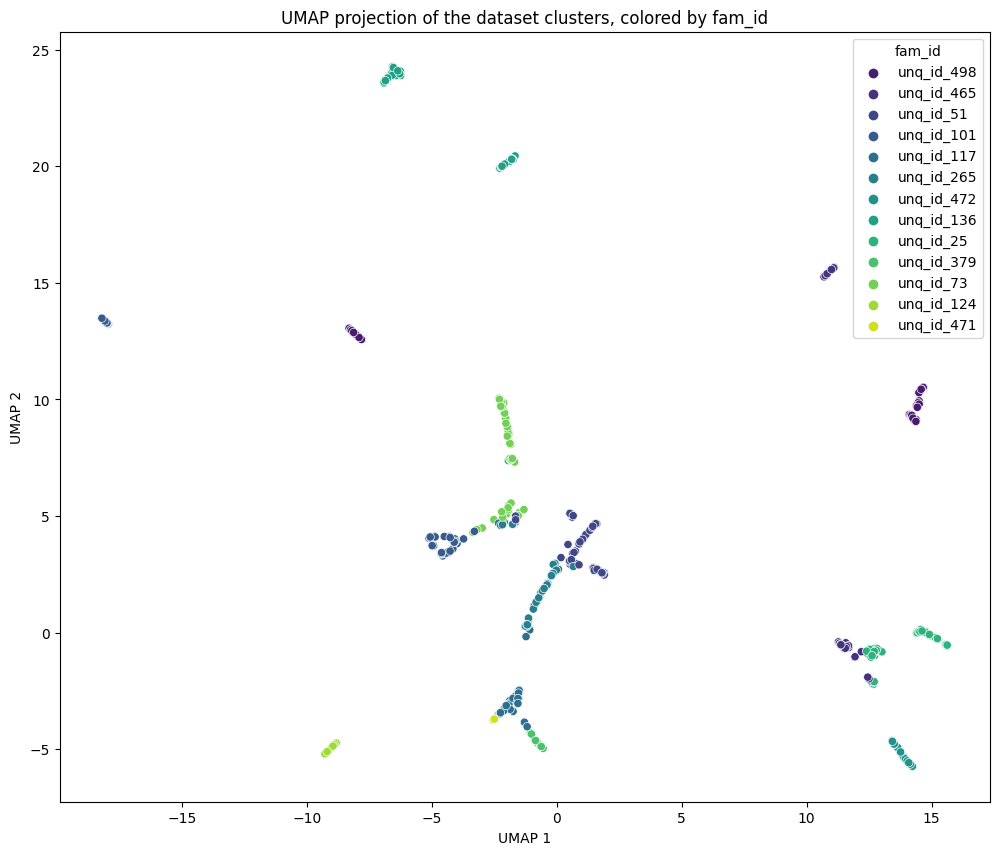

In [11]:
import numpy as np
import pandas as pd
#import umap.umap_ as umap
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded
# df_original = df_original_2.copy()
# Prepare data: Assuming the first four columns are features since data is already standardized
features = df_original.drop('fam_id',axis=1).copy(deep=True)
#features = df_original.copy(deep=True)
# Assuming 'fam_id' is a column you want to use for coloring the points
colors = df_original['fam_id']

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
# Plot with hue based on 'fam_id'
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette="viridis", legend='full')
#scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], palette="viridis", legend='full')
#Label points with the DataFrame index
# for i, point in enumerate(embedding):
#     plt.text(point[0]+0.1,  # Adding a small offset to x position for clarity
#              point[1],
#              df_original.index[i],  # The text is the index of the row
#              horizontalalignment='left',
#              size='small',
#              color='black')

plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


# Kmean visualisation

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded
# df_original1 = df_original_2.copy()
# Prepare data: Assuming the first four columns are features since data is already standardized
features = df_original1.drop('KmeansLabel',axis=1).copy(deep=True)

# Assuming 'fam_id' is a column you want to use for coloring the points
colors = df_original1['KmeansLabel']

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
# Plot with hue based on 'fam_id'
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette="viridis", legend='full')

# Label points with the DataFrame index
# for i, point in enumerate(embedding):
#     plt.text(point[0]+0.1,  # Adding a small offset to x position for clarity
#              point[1],
#              df_original1.index[i],  # The text is the index of the row
#              horizontalalignment='left',
#              size='small',
#              color='black')

plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


## HDBSCAN Vis

In [ ]:
# DBSCANS LEAD TO TOO MUCH POINTS LOST

print(df_original2.shape)
print(df_original2_1.shape)

In [ ]:
# Kmean visualisation

import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded
# df_original1 = df_original_2.copy()
# Prepare data: Assuming the first four columns are features since data is already standardized
features = df_original2_1.drop('HDBSCANLabel',axis=1).copy(deep=True)

# Assuming 'fam_id' is a column you want to use for coloring the points
colors = df_original2_1['HDBSCANLabel']

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
# Plot with hue based on 'fam_id'
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette="viridis", legend='full')

# Label points with the DataFrame index
# for i, point in enumerate(embedding):
#     plt.text(point[0]+0.1,  # Adding a small offset to x position for clarity
#              point[1],
#              df_original1.index[i],  # The text is the index of the row
#              horizontalalignment='left',
#              size='small',
#              color='black')

plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


## OPTICS Vis

In [ ]:
print(df_original4.shape)
print(df_original4_1.shape)

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded
# df_original3 = df_original_2.copy()
# Prepare data: Assuming the first four columns are features since data is already standardized
features = df_original4_1.drop('OPTICSLabel',axis=1).copy(deep=True)

# Assuming 'fam_id' is a column you want to use for coloring the points
colors = df_original4_1['OPTICSLabel']

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
# Plot with hue based on 'fam_id'
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette="viridis", legend='full')

# Label points with the DataFrame index
# for i, point in enumerate(embedding):
#     plt.text(point[0]+0.1,  # Adding a small offset to x position for clarity
#              point[1],
#              df_original3.index[i],  # The text is the index of the row
#              horizontalalignment='left',
#              size='small',
#              color='black')

plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


In [ ]:
1/0

In [ ]:
# # tue Newer

# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming df_original is your DataFrame and it's already defined

# # Applying t-SNE
# tsne = TSNE(n_components=2, random_state=76)
# X_tsne = tsne.fit_transform(df_original.iloc[:, :4])

# plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# # Get unique categories of fam_id
# unique_categories = df_original['fam_id'].unique()
# num_categories = len(unique_categories)

# # Manually specified color palette for better distinction
# # This is a basic set, feel free to add more distinct colors as needed
# color_palette = [
#     '#1f77b4', # muted blue
#     '#ff7f0e', # safety orange
#     '#2ca02c', # cooked asparagus green
#     '#d62728', # brick red
#     '#9467bd', # muted purple
#     '#8c564b', # chestnut brown
#     '#e377c2', # raspberry yogurt pink
#     '#7f7f7f', # middle gray
#     '#bcbd22', # curry yellow-green
#     '#17becf',  # blue-teal
#     '#4b818c', #(Sea Foam Green)
#     '#e3778c', #(Soft Coral Pink)
#     '#ce77e3', #(Light Lavender)
#     '#2322bd', #(Rich Periwinkle Blue)
#     '#1762cf', #(Deeper Ocean Blue)
#     '#17cf84' #(Bright Seafoam Green)
# ]
# # Extend the color palette if there are more categories than colors
# if num_categories > len(color_palette):
#     extra_colors = plt.cm.get_cmap('tab20', num_categories - len(color_palette))
#     color_palette.extend([extra_colors(i) for i in range(num_categories - len(color_palette))])

# # Plot each category
# for i, category in enumerate(unique_categories):
#     idx = df_original['fam_id'] == category
#     plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], color=color_palette[i % len(color_palette)], label=category, alpha=0.7)
#     for j in np.where(idx)[0]:  # Loop through indices of points in this category
#         plt.text(X_tsne[j, 0], X_tsne[j, 1], str(df_original.index[j]), fontdict={'weight': 'bold', 'size': 8}, color='black')

# plt.title('t-SNE Clustering by fam_id')
# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
# plt.legend(title='fam_id', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


In [ ]:
1/0

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded

# Prepare data: Assuming the first four columns are features since data is already standardized
features = d1.iloc[:,:4]

# Assuming 'fam_id' is a column you want to use for coloring the points
colors = d1['fam_id']

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
# Plot with hue based on 'fam_id'
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette="viridis", legend='full')

# Label points with the DataFrame index
for i, point in enumerate(embedding):
    plt.text(point[0]+0.1,  # Adding a small offset to x position for clarity
             point[1],
             d1.index[i],  # The text is the index of the row
             horizontalalignment='left',
             size='small',
             color='black')

plt.title('UMAP projection of the dataset clusters, colored by fam_id')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='fam_id')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'first_row_each_group' is your DataFrame and it's already loaded

# Prepare data: Assuming all columns are features since data is already standardized
features = first_row_each_group.iloc[:,:4]

# Run UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting
plt.figure(figsize=(12, 10))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], palette="viridis", legend='full')

# Label points with the DataFrame index
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], first_row_each_group.index[i],
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('UMAP projection of the dataset clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [ ]:
1/0

In [ ]:
# DSC

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 10))

# Creating a scatter plot, coloring by 'fam_id'
scatter = plt.scatter(df_original['UMAP_1'], df_original['UMAP_2'], c=df_original['fam_id'], cmap='viridis')

# Adding a legend
legend1 = plt.legend(*scatter.legend_elements(), title="fam_id")
plt.gca().add_artist(legend1)

# Adding labels and title
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('UMAP Projection Colored by fam_id')

# Show the plot
plt.show()

In [ ]:
# DSC

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 10))

# Creating a scatter plot, coloring by 'fam_id'
scatter = plt.scatter(df_original['UMAP_1'], df_original['UMAP_2'], c=df_original['KmeansLabel'], cmap='viridis')

# Adding a legend
legend1 = plt.legend(*scatter.legend_elements(), title="KmeansLabel")
plt.gca().add_artist(legend1)

# Adding labels and title
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('UMAP Projection Colored by fam_id')

# Show the plot
plt.show()

In [ ]:
1/0

In [ ]:
1/0

In [ ]:
# Dynamic Similarity Clustering algorithm

import pandas as pd
from sklearn.metrics import pairwise_distances

def dsc(df, nuclearisation = False): # ,
    import numpy as np

    df = df.copy()
    # df = df.sample(frac=1, axis=0, random_state=random_df_state) #BP76
    # df.reset_index(drop=True, inplace=True)

    df_numerical = df.copy()

    # Initialize new columns in the DataFrame for future assignment
    df['unique_identification_col_##_76@_@'] = ['unq_id_' + str(i) for i in range(len(df))]
    unique_id_column = 'unique_identification_col_##_76@_@'

    df["fam_id"] = None
    df["fam_prop"] = None
    df["searcher_prop"] = None
    df['cond'] = None
    df['initial_searched'] = None # For whenever searcher captures a searched
    df['initial_searched_prop'] = None
    df['initial_searched_fam_id'] = None
    df['fam_distance'] = None
    df['initial_searcher_distance'] = None

    # Convert DataFrame to numpy array for cdist
    # Convert DataFrame to numpy array with float64 data type
    array1 = df_numerical #.astype(np.float64)
    # array1 = df_numerical.copy()

    # Compute the distance matrix in float64 precision, then round
    # distances = np.round(cdist(array1, array1, metric='cosine').astype(np.float64), decimals=8)
    distances = pairwise_distances(array1, metric='euclidean') #.astype(np.float64)
    # distances = pairwise_distances(array1, metric='cosine')
    distances = np.round(distances, decimals=5)

    # Loop through each row in the DataFrame
    for searcher_index in range(len(df)):
        # Skip the distance from the row to itself by setting it to np.inf
        distances[searcher_index, searcher_index] = np.inf

        # Find the minimum distance for the current row, excluding itself
        min_distance = np.min(distances[searcher_index])

        # Find all indices (rows) where the distance equals the minimum distance
        closest_rows_indices = np.where(distances[searcher_index] == min_distance)[0]

        # Assign searcher_prop
        df.loc[searcher_index, "searcher_prop"] = min_distance

        # Save closest_rows_indices families
        searched_families = df.loc[closest_rows_indices, "fam_id"].dropna().unique() # drop na changes none to []

        # If searcher does not have a family create a new one
        if pd.isnull(df['fam_id'][searcher_index]): # If searcher fam id is null. else could do but i wonna be sure
            fam_iden = "fam_" + df[unique_id_column][searcher_index]
            df.loc[searcher_index, 'fam_id'] = fam_iden
            df.loc[searcher_index, "fam_prop"] = min_distance

        searcher_family_prop = df.loc[searcher_index, 'fam_prop']


        if searched_families.size > 0:  # Searched has a family. # There are None in here sort it out
                    # Find the none indexes and sort out
                    # filtered_df = df[df["fam_id"].isin(searched_families)] # doing this will bring along rows you are trying to break away from
            # if searcher_index == 94: print(df.loc[94],closest_rows_indices
            # #df[df.fam_id=='fam_unq_id_69']
            # )

            # do index not families, see image on desktop called index indeed
            for searched_index in set(closest_rows_indices):# change searched_index to searched_index

                if pd.isnull(df.loc[searched_index, 'fam_id']):

                   # N1
                    if min_distance > searcher_family_prop:
                        print(searcher_index)
                        df.loc[searcher_index, 'cond'] = '1N1'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # N2. if min_distance < searcher_family_prop
                    # isolate, orelse it may be hard for it to find a new family giving how strong and existing bond in a family may be, no adultration
                    elif min_distance < searcher_family_prop:
                        fam_iden = "100fam_" + df[unique_id_column][searcher_index] # what if it has a family with its name on it
                        df.loc[searcher_index, 'fam_id'] = fam_iden
                        df.loc[searcher_index, "fam_prop"] = min_distance
                        df.loc[searched_index, 'fam_id'] = fam_iden # searched gets searcher familyid
                        df.loc[searched_index, 'fam_prop'] = min_distance
                        df.loc[searcher_index, 'cond'] = '1N2'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # N3. if min_distance == searcher_family_prop
                    # Let searched join searcher family
                    elif min_distance == searcher_family_prop:
                        fam_iden = df.loc[searcher_index, 'fam_id']
                        df.loc[searched_index, "fam_id"] = fam_iden # select all searched
                        df.loc[searched_index, "fam_prop"] = searcher_family_prop
                        df.loc[searcher_index, 'cond'] = '1N3'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                else:

                    searched_family_prop = df.loc[searched_index, 'fam_prop']
                    # NOW BOTH SEARCHED AND SEARCHER HAVE FAMILIES

                    # 1. min_distance < searcher_family_prop and min_distance < searched_family_prop then do nothing
                        # Searcher to leave and form family with searched
                    if min_distance < searcher_family_prop and min_distance < searched_family_prop:
                        fam_iden = "0fam_" + df[unique_id_column][searcher_index] # Added 0 cus the family would have been caputred by that searcher_index
                        df.loc[searched_index, 'fam_id'] = fam_iden # searched gets searcher familyid
                        df.loc[searcher_index, 'fam_id'] = fam_iden
                        df.loc[searched_index, 'fam_prop'] = min_distance
                        df.loc[searcher_index, "fam_prop"] = min_distance
                        df.loc[searcher_index, 'cond'] = '1'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue


                    # 2. min_distance < searcher_family_prop and min_distance > searched_family_prop
                    # OLD...Searcher can't leave family, searched to join searcher's family instead
                    # Do nothing or thres, which may affect purity ... THRES ??
                    elif min_distance < searcher_family_prop and min_distance > searched_family_prop:
                        df.loc[searcher_index, 'cond'] = '2'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # 3. min_distance < searcher_family_prop and min_distance == searched_family_prop
                    # Searcher to join searched family
                    elif min_distance < searcher_family_prop and min_distance == searched_family_prop:
                        searched_fam = df.loc[searched_index, "fam_id"]
                        df.loc[searcher_index, "fam_id"] = searched_fam
                        df.loc[searcher_index, "fam_prop"] = searched_family_prop
                        df.loc[searcher_index, 'cond'] = '3'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # 4. min_distance > searcher_family_prop and min_distance < searched_family_prop
                    # Do nothing or .....THRES ??
                    elif min_distance > searcher_family_prop and min_distance < searched_family_prop:
                        df.loc[searcher_index, 'cond'] = '4'
                        # Searched to join searcher family
                        # No nothing rather but test
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # 5. min_distance > searcher_family_prop and min_distance > searched_family_prop
                        # Do nothing
                    elif min_distance > searcher_family_prop and min_distance > searched_family_prop:
                        df.loc[searcher_index, 'cond'] = '5'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # 6. min_distance > searcher_family_prop and min_distance = searched_family_prop
                    # OLD Searcher joins searched family
                    # Do nothing
                    elif min_distance > searcher_family_prop and min_distance == searched_family_prop:
                        df.loc[searcher_index, 'cond'] = '6'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # 7 min_distance == searcher_family_prop and min_distance < searched_family_prop
                        # Searched to join searchers family
                    elif min_distance == searcher_family_prop and min_distance < searched_family_prop:
                        fam_iden = df.loc[searcher_index, 'fam_id']
                        df.loc[searched_index, "fam_id"] = fam_iden #  select all searched
                        df.loc[searched_index, "fam_prop"] = searcher_family_prop
                        df.loc[searcher_index, 'cond'] = '7'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue


                    # 8. min_distance == searcher_family_prop and min_distance > searched_family_prop
                    # Do nothing
                    elif min_distance == searcher_family_prop and min_distance > searched_family_prop:
                        df.loc[searcher_index, 'cond'] = '8'
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue

                    # 9. min_distance = searcher_family_prop and min_distance = searched_family_prop
                        # Same family id for all, searcher family id could be used.
                    elif min_distance == searcher_family_prop and min_distance == searched_family_prop:

                        fam_iden = df.loc[searcher_index, 'fam_id']
                        searched_fam = df.loc[searched_index, "fam_id"]
                        mask = df[df['fam_id']==searched_fam].index
                        df.loc[mask, "fam_id"] = fam_iden
                        #df.loc[mask, "cond"] = '9'
                        df.loc[searcher_index, 'cond'] = '9'
                        # df.loc[mask, 'initial_searched'] = searched_index
                        df.loc[searcher_index, 'initial_searched'] = searched_index
                        continue




        elif searched_families.size == 0: # Searched has no families

            # N1. if min_distance > searcher_family_prop
            if min_distance > searcher_family_prop:
                print('2',searcher_index)
                df.loc[searcher_index, 'cond'] = '2N1'
                df.loc[searcher_index, 'initial_searched'] = closest_rows_indices[0]
                continue

            # N2. if min_distance < searcher_family_prop
            # isolate, orelse it may be hard for it to find a new family giving how strong and existing bond in a family may be, no adultration
            elif min_distance < searcher_family_prop:
                fam_iden = "1100fam_" + df[unique_id_column][searcher_index] # what if it has a family with its name on it
                df.loc[searcher_index, 'fam_id'] = fam_iden
                df.loc[searcher_index, "fam_prop"] = min_distance
                df.loc[closest_rows_indices, 'fam_id'] = fam_iden # searched gets searcher familyid
                df.loc[closest_rows_indices, 'fam_prop'] = min_distance
                df.loc[searcher_index, 'cond'] = '2N2'
                df.loc[searcher_index, 'initial_searched'] = closest_rows_indices[0]
                continue

            # N3. if min_distance == searcher_family_prop
            # Let searched join searcher family
            elif min_distance == searcher_family_prop:
                fam_iden = df.loc[searcher_index, 'fam_id']
                df.loc[closest_rows_indices, "fam_id"] = fam_iden # select all searched
                df.loc[closest_rows_indices, "fam_prop"] = searcher_family_prop
                df.loc[searcher_index, 'cond'] = '2N3'
                df.loc[searcher_index, 'initial_searched'] = closest_rows_indices[0]
                continue



    if nuclearisation:

        for (fam_id, clean_text_data), subgroup in df.groupby(["fam_id", "clean_text_data"]):
            first_index = subgroup.index[0]  # First index of the subgroup
            fam_iden = "nuc_fam_" + df.loc[first_index, unique_id_column]  # Assuming 'unique_id_column' is the column name
            df.loc[subgroup.index, "fam_id"] = fam_iden


    # THE GREAT MIGRATION
    df['initial_searched_prop'] = df['initial_searched'].apply(lambda x: df.loc[x]['fam_prop'])
    df['initial_searched_fam_id'] = df['initial_searched'].apply(lambda x: df.loc[x]['fam_id'])
    df['fam_distance'] = df['fam_prop'] - df['searcher_prop']
    df['initial_searcher_distance'] = df['searcher_prop'] - df['initial_searched_prop']


    df['fam_id'] = np.where(
        df['initial_searcher_distance'] < df['fam_distance'],  # Condition
        df['initial_searched_fam_id'],  # Value if condition is True
        df['fam_id']  # Value if condition is False
    )

    # Additionally, updating the fam_prop column based on the same condition
    df['fam_prop'] = np.where(
        df['initial_searcher_distance'] < df['fam_distance'],  # Condition
        df['initial_searched_prop'],  # Value if condition is True (set fam_prop to initial_searcher_distance)
        df['fam_prop']  # Value if condition is False
    )

    df.reset_index(inplace=True,drop=True)

    df['fam_id'] = pd.factorize(df['fam_id'])[0] # when there is not family id it will come up as -1 as it is blank
    #df['initial_searched_fam_id'] = pd.factorize(df['initial_searched_fam_id'])[0] # when there is not family id it will come up as -1 as it is blank


    # df['fam_count'] = df.groupby('fam_id')['fam_id'].transform('count') # Count family id

    df.sort_values(by='fam_id', inplace=True) # sort by family id
    #df.reset_index(inplace=True, drop=True)
    df.drop([unique_id_column,'cond',
       'initial_searched', 'initial_searched_prop', 'initial_searched_fam_id',
       'fam_distance', 'initial_searcher_distance','fam_prop', 'searcher_prop'], axis=1, inplace=True) # ,"searcher_prop","fam_prop" ,"searcher_prop","fam_prop"
    return df

In [ ]:
# # NUC
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# import pandas as pd
# import random

# # GPT EMB with DSC thres = True .. more liberal less clusters



# # Generate a random integer between 1 and 1000
# random_integer = random.randint(1, 1000)


# df_template = pd.DataFrame(columns=['iteration', 'silhouette_score', 'calinski_harabasz_score', 'unique_families'])

# for i in range(20): # Nuc iteration. To determine best 100 unique fam after inital nuc may require 10 iterations total.

#     iteration_list = []
#     sil_perf_list = []
#     calinski_perf_list = []
#     unique_fam_list = []

#     random_integer = random.randint(1, 1000)
#     #random_integer = random.randint(1, 1000)
#     if i == 0:
#         df_original = dsc(df=df_iris) # 0.2 random_integer

#     # Compare 'count_per_cluster_label_gpt_emb' with 'count_per_Manual_Grouping'
#     labels = df_original.fam_id
#     selected_columns = df_original.iloc[:,:4]
#     # Calculate metrics
#     calinski_harabasz = calinski_harabasz_score(selected_columns, labels)
#     davies_bouldin = davies_bouldin_score(selected_columns, labels)
#     sil_perf = silhouette_score(selected_columns, labels)


#     #first_row_each_group = df_original.groupby('fam_id').first().reset_index()
#     first_row_each_group = df_original.groupby('fam_id').mean(numeric_only=True).reset_index()
#     # Rename fam_id to track iteration number, and prepare dataframe for next iteration
#     first_row_each_group.rename(columns={'fam_id': 'fam_id_0'}, inplace=True)
#     #first_row_each_group.drop(["fam_prop", "searcher_prop", "fam_count"], axis=1, inplace=True)
#     first_row_each_group.drop(["fam_count"], axis=1, inplace=True)

#     df2 = dsc(df = first_row_each_group) # 0.2

#     sil_perf_list.append(sil_perf)
#     calinski_perf_list.append(calinski_harabasz)
#     unique_fam_list.append(df2.fam_id.nunique())
#     iteration_list.append(i)


#     df_merged = pd.merge(df_original, df2[['fam_id_0','fam_id']],
#                             left_on='fam_id', right_on='fam_id_0')


#     # Drop unnecessary columns
#     df_final = df_merged.drop(columns=['fam_id_x','fam_id_0'], axis=1)

#     # Assuming df_merged is your DataFrame after merging
#     columns_to_rename = {'fam_id_y': 'fam_id'}

#     df_final.rename(columns=columns_to_rename, inplace=True)
#     df_original = df_final.copy(deep=True)
#     df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id

#     # Create a DataFrame from the zipped lists
#     df22 = pd.DataFrame(list(zip(iteration_list, sil_perf_list, calinski_perf_list,  unique_fam_list)),
#                 columns=['iteration', 'silhouette_score', 'calinski_harabasz_score', 'unique_families'])

#     df_template = pd.concat([df_template, df22], ignore_index=True)
#     if df_original.fam_id.nunique() == 2: break


# # # # # Find the maximum score in the DataFrame
# # max_diff = df22['Performance'].max()


# # # # # Get rows where the score column is equal to the maximum score
# # max_diff_rows = df22[df22['Performance'] == max_diff]



# df_template

# # Change to after nuc instead

In [ ]:
dsc(df_iris)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import random

# Assuming dsc() is a defined function elsewhere and df_iris is available
# Generate a random integer between 1 and 1000
random_integer = random.randint(1, 1000)

# Initialize DataFrame outside the loop
df_template = pd.DataFrame(columns=['iteration', 'silhouette_score', 'calinski_harabasz_score', 'unique_families'])

# Initialize lists outside the loop to accumulate values across iterations
iteration_list = []
sil_perf_list = []
calinski_perf_list = []
unique_fam_list = []

for i in range(20): # Loop for Nuc iteration
    # Reset random_integer for each iteration (if needed)
    random_integer = random.randint(1, 1000)

    if i == 0:
        df_original = dsc(df=df_iris)  # Initial clustering operation
        # Outlier removal

        def iqr_outliers_indexer(df, column_name):
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
            return outliers.index

        out_index = iqr_outliers_indexer(df111, 'searcher_prop')
        df_original = df_original.drop(out_index, axis=0)
        df_original.reset_index(drop=True, inplace=True)
        # Calculate initial metrics
        labels = df_original.fam_id
        selected_columns = df_original.iloc[:, :4]
        sil_perf = silhouette_score(selected_columns, labels)
        calinski_harabasz = calinski_harabasz_score(selected_columns, labels)

    labels = df_original.fam_id
    selected_columns = df_original.iloc[:, :4]
    sil_perf = silhouette_score(selected_columns, labels)
    calinski_harabasz = calinski_harabasz_score(selected_columns, labels)


    # Append initial or updated metrics to lists
    sil_perf_list.append(sil_perf)
    calinski_perf_list.append(calinski_harabasz)
    unique_fam_list.append(df_original.fam_id.nunique())
    iteration_list.append(i)

    if df_original.fam_id.nunique() == 2:
     break


    #df_original = df_original.sort_values(by='searcher_prop')
    #first_row_each_group = df_original.groupby('fam_id').first().reset_index()

    # RATIONAL: I would like to select the median row based on the median distance within the family or searcher_prop
    # Function to return the row with the median searcher_prop for each fam
    def row_with_median_searcher_prop(group):
        # Calculate the median searcher_prop for the current group
        median_searcher_prop = group['searcher_prop'].median()
        # Find the row where searcher_prop is closest to the median
        closest_row = group.iloc[(group['searcher_prop'] - median_searcher_prop).abs().argsort()[:1]]
        return closest_row

    # Apply the function to each group and concatenate the results
    first_row_each_group = df_original.groupby('fam_id', group_keys=False).apply(row_with_median_searcher_prop).reset_index(drop=True)

    #first_row_each_group = df_original.groupby('fam_id').median(numeric_only=True).reset_index()
    # Rename fam_id to track iteration number, and prepare dataframe for next iteration
    first_row_each_group.rename(columns={'fam_id': 'fam_id_0'}, inplace=True)
    first_row_each_group.drop(["fam_prop", "searcher_prop", "fam_count"], axis=1, inplace=True)
    #first_row_each_group.drop(["fam_count"], axis=1, inplace=True)

    df2 = dsc(df = first_row_each_group) # 0.2


    df_merged = pd.merge(df_original, df2[['fam_id_0','fam_id']],
                            left_on='fam_id', right_on='fam_id_0')


    # Drop unnecessary columns
    df_final = df_merged.drop(columns=['fam_id_x','fam_id_0'], axis=1)

    # Assuming df_merged is your DataFrame after merging
    columns_to_rename = {'fam_id_y': 'fam_id'}

    df_final.rename(columns=columns_to_rename, inplace=True)
    df_original = df_final.copy(deep=True)
    df_original['fam_count'] = df_original.groupby('fam_id')['fam_id'].transform('count') # Count family id


    # Check and potentially break out of the loop if your exit condition is met


# After the loop, create a DataFrame from the accumulated lists
df_template = pd.DataFrame({
    'iteration': iteration_list,
    'silhouette_score': sil_perf_list,
    'calinski_harabasz_score': calinski_perf_list,
    'unique_families': unique_fam_list
})

# Now df_template contains metrics from all iterations
df_template


In [ ]:
df_original.fam_id.nunique()

In [ ]:
# KD trees suffers from the curse of dimensionality, that i why i can not use it as..perhaps pca first if need be
# my primary similarity searcher, however after the

In [ ]:
# # THE GREAT MIGRATION
# df_original['initial_searched_prop'] = df_original['initial_searched'].apply(lambda x: df_original.loc[x]['fam_prop'])
# df_original['initial_searched_fam_id'] = df_original['initial_searched'].apply(lambda x: df_original.loc[x]['fam_id'])
# df_original['fam_distance'] = df_original['fam_prop'] - df_original['searcher_prop']
# df_original['initial_searcher_distance'] = df_original['searcher_prop'] - df_original['initial_searched_prop']

# import numpy as np

# df_original['fam_id'] = np.where(
#     df_original['initial_searcher_distance'] < df_original['fam_distance'],  # Condition
#     df_original['initial_searched_fam_id'],  # Value if condition is True
#     df_original['fam_id']  # Value if condition is False
# )

# # Additionally, updating the fam_prop column based on the same condition
# df_original['fam_prop'] = np.where(
#     df_original['initial_searcher_distance'] < df_original['fam_distance'],  # Condition
#     df_original['initial_searched_prop'],  # Value if condition is True (set fam_prop to initial_searcher_distance)
#     df_original['fam_prop']  # Value if condition is False
# )

In [ ]:
tree

In [ ]:
BallTree.valid_metrics

In [ ]:
# Cosine for ball tree
# Normalise first and them use the normal metric of euclidean

# from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import normalize

# # Assuming `word_embeddings` is your array of word embeddings
# normalized_embeddings = normalize(word_embeddings, norm='l2')

In [ ]:
df_wine1.sample(frac=1)

In [ ]:
 # kdtarees very useful for large datasets
# kdtrees very useful for large datasets
# Curse of dimensionality
# df_iris = df_iris.sample(frac=1)
df_original11 = df_original.drop('fam_id', axis=1).copy()
from sklearn.neighbors import KDTree, BallTree
import numpy as np

# Assuming df_iris_sample is a DataFrame with numerical features
array1 = df_original11.to_numpy()

# Create a k-d tree from the dataset
tree = KDTree(array1)

# Loop through each row in the dataset to find its nearest neighbor
for searcher_index, point in enumerate(array1):
    # Reshape the point to a 2D array as required by KDTree.query
    point = point.reshape(1, -1)  # Required to avoid deprecation warning about 1D arrays

    # Query the tree for the nearest neighbor excluding the point itself
    # k=2 returns the closest point and the next closest point
    distances, indices = tree.query(point, k=2)

    # The first result might be the point itself (distance=0), so take the second result
    nearest_distance = distances[0][1]  # The distance to the nearest neighbor
    nearest_index = indices[0][1]  # The index of the nearest neighbor

    print(searcher_index, nearest_index, nearest_distance)


In [ ]:
df_original12 = dsc(df_iris)
df_original12

In [ ]:
df_original12.loc[59]

In [ ]:
# Simple dsc broader Dynamic Similarity Clustering algorithm

import pandas as pd
from sklearn.metrics import pairwise_distances
import numpy as np
def dsc1(df, nuclearisation = False, random_df_state = 76): # ,



    df = df.copy()
    #df = df.sample(frac=1, axis=0, random_state=random_df_state) #BP76
    # df.reset_index(drop=True, inplace=True)

    df_numerical = df.copy()

    # Initialize new columns in the DataFrame for future assignment
    df['unique_identification_col_##_76@_@'] = ['unq_id_' + str(i) for i in range(len(df))]
    unique_id_column = 'unique_identification_col_##_76@_@'

    df["fam_id"] = None

    # Convert DataFrame to numpy array for cdist
    # Convert DataFrame to numpy array with float64 data type
    array1 = df_numerical.copy() #.astype(np.float64)
    # array1 = df_numerical.copy()

    # Compute the distance matrix in float64 precision, then round
    # distances = np.round(cdist(array1, array1, metric='cosine').astype(np.float64), decimals=8)
    distances = pairwise_distances(array1, metric='euclidean') #.astype(np.float64)
    # distances = pairwise_distances(array1, metric='cosine')
    # distances = np.round(distances, decimals=5)


    # Loop through each row in the DataFrame
    for searcher_index in range(len(df)):
        # Skip the distance from the row to itself by setting it to np.inf
        distances[searcher_index, searcher_index] = np.inf

        # Find the minimum distance for the current row, excluding itself
        min_distance = np.min(distances[searcher_index])

        # Find all indices (rows) where the distance equals the minimum distance
        closest_rows_indices = np.where(distances[searcher_index] == min_distance)[0]


        # 1. If searched indices do not have a family create one and capture.


        # 1. Check if any of the closest_rows_indices have a null fam_id AND if the searcher_index's fam_id is null
        if pd.isnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].isnull().all():

                # Construct the new fam_id value
                fam_iden = "fam_" + str(df.loc[searcher_index, unique_id_column])
                # Assign the new fam_id to all closest rows and the searcher row
                df.loc[closest_rows_indices, 'fam_id'] = fam_iden
                df.loc[searcher_index, 'fam_id'] = fam_iden
                continue



        # 2

    # Assuming df, unique_id_column, closest_rows_indices, and searcher_index are defined elsewhere

        # Step 1 & 2: Check if the searcher_index's fam_id is null AND if any of the closest_rows_indices have a non-null fam_id
        elif pd.isnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].notnull().any():
            # Step 3: Select one non-null fam_id from the closest_rows_indices

                non_null_fam_ids = df.loc[closest_rows_indices, 'fam_id'].dropna()
                if not non_null_fam_ids.empty:
                    fam_iden = non_null_fam_ids.iloc[0]  # Take the first non-null fam_id

                    # Step 4: Update the fam_id for the searcher_index
                    df.loc[searcher_index, 'fam_id'] = fam_iden

                    # Identify closest_rows_indices with null fam_id
                    null_fam_closest_indices = df.loc[closest_rows_indices, 'fam_id'][df.loc[closest_rows_indices, 'fam_id'].isnull()].index
                    # Update their fam_id to the selected one
                    df.loc[null_fam_closest_indices, 'fam_id'] = fam_iden

                    # Step 5: Unify fam_id for all closest_rows_indices with a non-null fam_id

                    for idx in closest_rows_indices:
                        if pd.notnull(df.loc[idx, 'fam_id']):
                            # Find all rows with the same fam_id as the current closest_row_index and update their fam_id
                            mask = df['fam_id'] == df.loc[idx, 'fam_id']
                            df.loc[mask, 'fam_id'] = fam_iden
                            continue

      # 3
        # Check if the searcher_index's fam_id is not null
        elif pd.notnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].isnull().all():
                # Construct the new fam_id value
                fam_iden = df.loc[searcher_index, 'fam_id']

                # Find all closest_rows_indices that have a null fam_id
                null_fam_closest_indices = df.loc[closest_rows_indices, 'fam_id'][df.loc[closest_rows_indices, 'fam_id'].isnull()].index

                # Assign the new fam_id to all closest indices that have null fam_id
                df.loc[null_fam_closest_indices, 'fam_id'] = fam_iden
                continue


        # 4 Assuming df, closest_rows_indices, and searcher_index are defined elsewhere

        # Check if the searcher_index's fam_id is not null
        elif pd.notnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].notnull().all():
                # Get the fam_id of the searcher_index
                fam_iden = df.loc[searcher_index, 'fam_id']

                # Iterate over each of the closest_rows_indices

                for idx in closest_rows_indices:
                    # Get the fam_id for the current index in closest_rows_indices
                    fam_id_closest_index = df.loc[idx, 'fam_id']

                    # Find all rows with the same fam_id as the current closest_row_index
                    mask = df['fam_id'] == fam_id_closest_index

                    # Update their fam_id to match that of the searcher_index
                    df.loc[mask, 'fam_id'] = fam_iden
                    continue




    df['fam_id'] = pd.factorize(df['fam_id'])[0]

    df['fam_count'] = df.groupby('fam_id')['fam_id'].transform('count') # Count family id

    df.sort_values(by='fam_id', inplace=True) # sort by family id
    #df.reset_index(inplace=True, drop=True)
    df.drop([unique_id_column], axis=1, inplace=True) # ,"searcher_prop","fam_prop" ,"searcher_prop","fam_prop"
    # 'cond',
    #    'initial_searched', 'initial_searched_prop', 'initial_searched_fam_id',
    #    'fam_distance', 'initial_searcher_distance'
    return df

In [ ]:
# Simple dsc conservative Dynamic Similarity Clustering algorithm

import pandas as pd
from sklearn.metrics import pairwise_distances
import numpy as np
def dsc1(df, nuclearisation = False, random_df_state = 76): # ,



    df = df.copy()
    df = df.sample(frac=1, axis=0, random_state=random_df_state) #BP76
    # df.reset_index(drop=True, inplace=True)

    df_numerical = df.copy()

    # Initialize new columns in the DataFrame for future assignment
    df['unique_identification_col_##_76@_@'] = ['unq_id_' + str(i) for i in range(len(df))]
    unique_id_column = 'unique_identification_col_##_76@_@'

    df["fam_id"] = None

    # Convert DataFrame to numpy array for cdist
    # Convert DataFrame to numpy array with float64 data type
    array1 = df_numerical.copy() #.astype(np.float64)
    # array1 = df_numerical.copy()

    # Compute the distance matrix in float64 precision, then round
    # distances = np.round(cdist(array1, array1, metric='cosine').astype(np.float64), decimals=8)
    distances = pairwise_distances(array1, metric='euclidean') #.astype(np.float64)
    # distances = pairwise_distances(array1, metric='cosine')
    # distances = np.round(distances, decimals=5)


    # Loop through each row in the DataFrame
    for searcher_index in range(len(df)):
        # Skip the distance from the row to itself by setting it to np.inf
        distances[searcher_index, searcher_index] = np.inf

        # Find the minimum distance for the current row, excluding itself
        min_distance = np.min(distances[searcher_index])

        # Find all indices (rows) where the distance equals the minimum distance
        closest_rows_indices = np.where(distances[searcher_index] == min_distance)[0]


        # 1. If searched indices do not have a family create one and capture.


        # 1. Check if any of the closest_rows_indices have a null fam_id AND if the searcher_index's fam_id is null
        if pd.isnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].isnull().all():

                # Construct the new fam_id value
                fam_iden = "fam_" + str(df.loc[searcher_index, unique_id_column])
                # Assign the new fam_id to all closest rows and the searcher row
                df.loc[closest_rows_indices, 'fam_id'] = fam_iden
                df.loc[searcher_index, 'fam_id'] = fam_iden
                continue



        # 2

    # Assuming df, unique_id_column, closest_rows_indices, and searcher_index are defined elsewhere

        # Step 1 & 2: Check if the searcher_index's fam_id is null AND if any of the closest_rows_indices have a non-null fam_id
        elif pd.isnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].notnull().any():
            # Step 3: Select one non-null fam_id from the closest_rows_indices
                non_null_fam_ids = df.loc[closest_rows_indices, 'fam_id'].dropna()
                if not non_null_fam_ids.empty:
                    fam_iden = non_null_fam_ids.iloc[0]  # Take the first non-null fam_id

                    # Step 4: Update the fam_id for the searcher_index
                    df.loc[searcher_index, 'fam_id'] = fam_iden

                    # Identify closest_rows_indices with null fam_id
                    null_fam_closest_indices = df.loc[closest_rows_indices, 'fam_id'][df.loc[closest_rows_indices, 'fam_id'].isnull()].index
                    # Update their fam_id to the selected one
                    df.loc[null_fam_closest_indices, 'fam_id'] = fam_iden

                    # Step 5: Unify fam_id for all closest_rows_indices with a non-null fam_id

                    for idx in closest_rows_indices:
                        if pd.notnull(df.loc[idx, 'fam_id']):
                            # Find all rows with the same fam_id as the current closest_row_index and update their fam_id
                            mask = df['fam_id'] == df.loc[idx, 'fam_id']
                            df.loc[mask, 'fam_id'] = fam_iden
                    continue

      # 3
        # Check if the searcher_index's fam_id is not null
        elif pd.notnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].isnull().all():
                # Construct the new fam_id value
                fam_iden = df.loc[searcher_index, 'fam_id']

                # Find all closest_rows_indices that have a null fam_id
                null_fam_closest_indices = df.loc[closest_rows_indices, 'fam_id'][df.loc[closest_rows_indices, 'fam_id'].isnull()].index

                # Assign the new fam_id to all closest indices that have null fam_id
                df.loc[null_fam_closest_indices, 'fam_id'] = fam_iden
                continue


        # 4 Assuming df, closest_rows_indices, and searcher_index are defined elsewhere

        # Check if the searcher_index's fam_id is not null
        elif pd.notnull(df.loc[searcher_index, 'fam_id']) and df.loc[closest_rows_indices, 'fam_id'].notnull().all():
                #Get the fam_id of the searcher_index
                fam_iden = df.loc[searcher_index, 'fam_id']

                # Iterate over each of the closest_rows_indices

                for idx in closest_rows_indices:
                    # Get the fam_id for the current index in closest_rows_indices
                    fam_id_closest_index = df.loc[idx, 'fam_id']

                    # Find all rows with the same fam_id as the current closest_row_index
                    mask = df['fam_id'] == fam_id_closest_index

                    # Update their fam_id to match that of the searcher_index
                    df.loc[mask, 'fam_id'] = fam_iden
                    continue




    df['fam_id'] = pd.factorize(df['fam_id'])[0]

    df['fam_count'] = df.groupby('fam_id')['fam_id'].transform('count') # Count family id

    df.sort_values(by='fam_id', inplace=True) # sort by family id
    #df.reset_index(inplace=True, drop=True)
    df.drop([unique_id_column], axis=1, inplace=True) # ,"searcher_prop","fam_prop" ,"searcher_prop","fam_prop"
    # 'cond',
    #    'initial_searched', 'initial_searched_prop', 'initial_searched_fam_id',
    #    'fam_distance', 'initial_searcher_distance'
    return df

In [ ]:
df_iris_sample1 = df_iris_sample.copy(deep=True)
df_iris_sample1['fam_id'] = None

In [ ]:
import random
random_integer = random.randint(1, 1000)
df_original_2 = dsc(df_iris_sample, random_df_state=random_integer)
df_original_2.fam_id.nunique()

In [ ]:
df_original_2.fam_count.value_counts()

In [ ]:
df_original_2.loc[[14]]

In [ ]:
df_original_2[["sepal_length"	,"sepal_width"	,"petal_length", "petal_width",
               "fam_id", "fam_prop", "searcher_prop", 'initial_searched' ,"initial_searched_prop",
               "fam_count", 'fam_distance']]

In [ ]:
df_original_2[df_original_2.fam_id == 6]

In [ ]:
df_original_2

In [ ]:
 # kdtarees very useful for large datasets
# kdtrees very useful for large datasets
# Curse of dimensionality
df_original11 =df_iris.iloc[:,:4]
from scipy.spatial import cKDTree
import numpy as np

# Assuming df_iris_sample is a DataFrame with numerical features
array1 = df_original11.to_numpy()

# Create a k-d tree from the dataset
tree = cKDTree(array1)

# Loop through each row in the dataset to find its nearest neighbor
for searcher_index, point in enumerate(array1):
    # Query the tree for the nearest neighbor excluding the point itself
    # k=2 returns the closest point and the next closest point (itself being the closest)
    distances, indices = tree.query(point, k=2)

    # The first result is the point itself (distance=0), so take the second result
    nearest_distance = distances[1]  # The distance to the nearest neighbor
    nearest_index = indices[1]  # The index of the nearest neighbor

    print(searcher_index, nearest_index, nearest_distance)


In [ ]:
for searcher_index, point in enumerate(array1):
    print()

In [ ]:
# # More kdtrees
# import pandas as pd
# from scipy.spatial import cKDTree
# import numpy as np

# # Creating a DataFrame with integer numbers
# data = {
#     'Column1': [1, 24, 3, 3, 5],
#     'Column2': [62, 74, 8, 8, 10],
#     'Column3': [111, 142, 13, 13, 15]
# }

# df = pd.DataFrame(data)

# # Convert the DataFrame to a NumPy array
# points = df.to_numpy()

# # Create a k-d tree
# tree = cKDTree(points)

# # Query point
# query_point = np.array([3, 8, 13])

# # Find the nearest neighbor to get the distance
# distance, index = tree.query(query_point)

# # Find all points within this distance (including the nearest one)
# indices = tree.query_ball_point(query_point, distance)

# print(f"Indices of points with the same lowest distance: {indices} and {distance}")
# # Optionally, you can print the points and their distances
# for idx in indices:
#     point = points[idx]
#     dist = np.linalg.norm(point - query_point)
#     print(f"Index: {idx}, Point: {point}, Distance: {dist}")


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df_original.iloc[:,:4])
df_original['class'] = kmeans.labels_
df_original['KmeansLabel'] = df_original['class']

In [ ]:
df_original['KmeansLabel'].value_counts()

In [ ]:
# import matplotlib.pyplot as plt

# # Example data: Replace these with your actual values
# range_n_clusters = list(df_template.unique_families)
# silhouette_scores = list(df_template.silhouette_score)
# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
# plt.title('Silhouette Scores for Various Numbers of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.xticks(range_n_clusters)
# plt.grid(True)
# plt.show()

In [ ]:
# df_original = dsc(df = df_wine, random_df_state = 76)


In [ ]:
# HDBSCAN


# ! pip install hdbscan
# !pip install numpy
import numpy as np
import hdbscan

# Assuming `embeddings` is an array of your text embeddings
# For example, embeddings could be generated from df1["clean_brandandtitle"] as shown previously

# 'metric' parameter of pairwise_distances must be a str among {'rogerstanimoto', 'sokalsneath', 'nan_euclidean', 'mahalanobis', 'haversine', 'correlation',
# 'wminkowski', 'russellrao', 'sqeuclidean', 'matching', 'hamming', 'yule', 'seuclidean', 'braycurtis', 'canberra', 'cosine',
# 'l1', 'chebyshev', 'manhattan', 'jaccard', 'dice', 'minkowski', 'precomputed', 'sokalmichener', 'cityblock', 'euclidean', 'l2'}

# min_samples
# with less data it may be better to specify min cluster size
# Initialize and fit HDBSCAN
clusterer = hdbscan.HDBSCAN()
cluster_labels = clusterer.fit_predict(df_original.iloc[:,:4].values)

# Add cluster labels back to your DataFrame
df_original['gpt_cluster_label'] = cluster_labels


counts = df_original.groupby('gpt_cluster_label')['gpt_cluster_label'].count()
df_original['count_per_cluster_label_gpt_emb'] = df_original['gpt_cluster_label'].map(counts)
df_original.gpt_cluster_label.nunique()

In [ ]:
# # Speed improvement with dictionary

# import numpy as np
# from scipy.spatial.distance import cdist

# def dsc(data, random_state=76):
#     np.random.seed(random_state)
#     # Randomly shuffle data indices
#     indices = np.random.permutation(len(data))
#     data_shuffled = data[indices]

#     # Assign unique IDs (could also be done with enumerate if data is already in a structured format)
#     unique_ids = np.array(['unq_id_' + str(i) for i in range(len(data_shuffled))])

#     # Calculate distance matrix (assuming data is a 2D numpy array)
#     distance_matrix = cdist(data_shuffled, data_shuffled, 'euclidean')

#     # Initialize properties
#     fam_ids = np.full(shape=len(data), fill_value=-1, dtype=np.int32)  # Placeholder for family IDs
#     fam_props = np.zeros(shape=len(data))  # Family properties
#     searcher_props = np.zeros(shape=len(data))  # Searcher properties

#     # Example logic for assigning family based on distance (simplified)
#     for i in range(len(distance_matrix)):
#         distances = distance_matrix[i]
#         inverted_distances = 1 / (distances + 1e-9)
#         np.fill_diagonal(inverted_distances, 0)
#         max_dist = np.max(inverted_distances)

#         if max_dist > 0:
#             closest_index = np.argmax(inverted_distances)
#             fam_ids[i] = closest_index  # Simplified example of assigning to a family
#             fam_props[i] = max_dist  # Example property update
#             searcher_props[i] = max_dist  # Example property update

#     # Example of post-processing (simplified)
#     # Sort by family ID for demonstration purposes
#     sort_indices = np.argsort(fam_ids)
#     sorted_data = data_shuffled[sort_indices]
#     sorted_fam_ids = fam_ids[sort_indices]

#     return sorted_data, sorted_fam_ids, fam_props, searcher_props

# # Assuming data is a numpy array of your features
# # data = np.array([...])

# # Example call to the function (assuming 'data' is your dataset)
# # sorted_data, sorted_fam_ids, fam_props, searcher_props = dsc(data)


In [ ]:
# GPT EMB with HDBSCAN
df_wine_selected_columns = df_original.iloc[:,:4]


import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original.gpt_cluster_label
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



In [ ]:
# Kmeans
df_wine_selected_columns = df_original.iloc[:,:4]


import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original.KmeansLabel
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



In [ ]:
# DSC- PURE
df_wine_selected_columns = df_original.iloc[:,:4]

import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume 'labels' is the array of cluster labels obtained from a clustering algorithm
# For example: labels = [0, 1, 0, 1] - replace this with your actual labels
labels = df_original.fam_id
# Calculate metrics
silhouette_avg = silhouette_score(df_wine_selected_columns, labels)
calinski_harabasz = calinski_harabasz_score(df_wine_selected_columns, labels)
davies_bouldin = davies_bouldin_score(df_wine_selected_columns, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



In [ ]:
# Visualisation

In [ ]:
# Kmeans

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=76)
X_tsne = tsne.fit_transform(df_original.iloc[:,:4])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_original.KmeansLabel, cmap='viridis')
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [ ]:
# HDBscan

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=76)
X_tsne = tsne.fit_transform(df_original.iloc[:,:4])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_original.gpt_cluster_label, cmap='viridis')
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [ ]:
# DSC

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=76)
X_tsne = tsne.fit_transform(df_original.iloc[:,:4])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_original.fam_id, cmap='viridis')
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
